## CTB April

In [1]:
import pandas as pd
import openpyxl
import xlrd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from matplotlib import rcParams
import re
import calendar
import os
from natsort import natsorted

import warnings
warnings.filterwarnings('ignore')

In [2]:
Startdate = "2020-01-01"
Enddate = "2021-05-01"
#Enddate = "2020-12-31

In [3]:
#getting granular level insights from date
def add_datepart(df, fldname, drop=True):
    
    fld = df[fldname]
    fld_dtype = fld.dtype
    if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
        fld_dtype = np.datetime64

    if not np.issubdtype(fld_dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
        
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
    attr = ['Year', 'Month', 'Week', 'Day','hour', 'Dayofweek', 'Dayofyear','weekofyear']
    
    for n in attr: 
        df[targ_pre + n] = getattr(fld.dt, n.lower())
    
    df[targ_pre + "MonthName"] = df[targ_pre + "Month"].astype(int).apply(lambda x: calendar.month_abbr[x])
    df[targ_pre + "MonthKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Month"].astype(str)
    df[targ_pre + "WeekKey"] =  df[targ_pre + "Year"].astype(str)+"_"+df[targ_pre + "Week"].astype(str)
        
    if drop: 
        df.drop(fldname, axis=1, inplace=True)

In [4]:
def select_date_range(dataset, datevariable, startdate, enddate):
    print("old shape:", dataset.shape)
    dataset = dataset[(dataset[datevariable]>Startdate) & (dataset[datevariable]<Enddate)]
    print("new shape:", dataset.shape)
    return dataset

In [5]:
def Trend_Analysis_gb(dataset, Variables, DateVariable, GroupbyVariable, TrendType):

    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
       
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend   

In [6]:
def Trend_Analysis_pi(dataset, Variables, CountVariable,DateVariable, GroupbyVariable, TrendType):
    
    Trend = dataset[Variables].pivot_table(index=GroupbyVariable, columns=CountVariable, aggfunc=len, fill_value=0)
    Trend.reset_index(inplace=True)
        
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend
    

In [7]:
def Merge(left, left_on_var, right1, right1_on_var, right2, right2_on_var, how, ind, occurrence):
    merged1 = pd.merge(left, right1, left_on=left_on_var, right_on = right1_on_var, how = how,indicator=ind)
    if occurrence == 'double':
        merged1.drop(['_merge'], axis=1,inplace = True)
        merged2 = pd.merge(merged1, right2, left_on=left_on_var ,right_on = right2_on_var,how = how,indicator=ind)
        return merged2
    return merged1

In [8]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']
#33columns

In [9]:
#new data for april 

In [10]:
ctb1 = pd.read_excel('ctb_ord140421.xls', sheet_name='Sheet 1')
print(ctb1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 33)


In [11]:
ctb2 = pd.read_excel('ctb_ord140421.xls', sheet_name='Sheet 2')
print(ctb2.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(10637, 33)


In [12]:
frames = [ctb1,ctb2]
ctb_data=pd.concat(frames)
ctb_data.shape

(75636, 33)

In [13]:
CTB_New_columns = ['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN']

In [14]:
ctb_data.columns=CTB_New_columns

In [15]:
add_datepart(ctb_data,'ORDER_DATE',False)

In [16]:
print(ctb_data.shape)
print(ctb_data.columns)
ctb_data.head()

(75636, 44)
Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey'],
      dtype='object')


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEMonth,ORDER_DATEWeek,ORDER_DATEDay,ORDER_DATEhour,ORDER_DATEDayofweek,ORDER_DATEDayofyear,ORDER_DATEweekofyear,ORDER_DATEMonthName,ORDER_DATEMonthKey,ORDER_DATEWeekKey
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,2020-01-28 19:50:08,Cancellation,...,1,5,28,19,1,28,5,Jan,2020_1,2020_5
1,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD20202642245061,2020-02-06 15:19:11,Cancellation,...,2,6,6,15,3,37,6,Feb,2020_2,2020_6
2,C1101,Central RO1,N1220,FRONTIER HYUNDAI,Mandeep Singh,Delhi,Delhi,ORD202011413365197,2020-01-14 11:04:27,Cancellation,...,1,3,14,11,1,14,3,Jan,2020_1,2020_3
3,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011511731225,2020-01-15 05:48:59,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3
4,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Neeraj Singhal,Delhi,Delhi,ORD202011550357047,2020-01-15 05:54:55,Cancellation,...,1,3,15,5,2,15,3,Jan,2020_1,2020_3


In [17]:
CTB_not4 = ctb_data.loc[(ctb_data['ORDER_DATEMonthKey'] !='2020_4')].sort_values('ORDER_DATEMonth')
CTB_not4.shape

(63803, 44)

In [18]:
CTB_4 = ctb_data.loc[(ctb_data['ORDER_DATEMonthKey'] =='2020_4')].sort_values('ORDER_DATEMonth')
CTB_4.shape

(11833, 44)

In [19]:
apr_remove = pd.read_excel("AprilAnalysis.xlsx", sheet_name=' 4 SC orders frm 1')
apr_remove.shape

(7782, 17)

In [20]:
apr_merged = pd.merge(CTB_4, apr_remove['_ORDER _ID'], left_on='ORDER_ID', right_on = '_ORDER _ID', how = 'outer',indicator=True)
apr_merged.shape

(11833, 46)

In [21]:
apr_merged['_merge'].value_counts()

both          7782
left_only     4051
right_only       0
Name: _merge, dtype: int64

In [22]:
apr_custonly = apr_merged.loc[(apr_merged['_merge'] == 'left_only')]
print(apr_custonly.shape)
#apr_custonly.head(2)

(4051, 46)


In [23]:
CTB_april = apr_custonly.copy()
CTB_april.drop(['_merge'], axis=1,inplace = True)
print (CTB_april.shape)

(4051, 45)


In [24]:
frames = [CTB_not4,CTB_april]
CTB_sc_treat = pd.concat(frames)
print(CTB_sc_treat.shape)
CTB_sc_treat.columns

(67854, 45)


Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID'],
      dtype='object')

In [25]:
CTB_sc_treat_march = CTB_sc_treat[CTB_sc_treat['ORDER_DATEMonthKey']!='2021_4']
CTB_sc_treat_march.shape

(65792, 45)

In [26]:
## reading april data

In [27]:
ctb_april = pd.read_excel("ctb_ord040521.xls")

WARNING *** file size (10110198) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [28]:
ctb_april.columns=CTB_New_columns

In [29]:
ctb_april.head(4)

,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BOOKING,FINAL_PURCHASE_AMOUNT,BOOKING_AMOUNT,BALANCE_AMOUNT,TRADE,DEALER_CODE,DEAL_CODE_VALUE,BOOKING_DATE,INVC_CNFR_YN,PAY_AT_DELR_YN
0,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,HEMA ANAND,Delhi,Delhi,ORD2021040518179172,05-APR-2021 12:10:11,Open,...,N,1076319,0,1076319,N,N,0,NaT,N,N
1,N1103,North RO3,N7205,BERKELEY HYUNDAI,Akash Tomar,Chandigarh,Chandigarh,ORD2021040717889256,07-APR-2021 07:46:31,Open,...,N,881682,0,881682,N,N,0,NaT,N,N
2,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,HEMA ANAND,Delhi,Delhi,ORD2021040514957894,05-APR-2021 12:09:07,Open,...,N,492520,0,492520,N,N,0,NaT,N,N
3,C1101,Central RO1,N1223,HIMGIRI HYUNDAI,Shivam Karwariya,Delhi,Delhi,ORD2021040718148107,07-APR-2021 07:47:10,Open,...,N,546496,0,546496,N,N,0,NaT,N,N


In [30]:
add_datepart(ctb_april,'ORDER_DATE')

In [31]:
CTB_sc_treat_april = ctb_april[ctb_april['ORDER_DATEMonthKey']=='2021_4']
CTB_sc_treat_april.shape

(3995, 43)

In [32]:
CTB_sc_treat_april.drop_duplicates(subset='ORDER_ID', inplace=True)
CTB_sc_treat_april.shape

(3955, 43)

In [33]:
frames1 = [CTB_sc_treat_march,CTB_sc_treat_april]
ctb_data_raw = pd.concat(frames1)
ctb_data_raw.shape

(69747, 45)

In [34]:
#CTB_data = select_date_range(ctb_data_raw,"ORDER_DATE",Startdate,Enddate)

CTB_data = ctb_data_raw[(ctb_data_raw['ORDER_DATEMonthKey']>='2020_1')&(ctb_data_raw['ORDER_DATEMonthKey']<='2021_4')]
CTB_data.shape

(69747, 45)

In [35]:
69747 + 8192 

77939

In [36]:
#CTB_data.drop(['_ORDER _ID'], axis=1,inplace = True)

In [37]:
CTB_data.head()

,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEWeek,ORDER_DATEDay,ORDER_DATEhour,ORDER_DATEDayofweek,ORDER_DATEDayofyear,ORDER_DATEweekofyear,ORDER_DATEMonthName,ORDER_DATEMonthKey,ORDER_DATEWeekKey,_ORDER _ID
0,C1101,Central RO1,N1A03,KONCEPT HYUNDAI,Bhuvnesh Karnatak,Delhi,Delhi,ORD202012816276904,2020-01-28 19:50:08,Cancellation,...,5,28,19,1,28,5,Jan,2020_1,2020_5,NaN
63412,S1101,South RO1,S1210,KUN HYUNDAI,S.Swaranambigai,Tamilnadu,Chennai,ORD2021011515317380,2021-01-15 00:02:06,Open,...,2,15,0,4,15,2,Jan,2021_1,2021_2,NaN
63411,S1103,South RO3,S7234,AMG ROTANA HYUNDAI,PRABEEN,Kerala,Vadakara,ORD2021011416832623,2021-01-14 23:06:43,Cancellation,...,2,14,23,3,14,2,Jan,2021_1,2021_2,NaN
63410,S1103,South RO3,S7234,AMG ROTANA HYUNDAI,PRABEEN,Kerala,Vadakara,ORD2021011419886943,2021-01-14 23:10:16,Open,...,2,14,23,3,14,2,Jan,2021_1,2021_2,NaN
63409,W1102,West RO2,W3214,DOWNTOWN ANAND,Shailesh Bhardwaj,Gujarat,Anand,ORD2021011318486770,2021-01-13 15:58:14,Open,...,2,13,15,2,13,2,Jan,2021_1,2021_2,NaN


In [38]:
#CTB_data.to_excel("ctb_data_till_april.xlsx")

In [39]:
52668 + 17928 + 5921

76517

In [40]:
CTB_booking = CTB_data[CTB_data["BOOKING"]=="Y"]
print("CTB_booking : ", CTB_booking.shape)
CTB_booking_na = CTB_booking[CTB_booking["BOOKING_DATE"].notna()]
print("CTB_booking_na : ",CTB_booking_na.shape)

CTB_booking :  (2949, 45)
CTB_booking_na :  (2586, 45)


In [41]:
add_datepart(CTB_booking_na,'BOOKING_DATE',False)

In [42]:
CTB_booking_na.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'BOOKING_DATEYear', 'BOOKING_DATEMonth',
       'BOOKING_DATEWeek', 'BOOKING_DATEDay', 'BOOKING_DATEhour',
       'BOOKING_DATEDayofweek', 'BOOKING_DATEDayofye

## READING GDMS DATASET

In [43]:
GDMS_data_raw1 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 1')
print(GDMS_data_raw1.shape)

WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(64999, 15)


In [44]:
GDMS_data_raw1.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,Y,NaN,NaN,B202001236,20201104.0
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,Y,NaN,NaN,B202016328,20201028.0


In [45]:
GDMS_data_raw2 = pd.read_excel("ctb_gdms140421.xls",sheet_name='Sheet 2')

print(GDMS_data_raw2.shape)


WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
(8112, 15)


In [46]:
GDMS_data_raw2.head(2)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,CTB_BOOKING_Y,RETAIL_DATE,INVC_CNFM_YN,BKNG_NO,BKNG_DATE
0,KUSALAVA HYUNDAI,S5A08,E202112248,20210316,9,Enquiry Follow up,FH,New Creta,Y,ORD2021031619520788,N,NaN,NaN,NaN,NaN
1,BLUE HYUNDAI,S8A04,E202114416,20210329,91,CTB-Booking Cancellation Request,SP,Venue,Y,ORD2021032913677914,N,NaN,NaN,NaN,NaN


In [47]:
#GDMS_data_raw3 = pd.read_excel("ctb_gdms040521.xls")

In [48]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_data_raw = pd.concat(frames)
print(GDMS_data_raw.shape)
GDMS_data_raw.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [49]:
GDMS_booking_raw = GDMS_data_raw.copy()
GDMS_booking_raw = GDMS_booking_raw[GDMS_booking_raw["BKNG_DATE"].notna()]
GDMS_booking_raw.shape

(5864, 15)

In [50]:
GDMS_booking_raw['BKNG_DATE_NEW'] = GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_raw['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_raw['BKNG_DATE_NEW'].head(2)

0    2020-11-04
1    2020-10-28
Name: BKNG_DATE_NEW, dtype: object

In [51]:
GDMS_booking_raw['BKNG_DATE_NEW']

0       2020-11-04
1       2020-10-28
2       2020-05-15
3       2020-06-01
4       2020-10-06
           ...    
5859    2021-04-08
5860    2021-03-09
5861    2020-03-15
5862    2020-03-11
5863    2020-10-13
Name: BKNG_DATE_NEW, Length: 5864, dtype: object

GDMS_booking_raw = GDMS_booking_raw.loc[(GDMS_booking_raw['BKNG_DATE_NEW'] >= '2020-1-1')
                     & (GDMS_booking_raw['BKNG_DATE_NEW'] < '2021-4-1')]

In [52]:
add_datepart(GDMS_booking_raw,'BKNG_DATE_NEW',False)
print(GDMS_booking_raw.columns)
GDMS_booking = select_date_range(GDMS_booking_raw,"BKNG_DATE_NEW",Startdate,Enddate)

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')
old shape: (5864, 27)
new shape: (5864, 27)


In [53]:
#GDMS_booking.drop(['BKNG_DATE'], axis=1, inplace=True)

In [54]:
#GDMS_booking.drop_duplicates(keep='first', inplace=True)

In [55]:
GDMS_booking.shape

(5864, 27)

In [56]:
GDMS_booking.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [57]:
GDMS_booking.BKNG_DATE_NEW.max()

Timestamp('2021-04-13 00:00:00')

In [58]:
GDMS_booking_march = GDMS_booking[GDMS_booking['BKNG_DATE_NEWMonthKey']!='2021_4']
GDMS_booking_march.shape

(5553, 27)

In [59]:
GDMS_booking_april = pd.read_excel("ctb_gdms040521.xls")
GDMS_booking_april.shape

WARNING *** file size (3799539) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(18028, 15)

In [60]:
GDMS_booking_april = GDMS_booking_april[GDMS_booking_april["BKNG_DATE"].notna()]
GDMS_booking_april.shape

(2044, 15)

In [61]:
GDMS_booking_april.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [62]:
GDMS_booking_april['BKNG_DATE_NEW'] = GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_booking_april['BKNG_DATE'].map(lambda x: str(x)[6:8])
GDMS_booking_april['BKNG_DATE_NEW'].head(2)

4    2021-01-28
5    2021-02-05
Name: BKNG_DATE_NEW, dtype: object

In [63]:
add_datepart(GDMS_booking_april,'BKNG_DATE_NEW')

In [64]:
GDMS_booking_april = GDMS_booking_april[GDMS_booking_april['BKNG_DATE_NEWMonthKey']=='2021_4']
GDMS_booking_april.shape

(580, 26)

In [65]:
frames2 = [GDMS_booking_march,GDMS_booking_april]
GDMS_Booking_new = pd.concat(frames2)
GDMS_Booking_new.shape

(6133, 27)

In [66]:
GDMS_Booking_new1 = GDMS_Booking_new[(GDMS_Booking_new['BKNG_DATE_NEWMonthKey']>='2020_1')&(GDMS_Booking_new['BKNG_DATE_NEWMonthKey']<='2021_4')]
GDMS_Booking_new1.shape

(6133, 27)

In [67]:
GDMS_Booking_new.BKNG_DATE_NEWMonthKey.value_counts()

2020_10    951
2020_11    764
2021_3     605
2021_4     580
2021_2     567
2020_12    565
2021_1     517
2020_9     465
2020_8     376
2020_7     317
2020_6     229
2020_5      90
2020_4      59
2020_3      39
2020_2       8
2020_1       1
Name: BKNG_DATE_NEWMonthKey, dtype: int64

## CTB AND GDMS MERGE

In [68]:
CTB_GDMS = pd.merge(CTB_data, GDMS_Booking_new, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS.shape)
CTB_GDMS['_merge'].value_counts()

(69771, 73)


left_only     63551
both           6196
right_only       24
Name: _merge, dtype: int64

In [69]:
## retail

In [70]:
frames = [GDMS_data_raw1,GDMS_data_raw2]
GDMS_retail_march = pd.concat(frames)
print(GDMS_retail_march.shape)
GDMS_retail_march.columns

(73111, 15)


Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE'],
      dtype='object')

In [71]:
GDMS_retail_march = GDMS_retail_march[GDMS_retail_march["RETAIL_DATE"].notna()]
GDMS_retail_march.shape

(2434, 15)

In [72]:
GDMS_retail_march['RETAIL_DATE_NEW'] = GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_march['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_march['RETAIL_DATE_NEW'].head(2)

138    2020-01-31
151    2020-07-07
Name: RETAIL_DATE_NEW, dtype: object

In [73]:
add_datepart(GDMS_retail_march,"RETAIL_DATE_NEW")

In [74]:
GDMS_retail_march.shape
GDMS_retail_march.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'RETAIL_DATE_NEWYear',
       'RETAIL_DATE_NEWMonth', 'RETAIL_DATE_NEWWeek', 'RETAIL_DATE_NEWDay',
       'RETAIL_DATE_NEWhour', 'RETAIL_DATE_NEWDayofweek',
       'RETAIL_DATE_NEWDayofyear', 'RETAIL_DATE_NEWweekofyear',
       'RETAIL_DATE_NEWMonthName', 'RETAIL_DATE_NEWMonthKey',
       'RETAIL_DATE_NEWWeekKey'],
      dtype='object')

In [75]:
GDMS_retail_march = GDMS_retail_march[GDMS_retail_march['RETAIL_DATE_NEWMonthKey']!='2021_4']
GDMS_retail_march.shape

(2352, 26)

In [76]:
GDMS_retail_april = pd.read_excel("ctb_gdms040521.xls")
GDMS_retail_april.shape

WARNING *** file size (3799539) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


(18028, 15)

In [77]:
GDMS_retail_april = GDMS_retail_april[GDMS_retail_april["RETAIL_DATE"].notna()]
GDMS_retail_april.shape

(576, 15)

In [78]:
GDMS_retail_april['RETAIL_DATE_NEW'] = GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[0:4]) + "-" +GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[4:6])+ "-" +GDMS_retail_april['RETAIL_DATE'].map(lambda x: str(x)[6:8])
GDMS_retail_april['RETAIL_DATE_NEW'].head(2)

4    2021-03-20
5    2021-03-11
Name: RETAIL_DATE_NEW, dtype: object

In [79]:
add_datepart(GDMS_retail_april,"RETAIL_DATE_NEW")

In [80]:
GDMS_retail_april = GDMS_retail_april[GDMS_retail_april['RETAIL_DATE_NEWMonthKey']=='2021_4']
GDMS_retail_april.shape

(211, 26)

In [81]:
frames4 = [GDMS_retail_march,GDMS_retail_april]

In [82]:
GDMS_RETAIL = pd.concat(frames4)
GDMS_RETAIL.shape

(2563, 26)

In [83]:
CTB_GDMS_RETAIL = pd.merge(CTB_data, GDMS_RETAIL, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print(CTB_GDMS_RETAIL.shape)
CTB_GDMS_RETAIL['_merge'].value_counts()

(69758, 72)


left_only     67180
both           2567
right_only       11
Name: _merge, dtype: int64

In [84]:
CTB_GDMS_RETAIL = CTB_GDMS_RETAIL[CTB_GDMS_RETAIL["_merge"]!="left_only"]

In [85]:
CTB_GDMS_RETAIL.shape

(2578, 72)

In [86]:
GDMS_retail_raw = CTB_GDMS_RETAIL[(CTB_GDMS_RETAIL["RETAIL_DATE"].notna()) & (CTB_GDMS_RETAIL['EQRY_STAT']==45)]
print(GDMS_retail_raw.shape)
GDMS_retail_raw.head(2)

(2536, 72)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,RETAIL_DATE_NEWWeek,RETAIL_DATE_NEWDay,RETAIL_DATE_NEWhour,RETAIL_DATE_NEWDayofweek,RETAIL_DATE_NEWDayofyear,RETAIL_DATE_NEWweekofyear,RETAIL_DATE_NEWMonthName,RETAIL_DATE_NEWMonthKey,RETAIL_DATE_NEWWeekKey,_merge
31,E1101,East RO1,E1A05,SAINI HYUNDAI,Manish Kr. Ray,West Bengal,Kolkata,ORD2021011715869051,2021-01-17 19:32:10,Complete,...,9.0,5.0,0.0,4.0,64.0,9.0,Mar,2021_3,2021_9,both
44,W1104,West RO4,W5716,BADRIKA HYUNDAI,Ajit Sharma,Madhya Pradesh,Singrauli,ORD2021011312548952,2021-01-13 16:29:51,Complete,...,7.0,18.0,0.0,3.0,49.0,7.0,Feb,2021_2,2021_7,both


In [87]:
GDMS_Booking = GDMS_Booking_new.copy()
GDMS_retail = GDMS_retail_raw.copy()

In [88]:
GDMS_Booking

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWMonth,BKNG_DATE_NEWWeek,BKNG_DATE_NEWDay,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,...,11,45,4,0,2,309,45,Nov,2020_11,2020_45
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,...,10,44,28,0,2,302,44,Oct,2020_10,2020_44
2,RUDRA HYUNDAI,E1203,E202015900,20200506,60,Booking Cancel,HQ,Grand i10 NIOS,Y,ORD20205650670724,...,5,20,15,0,4,136,20,May,2020_5,2020_20
3,AUSTIN HYUNDAI,E1213,E202014152,20200505,60,Booking Cancel,HQ,Grand i10 NIOS,Y,ORD20205573339296,...,6,23,1,0,0,153,23,Jun,2020_6,2020_23
4,RDB HYUNDAI,E1218,E202031920,20200916,60,Booking Cancel,ZZ,AURA,Y,ORD2020091613837813,...,10,41,6,0,1,280,41,Oct,2020_10,2020_41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18011,CHARISMA HYUNDAI,N7201,E202117641,20210423,45,Retail,HQ,Grand i10 NIOS,Y,ORD2021042312783828,...,4,16,23,0,4,113,16,Apr,2021_4,2021_16
18013,CHARISMA HYUNDAI,N7201,E202117526,20210423,20,Booking,FH,New Creta,Y,ORD2021042318460800,...,4,16,23,0,4,113,16,Apr,2021_4,2021_16
18014,CHARISMA HYUNDAI,N7201,E202114809,20210427,45,Retail,HQ,Grand i10 NIOS,Y,ORD2021042712868611,...,4,17,27,0,1,117,17,Apr,2021_4,2021_17
18015,CHARISMA HYUNDAI,N7201,E202117950,20210428,20,Booking,FH,New Creta,Y,ORD2021042815169687,...,4,17,28,0,2,118,17,Apr,2021_4,2021_17


In [89]:
GDMS_retail.to_excel("CTB_Retail.xlsx")

In [90]:
GDMS_Booking.to_excel("CTB_Booking.xlsx")

### Monthly/Weekly/Hourly Analysis

In [91]:
#Monthly Enquiry trend
Monthly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEMonthKey'],'ORDER_DATEMonthKey','ORDER_DATEMonthKey','Monthly')
Monthly_trend_Enq.columns = ["ORDER_DATEMonthKey","Enquiry Count"]

#Monthly Booking trend
Monthly_trend_Booking = Trend_Analysis_pi(GDMS_Booking,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
Monthly_trend_Booking.columns = ['BKNG_DATE_NEWMonthKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Monthly Retail trend
Monthly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWMonthKey'],'RETAIL_DATE_NEWMonthKey','RETAIL_DATE_NEWMonthKey','Monthly')
Monthly_trend_Retail.columns = ["RETAIL_DATE_NEWMonthKey","Retail Count"]


In [92]:
Monthly_trend_Booking

,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_1,1,0
1,2020_10,416,535
2,2020_11,403,361
3,2020_12,383,182
4,2020_2,8,0
5,2020_3,31,8
6,2020_4,9,50
7,2020_5,50,40
8,2020_6,162,67
9,2020_7,244,73


In [93]:
Monthly_trend_Retail

,RETAIL_DATE_NEWMonthKey,Retail Count
0,2020_1,1
1,2020_10,273
2,2020_11,295
3,2020_12,297
4,2020_2,3
5,2020_3,2
6,2020_5,30
7,2020_6,106
8,2020_7,161
9,2020_8,219


In [94]:
Monthly_trend_Enq 

,ORDER_DATEMonthKey,Enquiry Count
0,2020_1,191
1,2020_10,8590
2,2020_11,6887
3,2020_12,6603
4,2020_2,350
5,2020_3,688
6,2020_4,4051
7,2020_5,2224
8,2020_6,5888
9,2020_7,4902


In [95]:
Monthly_trend_Booking

,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_1,1,0
1,2020_10,416,535
2,2020_11,403,361
3,2020_12,383,182
4,2020_2,8,0
5,2020_3,31,8
6,2020_4,9,50
7,2020_5,50,40
8,2020_6,162,67
9,2020_7,244,73


In [96]:
Monthly_trend_Retail

,RETAIL_DATE_NEWMonthKey,Retail Count
0,2020_1,1
1,2020_10,273
2,2020_11,295
3,2020_12,297
4,2020_2,3
5,2020_3,2
6,2020_5,30
7,2020_6,106
8,2020_7,161
9,2020_8,219


In [97]:
#Weekly Enquiry trend
Weekly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEWeekKey'],'ORDER_DATEWeekKey','ORDER_DATEWeekKey','Weekly')
Weekly_trend_Enq.columns = ['ORDER_DATEWeekKey','Enquiry Count']

#Weekly Booking trend
Weekly_trend_Booking = Trend_Analysis_pi(GDMS_booking,['CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWWeekKey','BKNG_DATE_NEWWeekKey','Weekly')
Weekly_trend_Booking.columns = ['BKNG_DATE_NEWWeekKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

#Weekly Retail trend
Weekly_trend_Retail = Trend_Analysis_gb(GDMS_retail,['EQRY_REF_NO','RETAIL_DATE_NEWWeekKey'],'RETAIL_DATE_NEWWeekKey','RETAIL_DATE_NEWWeekKey','Weekly')
Weekly_trend_Retail.columns = ["RETAIL_DATE_NEWWeekKey","Retail Count"]


In [98]:
#Hourly_trend_booking
Hourly_trend_Enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','ORDER_DATEhour'],'ORDER_DATEhour','ORDER_DATEhour','Hourly')
Hourly_trend_Enq.columns = ['Range_name','Enquiry Count']

Hourly_trend_booking = Trend_Analysis_gb(CTB_booking_na,['ORDER_ID','BOOKING_DATEhour'],'BOOKING_DATEhour','BOOKING_DATEhour','Hourly')
Hourly_trend_booking.columns = ["Range_name","Booking Count"]


In [99]:
Weekly_trend_Enq

,ORDER_DATEWeekKey,Enquiry Count
0,2020_10,105
1,2020_11,102
2,2020_12,160
3,2020_13,255
4,2020_14,287
...,...,...
64,2021_53,522
65,2021_6,1418
66,2021_7,1167
67,2021_8,1002


In [100]:
Weekly_trend_Booking

,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y
0,2020_10,9,0
1,2020_11,10,2
2,2020_12,7,3
3,2020_13,5,3
4,2020_14,0,6
...,...,...,...
60,2021_53,7,21
61,2021_6,76,80
62,2021_7,68,62
63,2021_8,116,56


In [101]:
Weekly_trend_Retail

,RETAIL_DATE_NEWWeekKey,Retail Count
0,2020_12,2
1,2020_19,2
2,2020_20,5
3,2020_21,9
4,2020_22,14
5,2020_23,16
6,2020_24,21
7,2020_25,34
8,2020_26,24
9,2020_27,24


In [102]:
Hourly_trend_Enq

,Range_name,Enquiry Count
0,0-2,2706
1,10-12,8426
2,12-14,8599
3,14-16,8829
4,16-18,7883
5,18-20,8066
6,2-4,1022
7,20-22,8219
8,22-24,6621
9,4-6,1096


In [103]:
Hourly_trend_booking

,Range_name,Booking Count
0,0-2,34
1,10-12,364
2,12-14,411
3,14-16,396
4,16-18,397
5,18-20,298
6,2-4,14
7,20-22,248
8,22-24,131
9,4-6,14


In [104]:
Monthly_Trend_merg = Merge(Monthly_trend_Enq,'ORDER_DATEMonthKey',Monthly_trend_Booking,'BKNG_DATE_NEWMonthKey',Monthly_trend_Retail,'RETAIL_DATE_NEWMonthKey','outer',True,'double')
Monthly_Trend_merg[['Year','Month']] = Monthly_Trend_merg.ORDER_DATEMonthKey.str.split("_",expand=True)

Monthly_Trend_merg

,ORDER_DATEMonthKey,Enquiry Count,BKNG_DATE_NEWMonthKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWMonthKey,Retail Count,_merge,Year,Month
0,2020_1,191,2020_1,1,0,2020_1,1.0,both,2020,1
1,2020_10,8590,2020_10,416,535,2020_10,273.0,both,2020,10
2,2020_11,6887,2020_11,403,361,2020_11,295.0,both,2020,11
3,2020_12,6603,2020_12,383,182,2020_12,297.0,both,2020,12
4,2020_2,350,2020_2,8,0,2020_2,3.0,both,2020,2
5,2020_3,688,2020_3,31,8,2020_3,2.0,both,2020,3
6,2020_4,4051,2020_4,9,50,NaN,NaN,left_only,2020,4
7,2020_5,2224,2020_5,50,40,2020_5,30.0,both,2020,5
8,2020_6,5888,2020_6,162,67,2020_6,106.0,both,2020,6
9,2020_7,4902,2020_7,244,73,2020_7,161.0,both,2020,7


In [105]:
Monthly_Trend = Monthly_Trend_merg[["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Monthly_Trend

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_1,2020,1,191,0,1,1.0
1,2020_10,2020,10,8590,535,416,273.0
2,2020_11,2020,11,6887,361,403,295.0
3,2020_12,2020,12,6603,182,383,297.0
4,2020_2,2020,2,350,0,8,3.0
5,2020_3,2020,3,688,8,31,2.0
6,2020_4,2020,4,4051,50,9,NaN
7,2020_5,2020,5,2224,40,50,30.0
8,2020_6,2020,6,5888,67,162,106.0
9,2020_7,2020,7,4902,73,244,161.0


In [106]:
Monthly_Trend_final_added = Monthly_Trend.copy()
Monthly_Trend_final_added["CRM Booking"] = 0
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 114,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 156,Monthly_Trend_final_added["CRM Booking"])
Monthly_Trend_final_added["CRM Booking"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 122,Monthly_Trend_final_added["CRM Booking"])

Monthly_Trend_final_added["CRM Retail"] = 0
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_4"), 1,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"), 66,Monthly_Trend_final_added["CRM Retail"])
Monthly_Trend_final_added["CRM Retail"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 112,Monthly_Trend_final_added["CRM Retail"])


Monthly_Trend_final_added["Financial_enquiry"] = 0
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"),2712,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 727,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 1346,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1441,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Financial_enquiry"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_4"), 1966,Monthly_Trend_final_added["Financial_enquiry"])
Monthly_Trend_final_added["Visitors"] = 0

Monthly_Trend_final_added["Visitors"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),634892,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_5"),43962 ,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_6"), 739592,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_7"), 1743236,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_8"), 281136,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_9"), 525295,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_10"), 966755,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_11"), 953487,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2020_12"), 1152471,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_1"), 794194,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_2"), 704709,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_3"), 1101148,Monthly_Trend_final_added["Visitors"])
Monthly_Trend_final_added["Visitors"] = np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"] =="2021_4"), 894081,Monthly_Trend_final_added["Visitors"])

Monthly_Trend_final_added["CTB Registration"] = 0
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_1"),120,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_2"),276,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_3"),664,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_4"),4487,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_5"),1657,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_6"),5127,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_7"),5004,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_8"),4012,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_9"),5694,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_10"),8000,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_11"),5874,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2020_12"),6236,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_1"),4057,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_2"),3835,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_3"),4403,Monthly_Trend_final_added["CTB Registration"])
Monthly_Trend_final_added["CTB Registration"]=np.where((Monthly_Trend_final_added["ORDER_DATEMonthKey"]=="2021_4"),3768,Monthly_Trend_final_added["CTB Registration"])






Monthly_Trend_final_added["Online Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total CTB Booking"] = Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CTB_BOOKING_N"]
Monthly_Trend_final_added["Total Booking"] = Monthly_Trend_final_added["CTB_BOOKING_N"]+ Monthly_Trend_final_added["CTB_BOOKING_Y"]+Monthly_Trend_final_added["CRM Booking"]
Monthly_Trend_final_added["Total Retail"] = Monthly_Trend_final_added["Retail Count"]+ Monthly_Trend_final_added["CRM Retail"]
Monthly_Trend_final_added["Total Enquiry"] = Monthly_Trend_final_added["Enquiry Count"]+Monthly_Trend_final_added["Financial_enquiry"]
Monthly_Trend_final_added.fillna(0.0,inplace=True)
Monthly_Trend_final_added["Retail Conversion Ratio"] = (Monthly_Trend_final_added["Total Retail"]/Monthly_Trend_final_added["Enquiry Count"])
Monthly_Trend_final_added
#np.where((CTB_Registrations['Month_Name'] == 'Apr') & (CTB_Registrations['year'] == 2020 ) , 4487,CTB_Registrations['Registration_Count'] )

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781
2,2020_11,2020,11,6887,361,403,295.0,0,0,0,953487,5874,361,764,764,295.0,6887,0.042834
3,2020_12,2020,12,6603,182,383,297.0,0,0,2712,1152471,6236,182,565,565,297.0,9315,0.044980
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,161.0,0,0,0,1743236,5004,73,317,317,161.0,4902,0.032844


In [107]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
Monthly_Trend_final_added = Monthly_Trend_final_added.reindex(index=order_by_index(Monthly_Trend_final_added.index, index_natsorted(Monthly_Trend_final_added.ORDER_DATEMonthKey)))

In [108]:
Monthly_Trend_final_added

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1.0,0,0,0,0,120,0,1,1,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,3.0,0,0,0,0,276,0,8,8,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,2.0,0,0,0,0,664,8,39,39,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,0.0,114,1,0,634892,4487,164,59,173,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,30.0,156,66,0,43962,1657,196,90,246,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,106.0,122,112,0,739592,5127,189,229,351,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,161.0,0,0,0,1743236,5004,73,317,317,161.0,4902,0.032844
10,2020_8,2020,8,4859,101,275,219.0,0,0,0,281136,4012,101,376,376,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,212.0,0,0,0,525295,5694,108,465,465,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,273.0,0,0,0,966755,8000,535,951,951,273.0,8590,0.031781


In [109]:
Monthly_Trend_final_added.to_excel("monthly.xlsx")

In [110]:
monthlist = ["ORDER_DATEMonthKey","Year","Month","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Total CTB Booking","CRM Booking","Online Booking","Financial_enquiry","Total Booking","CRM Retail","Total Retail","Total Enquiry","Retail Conversion Ratio"]
Monthly_Trend_final = Monthly_Trend_final_added[monthlist]
Monthly_Trend_final

,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Total CTB Booking,CRM Booking,Online Booking,Financial_enquiry,Total Booking,CRM Retail,Total Retail,Total Enquiry,Retail Conversion Ratio
0,2020_1,2020,1,191,0,1,1,0,0,0,1,0,1.0,191,0.005236
4,2020_2,2020,2,350,0,8,8,0,0,0,8,0,3.0,350,0.008571
5,2020_3,2020,3,688,8,31,39,0,8,0,39,0,2.0,688,0.002907
6,2020_4,2020,4,4051,50,9,59,114,164,0,173,1,0.0,4051,0.000000
7,2020_5,2020,5,2224,40,50,90,156,196,0,246,66,96.0,2224,0.043165
8,2020_6,2020,6,5888,67,162,229,122,189,0,351,112,218.0,5888,0.037024
9,2020_7,2020,7,4902,73,244,317,0,73,0,317,0,161.0,4902,0.032844
10,2020_8,2020,8,4859,101,275,376,0,101,0,376,0,219.0,4859,0.045071
11,2020_9,2020,9,6012,108,357,465,0,108,0,465,0,212.0,6012,0.035263
1,2020_10,2020,10,8590,535,416,951,0,535,0,951,0,273.0,8590,0.031781


In [111]:
Weekly_Trend_final = Merge(Weekly_trend_Enq,'ORDER_DATEWeekKey',Weekly_trend_Booking,'BKNG_DATE_NEWWeekKey',Weekly_trend_Retail,'RETAIL_DATE_NEWWeekKey','outer',True,'double')
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,BKNG_DATE_NEWWeekKey,CTB_BOOKING_N,CTB_BOOKING_Y,RETAIL_DATE_NEWWeekKey,Retail Count,_merge
0,2020_10,105,2020_10,9.0,0.0,NaN,NaN,left_only
1,2020_11,102,2020_11,10.0,2.0,NaN,NaN,left_only
2,2020_12,160,2020_12,7.0,3.0,2020_12,2.0,both
3,2020_13,255,2020_13,5.0,3.0,NaN,NaN,left_only
4,2020_14,287,2020_14,0.0,6.0,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...
64,2021_53,522,2021_53,7.0,21.0,2021_53,5.0,both
65,2021_6,1418,2021_6,76.0,80.0,2021_6,53.0,both
66,2021_7,1167,2021_7,68.0,62.0,2021_7,55.0,both
67,2021_8,1002,2021_8,116.0,56.0,2021_8,77.0,both


In [112]:
Weekly_Trend_final = Weekly_Trend_final[["ORDER_DATEWeekKey","Enquiry Count","CTB_BOOKING_Y","CTB_BOOKING_N","Retail Count"]]
Weekly_Trend_final

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count
0,2020_10,105,0.0,9.0,NaN
1,2020_11,102,2.0,10.0,NaN
2,2020_12,160,3.0,7.0,2.0
3,2020_13,255,3.0,5.0,NaN
4,2020_14,287,6.0,0.0,NaN
...,...,...,...,...,...
64,2021_53,522,21.0,7.0,5.0
65,2021_6,1418,80.0,76.0,53.0
66,2021_7,1167,62.0,68.0,55.0
67,2021_8,1002,56.0,116.0,77.0


In [113]:
Weekly_Trend_final1 = Weekly_Trend_final.copy()
Weekly_Trend_final1["CRM Booking"] = 0
Weekly_Trend_final1["CRM Retail"] = 0
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_14"), 22,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_15"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_17"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_18"), 23,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 39,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 30,Weekly_Trend_final1["CRM Booking"])
Weekly_Trend_final1["CRM Booking"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 2,Weekly_Trend_final1["CRM Booking"])

Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_16"), 1,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_19"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_20"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_21"), 17,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_22"), 16,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_23"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_24"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_25"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_26"), 26,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1["CRM Retail"] = np.where((Weekly_Trend_final1["ORDER_DATEWeekKey"] =="2020_27"), 8,Weekly_Trend_final1["CRM Retail"])
Weekly_Trend_final1.fillna(0, inplace = True)
Weekly_Trend_final1["Total Booking"] = Weekly_Trend_final1["CTB_BOOKING_N"]+ Weekly_Trend_final1["CTB_BOOKING_Y"]+Weekly_Trend_final1["CRM Booking"]
Weekly_Trend_final1["Total Retail"] = Weekly_Trend_final1["Retail Count"]+ Weekly_Trend_final1["CRM Retail"]
Weekly_Trend_final1["Retail Conversion Ratio"] = (Weekly_Trend_final1["Total Retail"]/Weekly_Trend_final1["Enquiry Count"])

Weekly_Trend_final1

,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Total Booking,Total Retail,Retail Conversion Ratio
0,2020_10,105,0.0,9.0,0.0,0,0,9.0,0.0,0.000000
1,2020_11,102,2.0,10.0,0.0,0,0,12.0,0.0,0.000000
2,2020_12,160,3.0,7.0,2.0,0,0,10.0,2.0,0.012500
3,2020_13,255,3.0,5.0,0.0,0,0,8.0,0.0,0.000000
4,2020_14,287,6.0,0.0,0.0,22,0,28.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...
64,2021_53,522,21.0,7.0,5.0,0,0,28.0,5.0,0.009579
65,2021_6,1418,80.0,76.0,53.0,0,0,156.0,53.0,0.037377
66,2021_7,1167,62.0,68.0,55.0,0,0,130.0,55.0,0.047129
67,2021_8,1002,56.0,116.0,77.0,0,0,172.0,77.0,0.076846


In [114]:
Hourly_Trend_final = Merge(Hourly_trend_Enq,'Range_name',Hourly_trend_booking,'Range_name','','','outer',True,'single')
Hourly_Trend_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Hourly_Trend_final

,Range_name,Enquiry Count,Booking Count
0,0-2,2706,34
1,10-12,8426,364
2,12-14,8599,411
3,14-16,8829,396
4,16-18,7883,397
5,18-20,8066,298
6,2-4,1022,14
7,20-22,8219,248
8,22-24,6621,131
9,4-6,1096,14


In [115]:
Hourly_Trend_final1 = Hourly_Trend_final.copy()
total_enquiry =Hourly_Trend_final1["Enquiry Count"].sum()
total_Booking =Hourly_Trend_final1["Booking Count"].sum()
print(total_enquiry)
print(total_Booking)
Hourly_Trend_final1["Enquiry Ratio"] = (Hourly_Trend_final1["Enquiry Count"]/total_enquiry)
Hourly_Trend_final1["Booking Ratio"] = (Hourly_Trend_final1["Booking Count"]/total_Booking)

Hourly_Trend_final1

69747
2586


,Range_name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio
0,0-2,2706,34,0.038797,0.013148
1,10-12,8426,364,0.120808,0.140758
2,12-14,8599,411,0.123288,0.158933
3,14-16,8829,396,0.126586,0.153132
4,16-18,7883,397,0.113023,0.153519
5,18-20,8066,298,0.115647,0.115236
6,2-4,1022,14,0.014653,0.005414
7,20-22,8219,248,0.117840,0.095901
8,22-24,6621,131,0.094929,0.050657
9,4-6,1096,14,0.015714,0.005414


In [116]:
## Region wise

In [117]:
Region_enq = Trend_Analysis_gb(CTB_data,['ORDER_ID','DELR_RGON_NAME'],'','DELR_RGON_NAME','Weekly')
print("total enquiry : ",Region_enq.ORDER_ID.sum())
Region_enq

total enquiry :  69747


,DELR_RGON_NAME,ORDER_ID
0,Central RO1,5292
1,Central RO2,6276
2,Central RO3,4849
3,East RO1,3294
4,East RO2,1242
5,East RO3,2643
6,North RO1,2928
7,North RO2,2939
8,North RO3,3452
9,South RO1,3869


In [118]:
Region_list = CTB_data[["DELR_RGON_NAME","DEALER_ID"]]
Region_list_uniq = Region_list.drop_duplicates(subset=['DELR_RGON_NAME', 'DEALER_ID'], keep='last')
Region_list_uniq.head(2)

,DELR_RGON_NAME,DEALER_ID
63126,West RO2,W3720
45811,South RO4,S8823


In [119]:
GDMS_booking.shape

(5864, 27)

In [120]:
GDMS_booking_add_region = pd.merge(GDMS_booking, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region.shape)
GDMS_booking_add_region['_merge'].value_counts()

GDMS_add_region (6166, 30)


both          5864
right_only     302
left_only        0
Name: _merge, dtype: int64

In [121]:
GDMS_booking_add_region.loc[GDMS_booking_add_region['_merge'] == "left_only", ['DELR_RGON_NAME']] = 'North RO3'
GDMS_booking_add_region[GDMS_booking_add_region["_merge"]=="left_only"]

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey,DELR_RGON_NAME,DEALER_ID,_merge


In [122]:
GDMS_booking_add_region_bl = GDMS_booking_add_region[GDMS_booking_add_region["_merge"]!="right_only"]
GDMS_booking_add_region_bl.shape

(5864, 30)

In [123]:
Region_Booking = Trend_Analysis_gb(GDMS_booking_add_region_bl,['EQRY_REF_NO','DELR_RGON_NAME'],'','DELR_RGON_NAME','Monthly')
Region_Booking

,DELR_RGON_NAME,EQRY_REF_NO
0,Central RO1,465
1,Central RO2,499
2,Central RO3,405
3,East RO1,328
4,East RO2,84
5,East RO3,241
6,North RO1,279
7,North RO2,198
8,North RO3,383
9,South RO1,336


In [124]:
Region_final_merg = Merge(Region_enq,'DELR_RGON_NAME',Region_Booking,'DELR_RGON_NAME','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Region_final_merg

,DELR_RGON_NAME,ORDER_ID,EQRY_REF_NO,_merge
0,Central RO1,5292,465,both
1,Central RO2,6276,499,both
2,Central RO3,4849,405,both
3,East RO1,3294,328,both
4,East RO2,1242,84,both
5,East RO3,2643,241,both
6,North RO1,2928,279,both
7,North RO2,2939,198,both
8,North RO3,3452,383,both
9,South RO1,3869,336,both


In [125]:
Region_final = Region_final_merg[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
Region_final.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
Region_enq = Region_final["Enquiry Count"].sum()
Region_book = Region_final["Booking Count"].sum()
Region_final["Enquiry Ratio"] = (Region_final["Enquiry Count"]/Region_enq)
Region_final["Booking Ratio"] = (Region_final["Booking Count"]/Region_book)
Region_final["Enq to Booking Ratio"] = (Region_final["Booking Count"]/Region_final["Enquiry Count"])
Region_final["Avg_Enquiry"]=Region_enq/Region_final["Dealer Region Name"].count()
Region_final["Avg_booking"]=Region_book/Region_final["Dealer Region Name"].count()
Region_final

,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,Central RO1,5292,465,0.075874,0.079297,0.087868,4102.764706,344.941176
1,Central RO2,6276,499,0.089982,0.085095,0.079509,4102.764706,344.941176
2,Central RO3,4849,405,0.069523,0.069065,0.083522,4102.764706,344.941176
3,East RO1,3294,328,0.047228,0.055935,0.099575,4102.764706,344.941176
4,East RO2,1242,84,0.017807,0.014325,0.067633,4102.764706,344.941176
5,East RO3,2643,241,0.037894,0.041098,0.091184,4102.764706,344.941176
6,North RO1,2928,279,0.041980,0.047578,0.095287,4102.764706,344.941176
7,North RO2,2939,198,0.042138,0.033765,0.067370,4102.764706,344.941176
8,North RO3,3452,383,0.049493,0.065314,0.110950,4102.764706,344.941176
9,South RO1,3869,336,0.055472,0.057299,0.086844,4102.764706,344.941176


# zone wise 

In [126]:
GDMS_booking_region = GDMS_booking_add_region_bl.copy()
GDMS_booking_region[["Region Name","RO"]] = GDMS_booking_region.DELR_RGON_NAME.str.split(" ",expand=True)
GDMS_booking_region["Region Name"].count()

5864

In [127]:
def Zone(dataset,element):
    var = dataset[dataset["Region Name"] == element]
    #print(var.shape)
    var = Trend_Analysis_pi(var,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
    var.columns = ['BKNG_DATE_NEWMonthKey', 'Offline Booking', 'Online Booking']
    var["Total Booking"] = var["Offline Booking"]+var["Online Booking"]
    var_off_book = var["Offline Booking"].sum()
    var_on_book = var["Online Booking"].sum()
    var_tot_book = var_off_book+var_on_book
    var_off_book_per = var_off_book/var_tot_book
    var_on_book_per = var_on_book/var_tot_book
    print(element,":- ",var_off_book,var_on_book,var_tot_book,var_off_book_per,var_on_book_per)

    var = var[['BKNG_DATE_NEWMonthKey','Offline Booking', 'Online Booking',"Total Booking"]]
    
    return var

In [128]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

North :-  511 349 860 0.5941860465116279 0.40581395348837207
East :-  403 250 653 0.6171516079632465 0.38284839203675347
West :-  994 484 1478 0.6725304465493911 0.3274695534506089
South :-  840 664 1504 0.5585106382978723 0.44148936170212766
Central :-  746 623 1369 0.5449233016800584 0.4550766983199416


### Model, Variant, Body and Fuel

In [129]:
def Trend_Analysis1(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).sum()
    return Trend

In [130]:
def Trend_Analysis2(dataset,Variables, GroupbyVariable):
    #Var_name = TrendType+"_"+dataset
    #count_col_name = EBR_Type+"_"+"Count"
    #print(count_col_name)
    Trend = dataset[Variables].groupby(GroupbyVariable,as_index=False).count()
    return Trend    

In [131]:
car_dict = {
    "SUV" : ["New Creta", "Creta", "Venue","Tucson"],
    "HatchBack" : ["Grand i10 NIOS","ELITE i20","All New i20","New i20","Grand i10","Santro","i20 Active"],
    "Sedan" : ["AURA","Elantra","Kona EV","New Verna","Xcent","Next Gen Verna"]
}

body_dict = {}
for k, v in car_dict.items():
    for i in v:
        body_dict[i] = k
body_dict  

{'New Creta': 'SUV',
 'Creta': 'SUV',
 'Venue': 'SUV',
 'Tucson': 'SUV',
 'Grand i10 NIOS': 'HatchBack',
 'ELITE i20': 'HatchBack',
 'All New i20': 'HatchBack',
 'New i20': 'HatchBack',
 'Grand i10': 'HatchBack',
 'Santro': 'HatchBack',
 'i20 Active': 'HatchBack',
 'AURA': 'Sedan',
 'Elantra': 'Sedan',
 'Kona EV': 'Sedan',
 'New Verna': 'Sedan',
 'Xcent': 'Sedan',
 'Next Gen Verna': 'Sedan'}

In [132]:
low = ['AURA_AURA1.2MTCNGS', 'AURA_AURA1.2MTCRDiS', 'AURA_AURA1.2MTKappaE', 'AURA_AURA1.2MTKappaS', 'Creta_CRETA1.4CRDiE+', 'Creta_CRETA1.4CRDiS', 'NewCreta_Creta1.5CRDiMTE', 'NewCreta_Creta1.5CRDiMTS', 'NewCreta_Creta1.5MPiMTE', 'NewCreta_Creta1.5MPiMTS', 'Elantra_ElantraVTVTS', 'Grandi10_Grandi10Magna1.2', 'Grandi10_Grandi10Magna1.2CNG', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna', 'i20Active_i20ActiveVTVTS', 'ELITEi20_i20EraCRDi', 'ELITEi20_i20EraVTVT', 'ELITEi20_i20Magna+CRDi', 'ELITEi20_i20Magna+VTVT', 'AllNewi20_MagnaMT', 'Santro_Santro1.1AMTMagna', 'Santro_Santro1.1MTCNGMagna', 'Santro_Santro1.1MTEraExecutive', 'Santro_Santro1.1MTMagna', 'Tucson_TUCSONCRDiAUTOGL(O)', 'Tucson_TUCSONCRDiL', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTAUTOGL(O)', 'Tucson_TUCSONVTVTL', 'Venue_VENUE1.0TurboGDIDCTS', 'Venue_VENUE1.0TurboGDIMTS', 'Venue_VENUE1.2KappaMTE', 'Venue_VENUE1.2KappaMTS', 'Venue_VENUE1.4CRDiMTE', 'Venue_VENUE1.4CRDiMTS', 'Venue_VENUE1.5CRDiMTE', 'Venue_VENUE1.5CRDiMTS', 'NewVerna_VERNA1.5CRDiMTS+', 'NewVerna_VERNA1.5MPIMTS', 'Xcent_XcentAUTOS']

mid = ['AllNewi20_AstaIVT', 'AllNewi20_AstaMT', 'AllNewi20_AstaTurboDCT', 'AllNewi20_Asta IVT(DualTone)', 'AllNewi20_Asta(O)MT', 'AllNewi20_Asta(O)MT(DualTone)', 'AURA_AURA1.2AMTCRDiS', 'AURA_AURA1.2AMTKappaS', 'AURA_AURA1.2MTCRDiSX(O)', 'AURA_AURA1.2MTKappaSX', 'AURA_AURA1.2MTkappaSX(O)', 'Creta_CRETA1.4CRDiEX', 'NewCreta_Creta1.5CRDiATSX', 'NewCreta_Creta1.5CRDiATSX(O)', 'NewCreta_Creta1.5CRDiMTEX', 'NewCreta_Creta1.5CRDiMTSX', 'NewCreta_Creta1.5CRDiMTSX(O)', 'NewCreta_Creta1.5MPiIVTSX', 'NewCreta_Creta1.5MPiMTEX', 'Creta_CRETA1.6CRDiAUTOSX', 'Creta_CRETA1.6CRDiE+', 'Creta_CRETA1.6CRDiEX', 'Creta_CRETA1.6CRDiSX', 'Creta_CRETA1.6CRDiSX(O)Executive', 'Creta_CRETA1.6VTVTE+', 'Creta_CRETA1.6VTVTSX', 'Creta_CRETA1.6VTVTSX(O)Executive', 'Elantra_ElantraVTVTSX', 'Grandi10NIOS_Grandi10NIOS1.0TurboMTSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2AMTCorporate', 'Grandi10NIOS_Grandi10NIOS1.2AMTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCNGSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiCorporate', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'Grandi10_Grandi10PrimeT1.2', 'Grandi10_Grandi10PrimeTCNG', 'Grandi10_Grandi10PrimeTCRDi', 'Grandi10_Grandi10Sportz1.2', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaSportzDT', 'i20Active_i20ActiveCRDiSX', 'ELITEi20_i20Sportz+CRDi', 'ELITEi20_i20Sportz+CVT', 'ELITEi20_i20Sportz+DualtoneCRDi', 'ELITEi20_i20Sportz+DualtoneVTVT', 'ELITEi20_i20Sportz+VTVT', 'Santro_Santro1.1AMTSportz', 'Santro_Santro1.1AMTSportzSE', 'Santro_Santro1.1MTCNGSportz', 'Santro_Santro1.1MTSportz', 'Santro_Santro1.1MTSportzSE', 'AllNewi20_SportzIVT', 'AllNewi20_SportzIVT(DualTone)', 'AllNewi20_SportzMT', 'AllNewi20_SportzMT (DualTone)', 'AllNewi20_SportzMT(DualTone)', 'AllNewi20_SportzTurboiMT', 'AllNewi20_SportzTurboiMT(DualTone)', 'Tucson_TUCSONCRDiAUTOGL', 'Tucson_TUCSONCRDiAUTOGLS', 'Tucson_TUCSONVTVTAUTOGL', 'Tucson_TUCSONVTVTAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+', 'Venue_VENUE1.0TurboGDIiMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX', 'Venue_VENUE1.0TurboGDIMTSXDualTone', 'Venue_VENUE1.0TurboGDIMTSX(O)', 'Venue_VENUE1.0TurboGDIMTSX(O)DT', 'Venue_VENUE1.0TurboGDIMTSX(O)DualTone', 'Venue_VENUE1.2KappaMTS+', 'Venue_VENUE1.4CRDiMTSX', 'Venue_VENUE1.4CRDiMTSXDualTone', 'Venue_VENUE1.4CRDiMTSX(O)', 'Venue_VENUE1.4CRDiMTSX(O)DT', 'Venue_VENUE1.5CRDiMTSX', 'Venue_VENUE1.5CRDiMTSXDualTone', 'Venue_VENUE1.5CRDiMTSX(O)', 'Venue_VENUE1.5CRDiMTSX(O)DualTone', 'NewVerna_VERNA1.5CRDiATSX', 'NewVerna_VERNA1.5CRDiATSX(O)', 'NewVerna_VERNA1.5CRDiMTSX', 'NewVerna_VERNA1.5CRDiMTSX(O)', 'NewVerna_VERNA1.5MPIIVTSX', 'NewVerna_VERNA1.5MPIIVTSX(O)', 'NewVerna_VERNA1.5MPIMTSX', 'NewVerna_VERNA1.5MPIMTSX(O)', 'NewVerna_Verna1.6CRDiSX', 'NewVerna_Verna1.6CRDiSX(O)', 'NewVerna_Verna1.6VTVTSX', 'NewVerna_Verna1.6VTVTSX(O)', 'Xcent_XcentVTVTPrimeT+CNG']

high = ['AllNewi20_AstaMT(DualTone)', 'AllNewi20_AstaTurboDCT(DualTone)', 'AllNewi20_AstaTurboiMT', 'AllNewi20_AstaTurboiMT(DualTone)', 'AllNewi20_Asta(O)TurboDCT', 'AllNewi20_Asta(O)TurboDCT(DualTone)', 'AURA_AURA1.0TurboGDIMT(SX+)', 'AURA_AURA1.2AMTCRDiSX+', 'AURA_AURA1.2AMTKappaSX+', 'NewCreta_Creta1.4TurboGDiDCTSX', 'NewCreta_Creta1.4TurboGDiDCTSX(O)', 'NewCreta_Creta1.5MPiIVTSX(O)', 'NewCreta_Creta1.5MPiMTSX', 'Creta_CRETA1.6CRDiSXDualTone', 'Creta_CRETA1.6CRDiSXSportsEdition', 'Creta_CRETA1.6CRDiSX(O)', 'Creta_CRETA1.6VTVTAUTOSX', 'Creta_CRETA1.6VTVTSXDualTone', 'Creta_CRETA1.6VTVTSXSportsEdition', 'Creta_CRETA1.6VTVTSX(O)', 'Elantra_ElantraCRDIAutoSX(O)', 'Elantra_ElantraCRDISX', 'Elantra_ElantraVTVTAutoSX', 'Elantra_ElantraVTVTAutoSX(O)', 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiAsta', 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiSportz', 'Grandi10NIOS_Grandi10NIOS1.2MTKappaAsta', 'ELITEi20_i20Asta(O)CRDi', 'ELITEi20_i20Asta(O)VTVT', 'ELITEi20_i20Asta(O)CVT', 'KonaEV_KonaElectricPremium', 'KonaEV_KonaElectricPremiumDualTone', 'Santro_Santro1.1AMTAsta', 'Santro_Santro1.1MTAsta', 'Tucson_TUCSONCRDi4WDAUTOGLS', 'Venue_VENUE1.0TurboGDIDCTSX+DT', 'Venue_VENUE1.0TurboGDIiMTSXDT', 'Venue_VENUE1.0TurboGDIiMTSX(O)DT', 'NewVerna_VERNA1.0TurboGDIDCTSX(O)', 'NewVerna_Verna1.6CRDiAutoSX(O)', 'NewVerna_Verna1.6CRDiAutoSX+', 'NewVerna_Verna1.6VTVTAutoSX(O)', 'NewVerna_Verna1.6VTVTAutoSX+']

In [133]:
var_type = {"Low": low, "Mid" : mid , "High": high}
#var_dict
var_dict = {}
for k, v in var_type.items():
    for i in v:
        var_dict[i] = k
var_dict

{'AURA_AURA1.2MTCNGS': 'Low',
 'AURA_AURA1.2MTCRDiS': 'Low',
 'AURA_AURA1.2MTKappaE': 'Low',
 'AURA_AURA1.2MTKappaS': 'Low',
 'Creta_CRETA1.4CRDiE+': 'Low',
 'Creta_CRETA1.4CRDiS': 'Low',
 'NewCreta_Creta1.5CRDiMTE': 'Low',
 'NewCreta_Creta1.5CRDiMTS': 'Low',
 'NewCreta_Creta1.5MPiMTE': 'Low',
 'NewCreta_Creta1.5MPiMTS': 'Low',
 'Elantra_ElantraVTVTS': 'Low',
 'Grandi10_Grandi10Magna1.2': 'Low',
 'Grandi10_Grandi10Magna1.2CNG': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2AMTKappaMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCNGMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCorporate': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTCRDiMagna': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaEra': 'Low',
 'Grandi10NIOS_Grandi10NIOS1.2MTKappaMagna': 'Low',
 'i20Active_i20ActiveVTVTS': 'Low',
 'ELITEi20_i20EraCRDi': 'Low',
 'ELITEi20_i20EraVTVT': 'Low',
 'ELITEi20_i20Magna+CRDi': 'Low',
 'ELITEi20_i20Magna+VTVT': 'Low',
 'AllNewi20_MagnaMT': 'Low',
 'Santro_Santro1.1AMTMagna': 'Low',
 'Santro_Santro1.1MTCNG

In [134]:
BEV_Type_enq =CTB_data.copy()
BEV_Type_enq["model_var_raw"] = BEV_Type_enq["MODEL"] + "_"+BEV_Type_enq["VARIANT"]
BEV_Type_enq = BEV_Type_enq[['ORDER_ID','model_var_raw']].groupby('model_var_raw',as_index=False).count()
print("total enquiry : ",BEV_Type_enq.ORDER_ID.sum())
BEV_Type_enq["model_var"] = BEV_Type_enq.model_var_raw.str.replace(' ', '')
BEV_Type_enq.sort_values(by=['model_var'],inplace=True)
BEV_Type_enq.columns = ["model_var_raw","Enquiry Count","model_var"]
BEV_Type_enq

total enquiry :  69747


,model_var_raw,Enquiry Count,model_var
0,AURA_AURA 1.0 Turbo GDI MT (SX+),64,AURA_AURA1.0TurboGDIMT(SX+)
1,AURA_AURA 1.2AMT CRDi S,43,AURA_AURA1.2AMTCRDiS
2,AURA_AURA 1.2AMT CRDi SX+,52,AURA_AURA1.2AMTCRDiSX+
3,AURA_AURA 1.2AMT Kappa S,310,AURA_AURA1.2AMTKappaS
4,AURA_AURA 1.2AMT Kappa SX+,272,AURA_AURA1.2AMTKappaSX+
...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),200,Venue_VENUE1.5CRDiMTSX(O)
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,68,Venue_VENUE1.5CRDiMTSX(O)DualTone
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,76,Venue_VENUE1.5CRDiMTSXDualTone
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS


In [135]:
BEV_Type_enq[['MODEL','VARIANT']] = BEV_Type_enq["model_var_raw"].str.split("_",expand=True)
BEV_Type_enq["Variant Type"] = BEV_Type_enq["model_var"].map(var_dict)
BEV_Type_enq["Body Type"] = BEV_Type_enq["MODEL"].map(body_dict) 

BEV_Type_enq["Fuel Type"] = 'Petrol'
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'CNG'),'CNG',BEV_Type_enq["Fuel Type"])
BEV_Type_enq["Fuel Type"] = np.where(BEV_Type_enq["model_var"].str.contains(pat = 'Electric'),'Electric',BEV_Type_enq["Fuel Type"])
BEV_Type_enq


BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="New i20"),"Elite i20",BEV_Type_enq["MODEL"])
BEV_Type_enq["MODEL"]=np.where((BEV_Type_enq["MODEL"]=="Next Gen Verna"),"New Verna",BEV_Type_enq["MODEL"])



In [136]:
BEV_Type_enq

,model_var_raw,Enquiry Count,model_var,MODEL,VARIANT,Variant Type,Body Type,Fuel Type
0,AURA_AURA 1.0 Turbo GDI MT (SX+),64,AURA_AURA1.0TurboGDIMT(SX+),AURA,AURA 1.0 Turbo GDI MT (SX+),High,Sedan,Petrol
1,AURA_AURA 1.2AMT CRDi S,43,AURA_AURA1.2AMTCRDiS,AURA,AURA 1.2AMT CRDi S,Mid,Sedan,Diesel
2,AURA_AURA 1.2AMT CRDi SX+,52,AURA_AURA1.2AMTCRDiSX+,AURA,AURA 1.2AMT CRDi SX+,High,Sedan,Diesel
3,AURA_AURA 1.2AMT Kappa S,310,AURA_AURA1.2AMTKappaS,AURA,AURA 1.2AMT Kappa S,Mid,Sedan,Petrol
4,AURA_AURA 1.2AMT Kappa SX+,272,AURA_AURA1.2AMTKappaSX+,AURA,AURA 1.2AMT Kappa SX+,High,Sedan,Petrol
...,...,...,...,...,...,...,...,...
177,Venue_VENUE 1.5 CRDi MT SX(O),200,Venue_VENUE1.5CRDiMTSX(O),Venue,VENUE 1.5 CRDi MT SX(O),Mid,SUV,Diesel
178,Venue_VENUE 1.5 CRDi MT SX(O) Dual Tone,68,Venue_VENUE1.5CRDiMTSX(O)DualTone,Venue,VENUE 1.5 CRDi MT SX(O) Dual Tone,Mid,SUV,Diesel
176,Venue_VENUE 1.5 CRDi MT SX Dual Tone,76,Venue_VENUE1.5CRDiMTSXDualTone,Venue,VENUE 1.5 CRDi MT SX Dual Tone,Mid,SUV,Diesel
179,Xcent_Xcent AUTO S,1,Xcent_XcentAUTOS,Xcent,Xcent AUTO S,Low,Sedan,Petrol


In [137]:
variant_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Variant Type','Enquiry Count'],'Variant Type')
body_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Body Type','Enquiry Count'],'Body Type')
fuel_enq_final1 = Trend_Analysis1(BEV_Type_enq,['Fuel Type','Enquiry Count'],'Fuel Type')

model_enq_final1 = Trend_Analysis1(BEV_Type_enq,['MODEL','Enquiry Count'],'MODEL')
model_enq_final1

,MODEL,Enquiry Count
0,AURA,3659
1,All New i20,6520
2,CRETA,175
3,Elantra,183
4,Elite i20,4193
5,Grand i10,1992
6,Grand i10 NIOS,8012
7,I20 ACTIVE,3
8,Kona EV,223
9,New Creta,27396


In [138]:

model_enq_final1["MODEL_lower"] = model_enq_final1["MODEL"].str.lower()
model_enq_final1

,MODEL,Enquiry Count,MODEL_lower
0,AURA,3659,aura
1,All New i20,6520,all new i20
2,CRETA,175,creta
3,Elantra,183,elantra
4,Elite i20,4193,elite i20
5,Grand i10,1992,grand i10
6,Grand i10 NIOS,8012,grand i10 nios
7,I20 ACTIVE,3,i20 active
8,Kona EV,223,kona ev
9,New Creta,27396,new creta


In [139]:
print (fuel_enq_final1)
print (body_enq_final1)
print (variant_enq_final1)

  Fuel Type  Enquiry Count
0       CNG           2824
1    Diesel          16463
2  Electric            223
3    Petrol          50237
   Body Type  Enquiry Count
0  HatchBack          24664
1        SUV          37072
2      Sedan           7833
  Variant Type  Enquiry Count
0         High          10191
1          Low          25558
2          Mid          24327


In [140]:
GDMS_booking.shape

(5864, 27)

In [141]:
GDMS_booking.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [142]:
BEVM_Type_book = pd.merge(CTB_data, GDMS_booking, left_on=['ORDER_ID'],right_on = ['EQRY_REF_NO'], how = 'outer',indicator=True)
print("BEVM_Type_book" , BEVM_Type_book.shape)
BEVM_Type_book['_merge'].value_counts()

BEVM_Type_book (69771, 73)


left_only     63820
both           5927
right_only       24
Name: _merge, dtype: int64

In [143]:
BEVM_Type_book_match = BEVM_Type_book[BEVM_Type_book['_merge']!="left_only"][["ORDER_ID","MODEL","VARIANT","EQRY_ENQRY_NO","EQCR_MODEL_NAME","BKNG_DATE_NEW","CTB_BOOKING_Y","RETAIL_DATE","EQRY_STAT","_merge"]]
BEVM_Type_book_match

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both
...,...,...,...,...,...,...,...,...,...,...
69766,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only
69767,NaN,NaN,NaN,E202014846,AURA,2020-07-16,N,NaN,60.0,right_only
69768,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only
69769,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only


In [144]:
BEVM_Type_book_match1 = BEVM_Type_book_match.drop_duplicates(subset=['EQRY_ENQRY_NO',"ORDER_ID"], keep='last')
BEVM_Type_book_match1.shape

(5864, 10)

In [145]:
BEVM_Type_book_match1.head()

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both


In [146]:
#BEVM_Type_book_match1[['MODEL','VARIANT']] = BEVM_Type_book_match1["model_var"].str.split("_",expand=True)
BEVM_Type_book_match1["model_var"] = BEVM_Type_book_match1["MODEL"] + "_"+BEVM_Type_book_match1["VARIANT"]
BEVM_Type_book_match1.model_var = BEVM_Type_book_match1.model_var.str.replace(' ', '')
BEVM_Type_book_match1["Variant Type"] = BEVM_Type_book_match1["model_var"].map(var_dict)
BEVM_Type_book_match1["Body Type"] = BEVM_Type_book_match1["EQCR_MODEL_NAME"].map(body_dict) 

BEVM_Type_book_match1["Fuel Type"] = 'Petrol'
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CRDi'),'Diesel',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'CNG'),'CNG',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'Electric'),'Electric',BEVM_Type_book_match1["Fuel Type"])
BEVM_Type_book_match1["Fuel Type"] = np.where(BEVM_Type_book_match1["model_var"].str.contains(pat = 'NULL'),'Petrol',BEVM_Type_book_match1["Fuel Type"])

BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="New i20"),"All New i20",BEVM_Type_book_match1["EQCR_MODEL_NAME"])
BEVM_Type_book_match1["EQCR_MODEL_NAME"]=np.where((BEVM_Type_book_match1["EQCR_MODEL_NAME"]=="Next Gen Verna"),"New Verna",BEVM_Type_book_match1["EQCR_MODEL_NAME"])


BEVM_Type_book_match1

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
31,ORD2021011715869051,New Creta,Creta 1.5 MPi MT E,E202102707,New Creta,2021-01-27,N,20210305.0,45.0,both,NewCreta_Creta1.5MPiMTE,Low,SUV,Petrol
41,ORD2021011211481489,New Creta,Creta 1.5 CRDi MT E,E202102088,New Creta,2021-01-12,Y,NaN,60.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
44,ORD2021011312548952,Venue,VENUE 1.2 Kappa MT S+,E202100032,Venue,2021-02-18,N,20210218.0,45.0,both,Venue_VENUE1.2KappaMTS+,Mid,SUV,Petrol
46,ORD2021011512650640,New Creta,Creta 1.5 CRDi MT E,E202114388,New Creta,2021-03-28,Y,NaN,20.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
50,ORD2021011814676334,New Creta,Creta 1.5 CRDi MT E,E202109507,New Creta,2021-02-24,Y,NaN,20.0,both,NewCreta_Creta1.5CRDiMTE,Low,SUV,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69766,NaN,NaN,NaN,E202021760,Venue,2020-08-14,N,20200814.0,45.0,right_only,NaN,NaN,SUV,Petrol
69767,NaN,NaN,NaN,E202014846,AURA,2020-07-16,N,NaN,60.0,right_only,NaN,NaN,Sedan,Petrol
69768,NaN,NaN,NaN,E202025900,New Creta,2020-10-02,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
69769,NaN,NaN,NaN,E202011382,New Creta,2020-09-21,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol


In [147]:
BEVM_Type_book_match2 = BEVM_Type_book_match1[BEVM_Type_book_match1['_merge']=="right_only"]
BEVM_Type_book_match2

,ORDER_ID,MODEL,VARIANT,EQRY_ENQRY_NO,EQCR_MODEL_NAME,BKNG_DATE_NEW,CTB_BOOKING_Y,RETAIL_DATE,EQRY_STAT,_merge,model_var,Variant Type,Body Type,Fuel Type
69747,NaN,NaN,NaN,E202015671,New Creta,2020-06-17,N,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
69748,NaN,NaN,NaN,E202013723,New Creta,2020-04-18,Y,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
69749,NaN,NaN,NaN,E202014252,New Creta,2020-06-21,N,20200720.0,45.0,right_only,NaN,NaN,SUV,Petrol
69750,NaN,NaN,NaN,E202020927,New Creta,2020-06-26,Y,NaN,91.0,right_only,NaN,NaN,SUV,Petrol
69751,NaN,NaN,NaN,E202015583,AURA,2020-04-26,Y,NaN,60.0,right_only,NaN,NaN,Sedan,Petrol
69752,NaN,NaN,NaN,E202015472,Grand i10 NIOS,2020-06-12,N,20200612.0,45.0,right_only,NaN,NaN,HatchBack,Petrol
69753,NaN,NaN,NaN,E202015467,All New i20,2020-06-23,N,20200623.0,45.0,right_only,NaN,NaN,HatchBack,Petrol
69754,NaN,NaN,NaN,E202014045,New Creta,2020-04-23,Y,NaN,60.0,right_only,NaN,NaN,SUV,Petrol
69755,NaN,NaN,NaN,E202015348,New Creta,2020-05-06,Y,20200629.0,45.0,right_only,NaN,NaN,SUV,Petrol
69756,NaN,NaN,NaN,E202014713,New Creta,2020-05-30,N,20200530.0,45.0,right_only,NaN,NaN,SUV,Petrol


In [148]:
variant_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Variant Type','ORDER_ID'],'Variant Type')
body_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Body Type','EQRY_ENQRY_NO'],'Body Type')
fuel_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['Fuel Type','ORDER_ID'],'Fuel Type')
model_book_final1 = Trend_Analysis2(BEVM_Type_book_match1,['EQCR_MODEL_NAME','EQRY_ENQRY_NO'],'EQCR_MODEL_NAME')
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO
0,AURA,275
1,All New i20,1199
2,Creta,3
3,Elantra,2
4,Grand i10,32
5,Grand i10 NIOS,513
6,Kona EV,1
7,New Creta,2784
8,New Verna,190
9,Santro,186


In [149]:
model_book_final1["MODEL_lower"] = model_book_final1["EQCR_MODEL_NAME"].str.lower()
model_book_final1

,EQCR_MODEL_NAME,EQRY_ENQRY_NO,MODEL_lower
0,AURA,275,aura
1,All New i20,1199,all new i20
2,Creta,3,creta
3,Elantra,2,elantra
4,Grand i10,32,grand i10
5,Grand i10 NIOS,513,grand i10 nios
6,Kona EV,1,kona ev
7,New Creta,2784,new creta
8,New Verna,190,new verna
9,Santro,186,santro


In [150]:
print(fuel_book_final1)
print(body_book_final1)
print(variant_book_final1)

  Fuel Type  ORDER_ID
0       CNG       216
1    Diesel      1558
2  Electric         2
3    Petrol      4064
   Body Type  EQRY_ENQRY_NO
0  HatchBack           1930
1        SUV           3465
2      Sedan            469
  Variant Type  ORDER_ID
0         High      1079
1          Low      1894
2          Mid      2219


In [151]:
variant_final = Merge(variant_enq_final1,'Variant Type',variant_book_final1,'Variant Type','','','outer',False,'single')
variant_final.columns =['Variant Type', 'Enquiry Count', 'Booking Count']

total_enq = variant_final["Enquiry Count"].sum()
total_book = variant_final["Booking Count"].sum()

variant_final["Enquiry Ratio"] = (variant_final["Enquiry Count"]/total_enq)
variant_final["Booking Ratio"] = (variant_final["Booking Count"]/total_book)
variant_final["Enq to Booking Ratio"] = (variant_final["Booking Count"]/total_enq)
variant_final

,Variant Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,High,10191,1079,0.169635,0.207820,0.017961
1,Low,25558,1894,0.425428,0.364792,0.031527
2,Mid,24327,2219,0.404937,0.427388,0.036937


In [152]:
body_final = Merge(body_enq_final1,'Body Type',body_book_final1,'Body Type','','','outer',False,'single')
body_final.columns =['Body Type', 'Enquiry Count', 'Booking Count']

total_enq = body_final["Enquiry Count"].sum()
total_book = body_final["Booking Count"].sum()

body_final["Enquiry Ratio"] = (body_final["Enquiry Count"]/total_enq)
body_final["Booking Ratio"] = (body_final["Booking Count"]/total_book)
body_final["Enq to Booking Ratio"] = (body_final["Booking Count"]/total_enq)
body_final

,Body Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,HatchBack,24664,1930,0.354526,0.329127,0.027742
1,SUV,37072,3465,0.532881,0.590894,0.049807
2,Sedan,7833,469,0.112593,0.079980,0.006742


In [153]:
fuel_final = Merge(fuel_enq_final1,'Fuel Type',fuel_book_final1,'Fuel Type','','','outer',False,'single')
fuel_final.columns =['Fuel Type', 'Enquiry Count', 'Booking Count']

total_enq = fuel_final["Enquiry Count"].sum()
total_book = fuel_final["Booking Count"].sum()

fuel_final["Enquiry Ratio"] = (fuel_final["Enquiry Count"]/total_enq)
fuel_final["Booking Ratio"] = (fuel_final["Booking Count"]/total_book)
fuel_final["Enq to Booking Ratio"] = (fuel_final["Booking Count"]/total_enq)
fuel_final

,Fuel Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,CNG,2824,216,0.040489,0.036986,0.003097
1,Diesel,16463,1558,0.236039,0.266781,0.022338
2,Electric,223,2,0.003197,0.000342,0.000029
3,Petrol,50237,4064,0.720275,0.695890,0.058268


In [154]:
model_final_mer = Merge(model_enq_final1,'MODEL_lower',model_book_final1,'MODEL_lower','','','outer',True,'single')
model_final_mer.columns =['MODEL', 'Enquiry Count','MODEL_lower', 'EQCR_MODEL_NAME', 'Booking Count', '_merge']
model_final = model_final_mer[['MODEL','EQCR_MODEL_NAME', 'Enquiry Count', 'Booking Count', '_merge']]
model_final["Enq to Booking Ratio"] = (model_final["Booking Count"]/model_final["Enquiry Count"])
#model_final.fillna("0", inplace = True)
model_final    

,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,AURA,AURA,3659,275.0,both,0.075157
1,All New i20,All New i20,6520,1199.0,both,0.183896
2,CRETA,Creta,175,3.0,both,0.017143
3,Elantra,Elantra,183,2.0,both,0.010929
4,Elite i20,NaN,4193,NaN,left_only,NaN
5,Grand i10,Grand i10,1992,32.0,both,0.016064
6,Grand i10 NIOS,Grand i10 NIOS,8012,513.0,both,0.064029
7,I20 ACTIVE,NaN,3,NaN,left_only,NaN
8,Kona EV,Kona EV,223,1.0,both,0.004484
9,New Creta,New Creta,27396,2784.0,both,0.101621


In [155]:
writer = pd.ExcelWriter('CTB_monthly_report_apr.xlsx', engine='xlsxwriter')

Monthly_Trend_final_added.to_excel(writer, sheet_name='Monthly_Trend_final')
Weekly_Trend_final.to_excel(writer, sheet_name='Weekly_Trend_final')
Hourly_Trend_final.to_excel(writer, sheet_name='Hourly_Trend_final')
Region_final.to_excel(writer, sheet_name='Region_final')
model_final.to_excel(writer, sheet_name='model_final')


variant_final.to_excel(writer, sheet_name='variant_final')
body_final.to_excel(writer, sheet_name='body_final')
fuel_final.to_excel(writer, sheet_name='fuel_final')
model_final.to_excel(writer, sheet_name='model_final')


GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [156]:
writer = pd.ExcelWriter('CTB_auto_monthly_report_apr_Zone.xlsx', engine='xlsxwriter')

GDMS_booking_north.to_excel(writer, sheet_name='GDMS_booking_north')
GDMS_booking_east.to_excel(writer, sheet_name='GDMS_booking_east')
GDMS_booking_west.to_excel(writer, sheet_name='GDMS_booking_west')
GDMS_booking_south.to_excel(writer, sheet_name='GDMS_booking_south')
GDMS_booking_central.to_excel(writer, sheet_name='GDMS_booking_central')



writer.save()

In [157]:
df= pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "Monthly_Trend_final")

In [158]:
df.head()

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_1,2020,1,191,0,1,1,0,0,0,0,120,0,1,1,1,191,0.005236
1,4,2020_2,2020,2,350,0,8,3,0,0,0,0,276,0,8,8,3,350,0.008571
2,5,2020_3,2020,3,688,8,31,2,0,0,0,0,664,8,39,39,2,688,0.002907
3,6,2020_4,2020,4,4051,50,9,0,114,1,0,634892,4487,164,59,173,0,4051,0.000000
4,7,2020_5,2020,5,2224,40,50,30,156,66,0,43962,1657,196,90,246,96,2224,0.043165


In [159]:
df['Total Booking'].sum()

6525

In [160]:
df.tail()

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
11,3,2020_12,2020,12,6603,182,383,297,0,0,2712,1152471,6236,182,565,565,297,9315,0.044980
12,12,2021_1,2021,1,5279,191,326,245,0,0,727,794194,4057,191,517,517,245,6006,0.046410
13,13,2021_2,2021,2,4662,239,328,234,0,0,1346,704709,3835,239,567,567,234,6008,0.050193
14,14,2021_3,2021,3,4606,253,352,243,0,0,1441,1101148,4403,253,605,605,243,6047,0.052757
15,15,2021_4,2021,4,3955,300,280,215,0,0,1966,894081,3768,300,580,580,215,5921,0.054362


In [161]:
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

In [162]:
df.head(2)
print(df.columns)

Index(['Unnamed: 0', 'ORDER_DATEMonthKey', 'Year', 'Month', 'Enquiry Count',
       'CTB_BOOKING_Y', 'CTB_BOOKING_N', 'Retail Count', 'CRM Booking',
       'CRM Retail', 'Financial_enquiry', 'Visitors', 'CTB Registration',
       'Online Booking', 'Total CTB Booking', 'Total Booking', 'Total Retail',
       'Total Enquiry', 'Retail Conversion Ratio'],
      dtype='object')


In [163]:
 s = df['Total Booking'] - df['Online Booking']

In [164]:
s.sum()

3625

In [165]:
df['Total CTB Booking'].sum()

6133

In [166]:
df['CTB_BOOKING_N'].sum()

3625

In [167]:
df['Financial_enquiry'].sum()

8192

In [168]:
df['Total Enquiry'].sum()

77939

In [169]:
72018-132


71886

In [170]:
df.columns

Index(['Unnamed: 0', 'ORDER_DATEMonthKey', 'Year', 'Month', 'Enquiry Count',
       'CTB_BOOKING_Y', 'CTB_BOOKING_N', 'Retail Count', 'CRM Booking',
       'CRM Retail', 'Financial_enquiry', 'Visitors', 'CTB Registration',
       'Online Booking', 'Total CTB Booking', 'Total Booking', 'Total Retail',
       'Total Enquiry', 'Retail Conversion Ratio'],
      dtype='object')

In [171]:
df


,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_1,2020,1,191,0,1,1,0,0,0,0,120,0,1,1,1,191,0.005236
1,4,2020_2,2020,2,350,0,8,3,0,0,0,0,276,0,8,8,3,350,0.008571
2,5,2020_3,2020,3,688,8,31,2,0,0,0,0,664,8,39,39,2,688,0.002907
3,6,2020_4,2020,4,4051,50,9,0,114,1,0,634892,4487,164,59,173,0,4051,0.000000
4,7,2020_5,2020,5,2224,40,50,30,156,66,0,43962,1657,196,90,246,96,2224,0.043165
5,8,2020_6,2020,6,5888,67,162,106,122,112,0,739592,5127,189,229,351,218,5888,0.037024
6,9,2020_7,2020,7,4902,73,244,161,0,0,0,1743236,5004,73,317,317,161,4902,0.032844
7,10,2020_8,2020,8,4859,101,275,219,0,0,0,281136,4012,101,376,376,219,4859,0.045071
8,11,2020_9,2020,9,6012,108,357,212,0,0,0,525295,5694,108,465,465,212,6012,0.035263
9,1,2020_10,2020,10,8590,535,416,273,0,0,0,966755,8000,535,951,951,273,8590,0.031781


In [172]:
Offline = df['Total Booking'] - df['Online Booking']

In [173]:
Offline.sum()

3625

In [174]:
df['Total Enquiry'].sum()

77939

# CHARTS 

In [175]:
df['Visitors'] = df['Visitors']/10

In [176]:
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_1'], '2020_Jan')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_2'], '2020_Feb')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_3'], '2020_Mar')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_4'], '2020_Apr')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_5'], '2020_May')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_6'], '2020_Jun')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_7'], '2020_Jul')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_8'], '2020_Aug')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_9'], '2020_Sep')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_10'], '2020_Oct')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_11'], '2020_Nov')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2020_12'], '2020_Dec')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_1'], '2021_Jan')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_2'], '2021_Feb')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_3'], '2021_Mar')
df['ORDER_DATEMonthKey'] = df['ORDER_DATEMonthKey'].replace(['2021_4'], '2021_Apr')


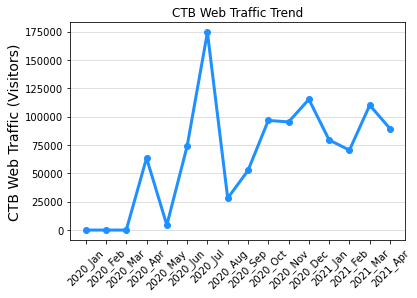

In [177]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Visitors'], color='dodgerblue', marker='o',linewidth=3 )
# set x-axis label
#ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Web Traffic Trend', fontsize=12)
ax.set_ylabel("CTB Web Traffic (Visitors)",color="Black",fontsize=14)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart5.png", bbox_inches='tight') 

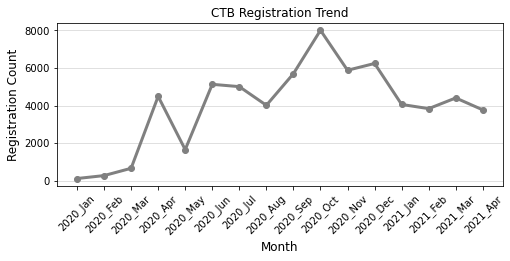

In [178]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['CTB Registration'], color='grey', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
# set y-axis label
ax.set_title('CTB Registration Trend', fontsize=12)
ax.set_ylabel("Registration Count",color="Black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart6.png", bbox_inches='tight') 

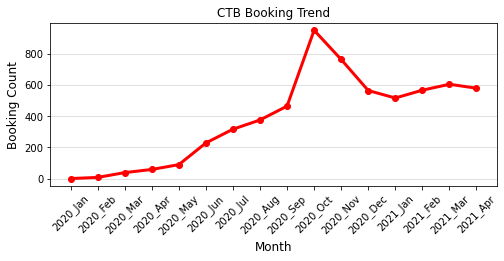

In [179]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)
#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total CTB Booking'], color='red', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=12)
ax.set_title('CTB Booking Trend', fontsize=12)
# set y-axis label
ax.set_ylabel("Booking Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart7.png", bbox_inches='tight') 

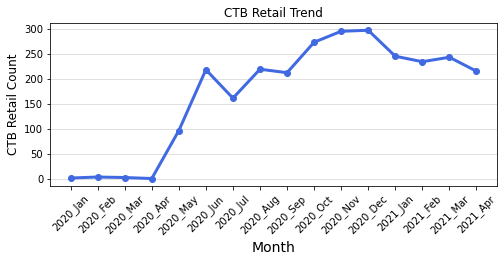

In [180]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)

#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total Retail'], color='royalblue', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Retail Trend', fontsize=12)
ax.set_ylabel("CTB Retail Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart9.png", bbox_inches='tight') 

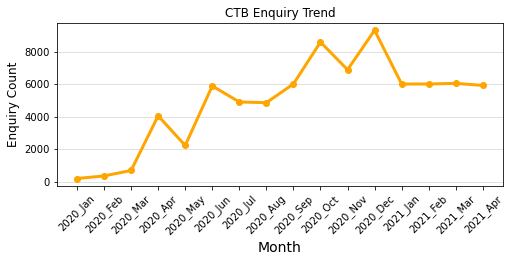

In [181]:
# create figure and axis objects with subplots()
#from matplotlib.pyplot import figure
fig,ax = plt.subplots()
# make a plot
#figure(num=None, figsize=(20, 16), dpi=80, facecolor='w', edgecolor='k')
plt.rcParams["figure.figsize"] = (8,3)
plt.xticks(rotation=45)

#labels = ['Jan20','Feb20','Mar20','Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20', 'Nov20','Dec20','Jan21','Feb21']
#ax1.axes.set_xticklabels(labels)
ax.plot(df['ORDER_DATEMonthKey'],df['Total Enquiry'], color='orange', marker='o', linewidth=3 )
# set x-axis label
ax.set_xlabel("Month",fontsize=14)
# set y-axis label
ax.set_title('CTB Enquiry Trend', fontsize=12)
ax.set_ylabel("Enquiry Count",color="black",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("chart8.png", bbox_inches='tight') 

In [182]:
df1_2 = df['Retail Conversion Ratio'] = df['Total Retail'] / df['Total Enquiry']

In [183]:
df1_2

0     0.005236
1     0.008571
2     0.002907
3     0.000000
4     0.043165
5     0.037024
6     0.032844
7     0.045071
8     0.035263
9     0.031781
10    0.042834
11    0.031884
12    0.040793
13    0.038948
14    0.040185
15    0.036311
dtype: float64

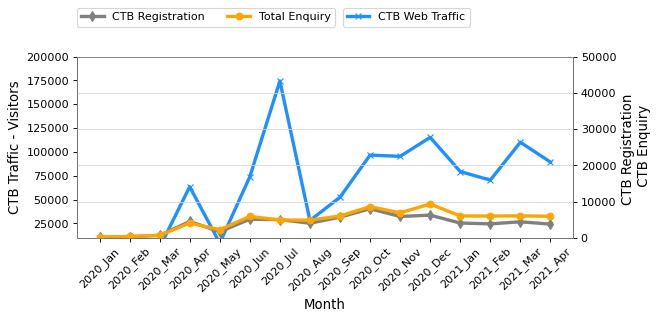

In [184]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Visitors', color="dodgerblue",legend=False,ax=ax,marker='x',linewidth=3)
plt.ylim(ymax=200000, ymin=10000)
plt.ylabel("CTB Traffic - Visitors", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(np.arange(16), df['Month'][0:16], rotation=45)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['CTB Web Traffic'],loc='upper center', bbox_to_anchor=(0.664, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB Registration', legend=False, color='grey',linewidth=3, marker='d', ax=ax2)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Enquiry', legend=False, color='Orange', linewidth=3, marker='o', ax=ax2)

plt.ylim(ymax = 50000, ymin = 0)


plt.ylabel("CTB Registration \n CTB Enquiry",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.26, 1.3), ncol=2)
#ax2.legend(["CTB Enquiry"],loc='upper center', bbox_to_anchor=(0.26, 1.3), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart1.png", bbox_inches='tight')
plt.show()

## chart 2 

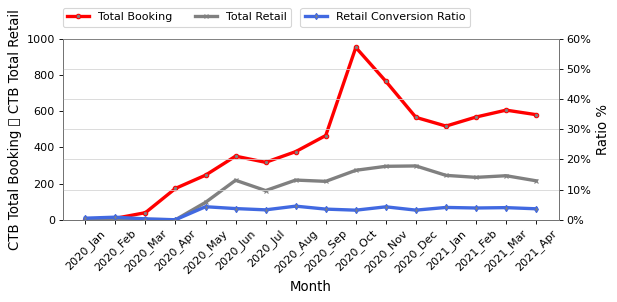

In [185]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()



df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Booking', color="red",linewidth=3,legend=False,ax=ax,marker='o', markerfacecolor='grey', markersize=4)
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False, linewidth=3,color='grey', ax=ax, marker='x', markerfacecolor='grey', markersize=4)
plt.xticks(np.arange(16), df['Month'][0:16], rotation=45)
plt.ylim(ymax=1000, ymin=0)
plt.ylabel("CTB Total Booking \t CTB Total Retail", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.23, 1.2), ncol=2,)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Retail Conversion Ratio', legend=False,linewidth=3, color='royalblue',marker='d', markerfacecolor='grey', markersize=4, ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.6, ymin = 0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
plt.ylabel("Ratio %",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.65, 1.2), ncol=2,)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
    

#plt.savefig("chart2")
plt.savefig("chart2.png", bbox_inches='tight')               
plt.show()

## Weekly

In [186]:
df2= pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "Weekly_Trend_final")

In [187]:
df2.to_excel("weekly.xlsx")

In [188]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2.head()

,Unnamed: 0,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,year,Week Number
0,0,2020_10,105,0.0,9.0,NaN,2020,10
1,1,2020_11,102,2.0,10.0,NaN,2020,11
2,2,2020_12,160,3.0,7.0,2.0,2020,12
3,3,2020_13,255,3.0,5.0,NaN,2020,13
4,4,2020_14,287,6.0,0.0,NaN,2020,14


In [189]:
from natsort import natsorted
from natsort import natsorted, index_natsorted, order_by_index

#df2=natsorted(df2,df2['ORDER_DATEWeekKey'],)
df2 = df2.reindex(index=order_by_index(df2.index, index_natsorted(df2.ORDER_DATEWeekKey)))

In [190]:
df2[['year','Week Number']] = df2['ORDER_DATEWeekKey'].str.split("_",expand=True)
df2

,Unnamed: 0,ORDER_DATEWeekKey,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,year,Week Number
20,20,2020_3,64,NaN,NaN,NaN,2020,3
31,31,2020_4,66,NaN,NaN,NaN,2020,4
42,42,2020_5,62,0.0,1.0,1.0,2020,5
47,47,2020_6,69,0.0,1.0,1.0,2020,6
48,48,2020_7,118,0.0,2.0,NaN,2020,7
...,...,...,...,...,...,...,...,...
56,56,2021_14,1135,100.0,89.0,36.0,2021,14
57,57,2021_15,1018,26.0,31.0,66.0,2021,15
58,58,2021_16,759,NaN,NaN,51.0,2021,16
59,59,2021_17,506,NaN,NaN,53.0,2021,17


In [191]:
df2 = df2.rename(columns={'Enquiry Count': 'CTB Enquiry', 'Retail Count': 'CTB Retail'})
df2

,Unnamed: 0,ORDER_DATEWeekKey,CTB Enquiry,CTB_BOOKING_Y,CTB_BOOKING_N,CTB Retail,year,Week Number
20,20,2020_3,64,NaN,NaN,NaN,2020,3
31,31,2020_4,66,NaN,NaN,NaN,2020,4
42,42,2020_5,62,0.0,1.0,1.0,2020,5
47,47,2020_6,69,0.0,1.0,1.0,2020,6
48,48,2020_7,118,0.0,2.0,NaN,2020,7
...,...,...,...,...,...,...,...,...
56,56,2021_14,1135,100.0,89.0,36.0,2021,14
57,57,2021_15,1018,26.0,31.0,66.0,2021,15
58,58,2021_16,759,NaN,NaN,51.0,2021,16
59,59,2021_17,506,NaN,NaN,53.0,2021,17


In [192]:
df2['Conversion Ratio'] = df2['CTB Retail'] / df2['CTB Enquiry']

In [193]:
df2_1 = df2.copy()

In [194]:
df2_1['Conversion Ratio'] = df2_1['CTB Retail'] / df2_1['CTB Enquiry']

In [195]:
df2_1.to_excel("weekly_ratio.xlsx")

In [196]:
df2.tail(5)

,Unnamed: 0,ORDER_DATEWeekKey,CTB Enquiry,CTB_BOOKING_Y,CTB_BOOKING_N,CTB Retail,year,Week Number,Conversion Ratio
56,56,2021_14,1135,100.0,89.0,36.0,2021,14,0.031718
57,57,2021_15,1018,26.0,31.0,66.0,2021,15,0.064833
58,58,2021_16,759,NaN,NaN,51.0,2021,16,0.067194
59,59,2021_17,506,NaN,NaN,53.0,2021,17,0.104743
64,64,2021_53,522,21.0,7.0,5.0,2021,53,0.009579


In [197]:
df2.to_excel("Weekly.xlsx")

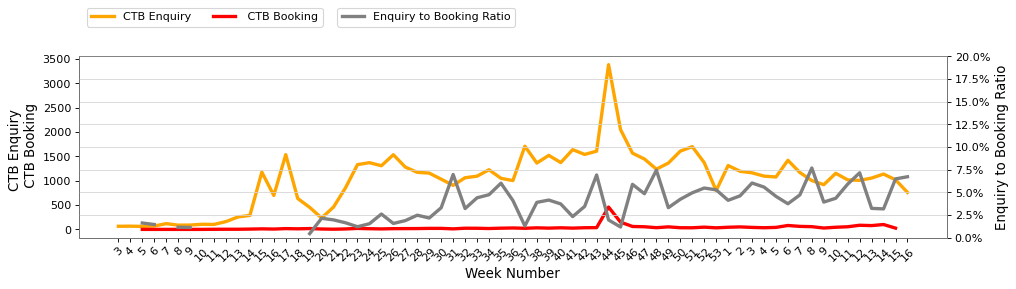

In [198]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




df2[0:67].plot(kind='line',x='Week Number',y='CTB Enquiry', linewidth=3, color="orange",legend=False,ax=ax,)
df2[0:67].plot(kind='line',x='Week Number',y='CTB_BOOKING_Y', linewidth=3,legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry \n CTB Booking", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(68), df2['Week Number'][0:68], rotation=45)
ax.legend(['CTB Enquiry', ' CTB Booking'],loc='upper center', bbox_to_anchor=(0.145, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:67].plot(kind='line',x='Week Number',y='Conversion Ratio',linewidth=3, legend=False, color='grey', ax=ax2)
ax2.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.2, ymin = 0)
plt.xticks(np.arange(67), df2['Week Number'][0:67], rotation=45)
plt.ylabel("Enquiry to Booking Ratio",fontsize=12)

ax2.legend(['Enquiry to Booking Ratio'],loc='upper center', bbox_to_anchor=(0.40, 1.3), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart3.png", bbox_inches='tight')        
plt.show()

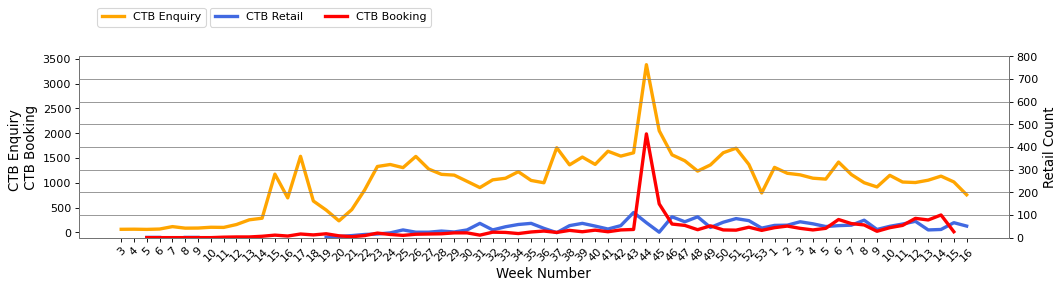

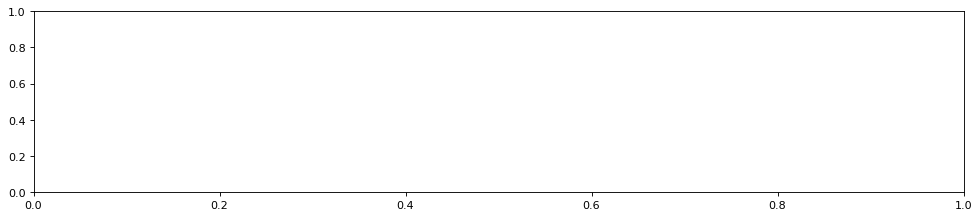

In [199]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Enquiry',linewidth=3, color="orange",legend=False,ax=ax,)
#df3[0:59].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("CTB Enquiry \n CTB Booking ", fontsize=12)
plt.xlabel("Week Number", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(69), df2['Week Number'][0:69], rotation=45)
ax.legend(['CTB Enquiry'],loc='upper center', bbox_to_anchor=(0.078, 1.3), ncol=2)


#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB Retail',linewidth=3, legend=False, color='royalblue', ax=ax2)
df2[0:67].plot(kind='line',x='ORDER_DATEWeekKey',y='CTB_BOOKING_Y',linewidth=3, legend=False, color='red', ax=ax2)

plt.ylim(ymax =800, ymin = 0)
plt.xticks(np.arange(67), df2['Week Number'][0:69], rotation=45)
plt.ylabel("Retail Count",fontsize=12)
ax2.legend(['CTB Retail', 'CTB Booking'],loc='upper center', bbox_to_anchor=(0.26, 1.3), ncol=2)
plt.grid(color='grey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("chart4.png", bbox_inches='tight')         
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.show()

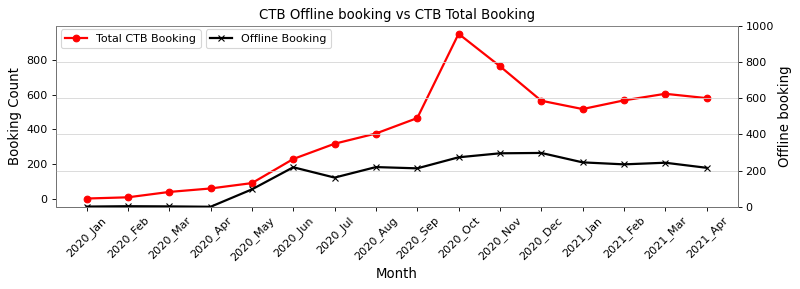

In [200]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', color="red",linewidth=2,legend=False,marker ='o',ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
#plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.11, 1.01), ncol=2)


#plt.subplots_adjust(left=0.15)
plt.title("CTB Offline booking vs CTB Total Booking")


ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total Retail', legend=False,linewidth=2, color='black',marker ='x', ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(16), df['ORDER_DATEMonthKey'][0:16],rotation=45)

plt.ylabel("Offline booking",fontsize=12)
ax2.legend(['Offline Booking'],loc='upper center', bbox_to_anchor=(0.312, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#chart9.png", bbox_inches='tight')         
plt.show()

#chart9")

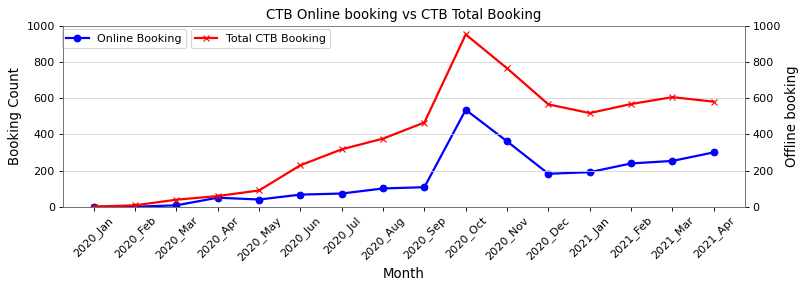

In [201]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(11, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="blue",legend=False,marker="o",ax=ax,linewidth=2)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=1000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(['Online Booking'],loc='upper center', bbox_to_anchor=(0.09, 1.01), ncol=2)

plt.title("CTB Online booking vs CTB Total Booking")
#plt.subplots_adjust(left=0.15)



ax2 = ax.twinx()
#.plot(x="ORDER_DATEMonthKey", y="CTB_BOOKING_N" , ax=ax2, legend=False, color="r")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='red', marker="x", linewidth=2,ax=ax2)

plt.ylim(ymax = 1000, ymin = 0)
plt.xticks(np.arange(16), df['ORDER_DATEMonthKey'][0:16], rotation=45)

plt.ylabel("Offline booking",fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.29, 1.01), ncol=2)
plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
        
plt.savefig("#10.png", bbox_inches='tight')       
plt.show()
#plt.savefig("chart10.png", bbox_inches='tight') 

In [202]:
df

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_Jan,2020,1,191,0,1,1,0,0,0,0.0,120,0,1,1,1,191,0.005236
1,4,2020_Feb,2020,2,350,0,8,3,0,0,0,0.0,276,0,8,8,3,350,0.008571
2,5,2020_Mar,2020,3,688,8,31,2,0,0,0,0.0,664,8,39,39,2,688,0.002907
3,6,2020_Apr,2020,4,4051,50,9,0,114,1,0,63489.2,4487,164,59,173,0,4051,0.000000
4,7,2020_May,2020,5,2224,40,50,30,156,66,0,4396.2,1657,196,90,246,96,2224,0.043165
5,8,2020_Jun,2020,6,5888,67,162,106,122,112,0,73959.2,5127,189,229,351,218,5888,0.037024
6,9,2020_Jul,2020,7,4902,73,244,161,0,0,0,174323.6,5004,73,317,317,161,4902,0.032844
7,10,2020_Aug,2020,8,4859,101,275,219,0,0,0,28113.6,4012,101,376,376,219,4859,0.045071
8,11,2020_Sep,2020,9,6012,108,357,212,0,0,0,52529.5,5694,108,465,465,212,6012,0.035263
9,1,2020_Oct,2020,10,8590,535,416,273,0,0,0,96675.5,8000,535,951,951,273,8590,0.031781


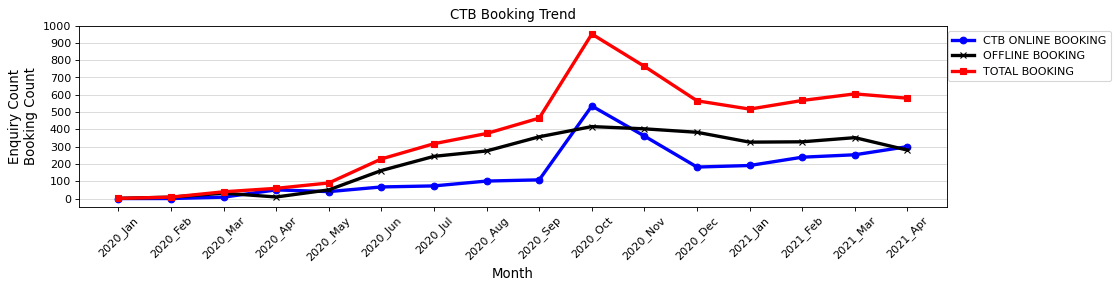

In [203]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.title("CTB Booking Trend")

df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_Y', color="blue",legend=False,ax=ax,linewidth=3, marker='o')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='CTB_BOOKING_N', legend=False, color='black', ax=ax,linewidth=3,marker='x')
df.plot(kind='line',x='ORDER_DATEMonthKey',y='Total CTB Booking', legend=False, color='red', ax=ax,linewidth=3,marker='s')
plt.yticks(np.arange(0, 1100, 100))
ax.legend(["CTB ONLINE BOOKING" , "OFFLINE BOOKING" , "TOTAL BOOKING"],loc='upper center', bbox_to_anchor=(1.095, 1.0), ncol=1)
plt.ylabel("Enquiry Count\nBooking Count", fontsize=12)
plt.xlabel("Month", fontsize = 12)

plt.xticks(np.arange(16), df['ORDER_DATEMonthKey'][0:16], rotation=45)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
#ax.legend(loc='upper center', bbox_to_anchor=(0.26, 1.0), ncol=2)
#ax2 = ax.twinx()


plt.yticks(np.arange(0, 1100, 100))
plt.savefig("#chart11.jpg", bbox_inches='tight') 
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.show()

In [204]:
df3= pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "Hourly_Trend_final")

In [205]:
df3['Booking Count'].sum()

2586

In [206]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count
0,0,0-2,2706,34
1,1,10-12,8426,364
2,2,12-14,8599,411
3,3,14-16,8829,396
4,4,16-18,7883,397
5,5,18-20,8066,298
6,6,2-4,1022,14
7,7,20-22,8219,248
8,8,22-24,6621,131
9,9,4-6,1096,14


In [207]:
df3 = df3.reindex(index=order_by_index(df3.index, index_natsorted(df3.Range_name)))

In [208]:
df3.shape

(12, 4)

In [209]:
df3['Enquiry Count'].sum()

69747

In [210]:
df3['Enquiry %'] = (df3['Enquiry Count'] /69747)*100

In [211]:
df3['Enquiry %']

0      3.879737
6      1.465296
9      1.571394
10     4.216669
11     7.654810
1     12.080806
2     12.328846
3     12.658609
4     11.302278
5     11.564655
7     11.784019
8      9.492881
Name: Enquiry %, dtype: float64

In [212]:
df3['Enquiry %'] = df3['Enquiry %'].round(2).astype(str)+ '%'

In [213]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count,Enquiry %
0,0,0-2,2706,34,3.88%
6,6,2-4,1022,14,1.47%
9,9,4-6,1096,14,1.57%
10,10,6-8,2941,87,4.22%
11,11,8-10,5339,192,7.65%
1,1,10-12,8426,364,12.08%
2,2,12-14,8599,411,12.33%
3,3,14-16,8829,396,12.66%
4,4,16-18,7883,397,11.3%
5,5,18-20,8066,298,11.56%


In [214]:
df3['Booking Count'].sum()

2586

In [215]:
df3['Booking %'] = (df3['Booking Count'] /2586)*100

In [216]:
df3['Booking %'] = df3['Booking %'].round(2).astype(str)+ '%'

In [217]:
df3

,Unnamed: 0,Range_name,Enquiry Count,Booking Count,Enquiry %,Booking %
0,0,0-2,2706,34,3.88%,1.31%
6,6,2-4,1022,14,1.47%,0.54%
9,9,4-6,1096,14,1.57%,0.54%
10,10,6-8,2941,87,4.22%,3.36%
11,11,8-10,5339,192,7.65%,7.42%
1,1,10-12,8426,364,12.08%,14.08%
2,2,12-14,8599,411,12.33%,15.89%
3,3,14-16,8829,396,12.66%,15.31%
4,4,16-18,7883,397,11.3%,15.35%
5,5,18-20,8066,298,11.56%,11.52%


In [218]:
df3.to_excel("Hourly.xlsx")

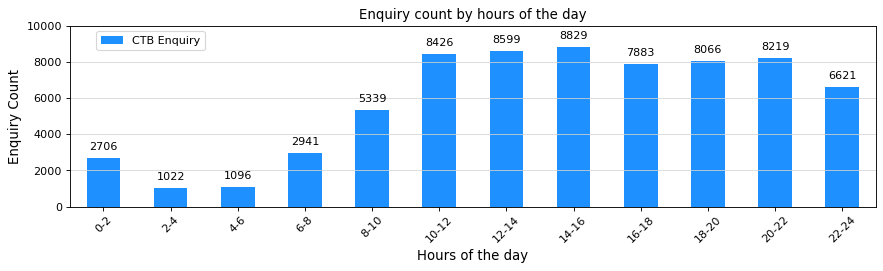

In [219]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Enquiry"],loc="upper center", bbox_to_anchor=(0.1, 1.0))


plt.title("Enquiry count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#12.jpg", bbox_inches='tight')      
plt.show()


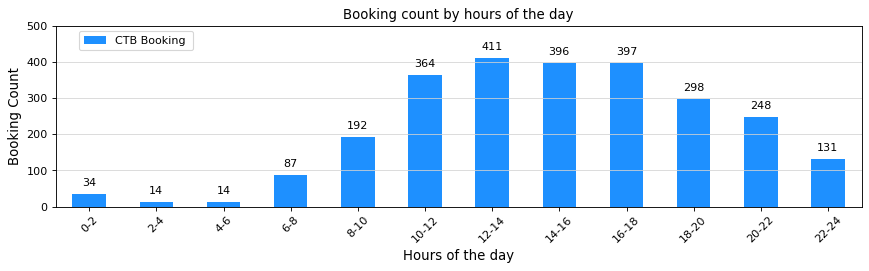

In [220]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df3.plot(kind='bar',x='Range_name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')             
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Hours of the day", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["CTB Booking "],loc="upper center", bbox_to_anchor=(0.1, 1.0))


plt.title("Booking count by hours of the day")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')      
plt.savefig("#13.jpg", bbox_inches='tight')       
plt.show()

## Dealer

In [221]:
df4 = pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "Region_final")

In [222]:
df4.head(2)

,Unnamed: 0,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,0,Central RO1,5292,465,0.075874,0.079297,0.087868,4102.764706,344.941176
1,1,Central RO2,6276,499,0.089982,0.085095,0.079509,4102.764706,344.941176


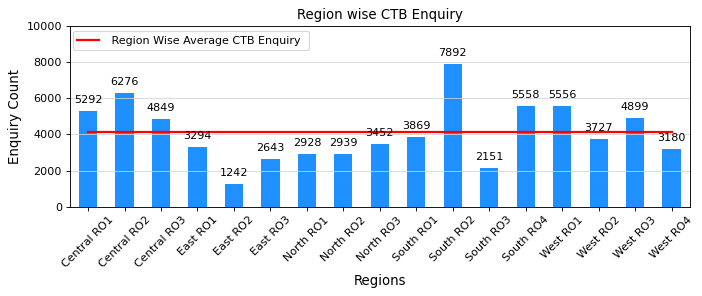

In [223]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=10000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Enquiry", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.195, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart18", bbox_inches='tight')      
plt.show()

In [224]:
df4['Enq to Booking Ratio']= df4['Enq to Booking Ratio'] * 100 

In [225]:
df4['Enquiry to booking ratio']= df4['Enq to Booking Ratio'].round(2).astype(str)+ '%'

In [226]:
data = df4[['Dealer Region Name','Enquiry to booking ratio','Enquiry Count','Booking Count']]
data

,Dealer Region Name,Enquiry to booking ratio,Enquiry Count,Booking Count
0,Central RO1,8.79%,5292,465
1,Central RO2,7.95%,6276,499
2,Central RO3,8.35%,4849,405
3,East RO1,9.96%,3294,328
4,East RO2,6.76%,1242,84
5,East RO3,9.12%,2643,241
6,North RO1,9.53%,2928,279
7,North RO2,6.74%,2939,198
8,North RO3,11.1%,3452,383
9,South RO1,8.68%,3869,336


In [227]:
data.to_excel("Region wise.xlsx")

In [228]:
df4['Booking Count'].sum()

5864

In [229]:
df['Total Booking'].sum()

6525

In [230]:
df

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_Jan,2020,1,191,0,1,1,0,0,0,0.0,120,0,1,1,1,191,0.005236
1,4,2020_Feb,2020,2,350,0,8,3,0,0,0,0.0,276,0,8,8,3,350,0.008571
2,5,2020_Mar,2020,3,688,8,31,2,0,0,0,0.0,664,8,39,39,2,688,0.002907
3,6,2020_Apr,2020,4,4051,50,9,0,114,1,0,63489.2,4487,164,59,173,0,4051,0.000000
4,7,2020_May,2020,5,2224,40,50,30,156,66,0,4396.2,1657,196,90,246,96,2224,0.043165
5,8,2020_Jun,2020,6,5888,67,162,106,122,112,0,73959.2,5127,189,229,351,218,5888,0.037024
6,9,2020_Jul,2020,7,4902,73,244,161,0,0,0,174323.6,5004,73,317,317,161,4902,0.032844
7,10,2020_Aug,2020,8,4859,101,275,219,0,0,0,28113.6,4012,101,376,376,219,4859,0.045071
8,11,2020_Sep,2020,9,6012,108,357,212,0,0,0,52529.5,5694,108,465,465,212,6012,0.035263
9,1,2020_Oct,2020,10,8590,535,416,273,0,0,0,96675.5,8000,535,951,951,273,8590,0.031781


In [231]:
75973 + 1966

77939

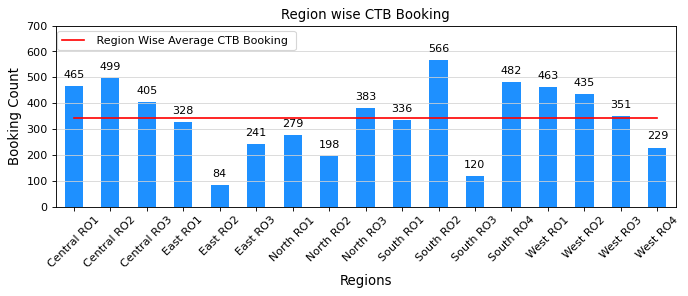

In [232]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

df4.plot(kind='line',x='Dealer Region Name', y='Avg_booking', color='red',ax=ax)
splot = df4.plot(kind='bar',x='Dealer Region Name',y='Booking Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=700, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.195, 1.01), ncol=2)

plt.title("Region wise CTB Booking", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend([" Region Wise Average CTB Booking "],loc="upper center", bbox_to_anchor=(0.195, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#19.jpg", bbox_inches='tight')        
plt.show()

In [233]:
df4['Enquiry Count'].sum()

69747

In [234]:
df4['Booking Count'].sum()

5864

## Model 

In [235]:
df5 = pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "model_final")

In [236]:
df5.head(2)

,Unnamed: 0,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
0,0,AURA,AURA,3659,275.0,both,0.075157
1,1,All New i20,All New i20,6520,1199.0,both,0.183896


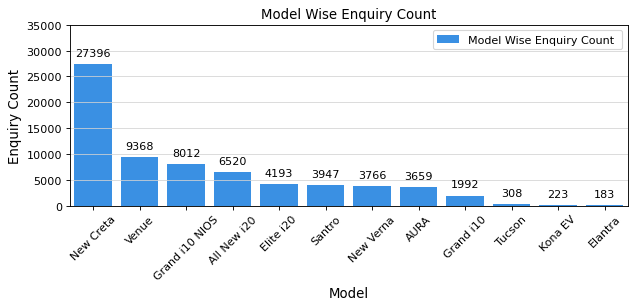

In [237]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Enquiry Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5[0:12], x = 'MODEL', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=35000, ymin=0)
ax.set_ylabel('Enquiry Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Model Wise Enquiry Count "],loc="upper center", bbox_to_anchor=(0.82, 1.0))
plt.title("Model Wise Enquiry Count",fontsize=12)

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart20.jpg", bbox_inches='tight')
plt.show()


In [238]:
df5['Enquiry Count'].sum()

69747

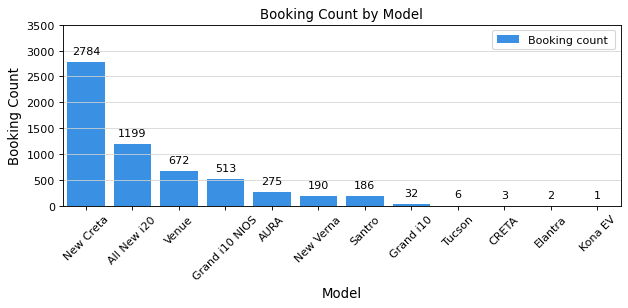

In [239]:
df5 = df5.reindex(index=order_by_index(df5.index, index_natsorted(df5['Booking Count'],reverse=True)))
from matplotlib.pyplot import figure
#from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(9, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df5[0:12], x = 'MODEL', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points') 
        

#ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax=3500, ymin=0)
ax.set_ylabel('Booking Count',fontsize=12)
#ax.legend()
plt.xticks(rotation=45)
plt.xlabel("Model",fontsize=12)
ax.legend(["Booking count "],loc="upper center", bbox_to_anchor=(0.88, 1.0))
plt.title("Booking Count by Model",fontsize=12)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#21.jpg", bbox_inches='tight')
plt.show()


In [240]:
df5.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last') 


In [241]:
df5

,Unnamed: 0,MODEL,EQCR_MODEL_NAME,Enquiry Count,Booking Count,_merge,Enq to Booking Ratio
9,9,New Creta,New Creta,27396,2784.0,both,0.101621
13,13,Venue,Venue,9368,672.0,both,0.071734
6,6,Grand i10 NIOS,Grand i10 NIOS,8012,513.0,both,0.064029
1,1,All New i20,All New i20,6520,1199.0,both,0.183896
4,4,Elite i20,NaN,4193,NaN,left_only,NaN
11,11,Santro,Santro,3947,186.0,both,0.047124
10,10,New Verna,New Verna,3766,190.0,both,0.050451
0,0,AURA,AURA,3659,275.0,both,0.075157
5,5,Grand i10,Grand i10,1992,32.0,both,0.016064
12,12,Tucson,Tucson,308,6.0,both,0.019481


In [242]:
df_model_e2b1 = df5.copy()

In [243]:
df_model_e2b1.drop(df_model_e2b1.loc[df_model_e2b1['MODEL']=='Elite i20'].index,inplace=True)

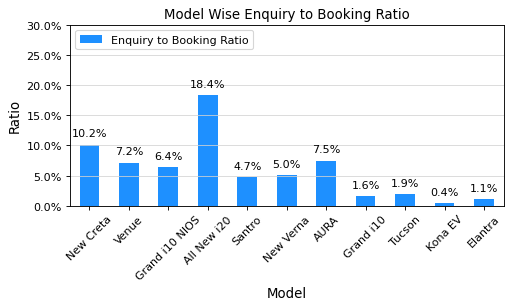

In [244]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_model_e2b1[0:11].plot(kind='bar',x='MODEL',y='Enq to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Ratio", fontsize=12)
plt.xlabel("Model", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.3, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Model Wise Enquiry to Booking Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#22.jpg", bbox_inches='tight')      
plt.show()

In [245]:
df6 = pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "variant_final")

In [246]:
df6.head()

,Unnamed: 0,Variant Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,High,10191,1079,0.169635,0.207820,0.017961
1,1,Low,25558,1894,0.425428,0.364792,0.031527
2,2,Mid,24327,2219,0.404937,0.427388,0.036937


In [247]:
df_var = {'Variant Type':['Low', 'Med', 'High'],
        'Enquiry Count':[25558,24327,10191],
        'Booking Count':[1894,2219,2219],
        'Enquiry to Booking Ratio':[0.031527,0.036937,0.017961]}

In [248]:
df_variant = pd.DataFrame(df_var)

In [249]:
df_variant

,Variant Type,Enquiry Count,Booking Count,Enquiry to Booking Ratio
0,Low,25558,1894,0.031527
1,Med,24327,2219,0.036937
2,High,10191,2219,0.017961


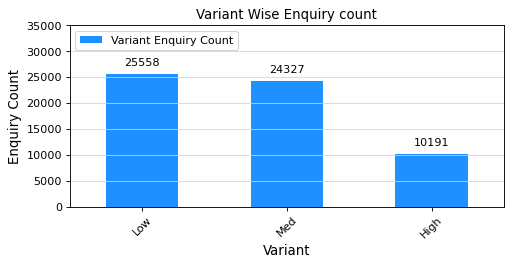

In [250]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=35000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Enquiry count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#23.jpg", bbox_inches='tight')       
plt.show()

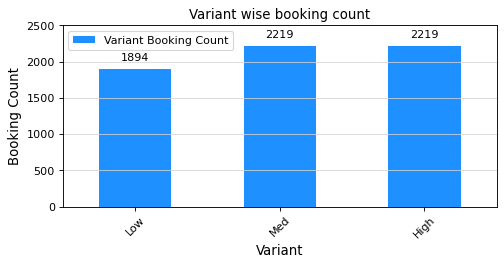

In [251]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=2500, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Variant Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant wise booking count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#24.jpg", bbox_inches='tight')       
plt.show()

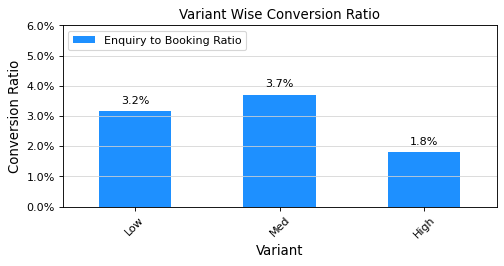

In [252]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_variant.plot(kind='bar',x='Variant Type',y='Enquiry to Booking Ratio', color="dodgerblue",legend=False,ax=ax,)



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Conversion Ratio", fontsize=12)
plt.xlabel("Variant", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Variant Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#25.jpg", bbox_inches='tight')       
plt.show()

In [253]:
df7 = pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "body_final")

In [254]:
df7.head()

,Unnamed: 0,Body Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,HatchBack,24664,1930,0.354526,0.329127,0.027742
1,1,SUV,37072,3465,0.532881,0.590894,0.049807
2,2,Sedan,7833,469,0.112593,0.079980,0.006742


In [255]:
df_bod = {'Body Type':['HatchBack', 'Sedan', 'SUV'],
        'Enquiry Count':[24664,7833,37072],
        'Booking Count':[1930,469,3465],
        'Enq to Booking Ratio':[0.027742,0.006742,0.049807]}

In [256]:
df_body = pd.DataFrame(df_bod)

In [257]:
df_body

,Body Type,Enquiry Count,Booking Count,Enq to Booking Ratio
0,HatchBack,24664,1930,0.027742
1,Sedan,7833,469,0.006742
2,SUV,37072,3465,0.049807


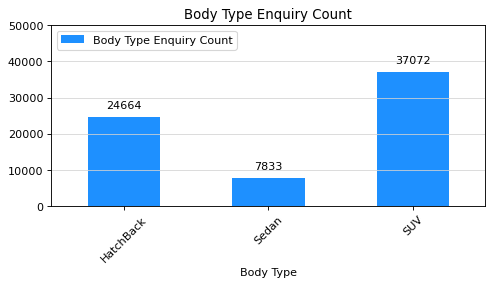

In [258]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=50000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Enquiry Count")
ax.legend(["Body Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#26body.jpg", bbox_inches='tight') 
plt.show()

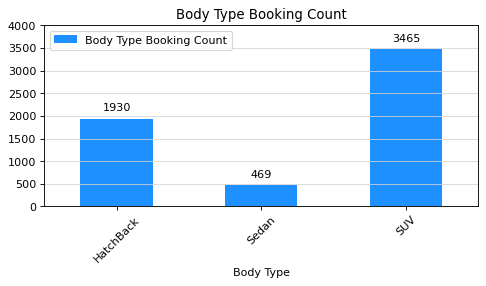

In [259]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_body.plot(kind='bar',x='Body Type',y='Booking Count', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        
plt.ylim(ymax=4000, ymin=0)
plt.xticks(rotation=45)
plt.title("Body Type Booking Count")
ax.legend(["Body Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#27body.jpg", bbox_inches='tight') 
plt.show()

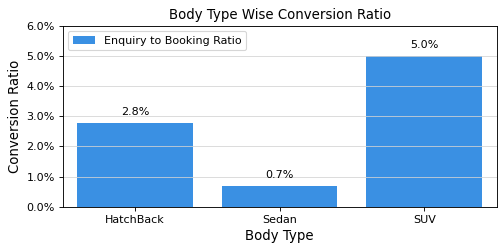

In [260]:

# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_body, x = 'Body Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")



for p in splot.patches:
        splot.annotate('{:.1f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylabel("Conversion Ratio", fontsize=12)
plt.xlabel("Body Type", fontsize = 12)
plt.xticks(rotation=0)
plt.ylim(ymax=0.06, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry to Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))


plt.title("Body Type Wise Conversion Ratio")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
        
plt.savefig("#28body.jpg", bbox_inches='tight')       
plt.show()




In [261]:
df7 = pd.read_excel("CTB_monthly_report_apr.xlsx", sheet_name = "fuel_final")

In [262]:
df7.head(2)

,Unnamed: 0,Fuel Type,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio
0,0,CNG,2824,216,0.040489,0.036986,0.003097
1,1,Diesel,16463,1558,0.236039,0.266781,0.022338


In [263]:
df7.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last')

In [264]:
#df_fuel_elec.drop(df_fuel_elec.loc[df_fuel_elec['Fuel Type']=='Electric'].index,inplace=True)

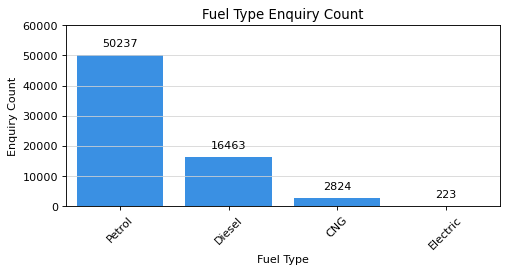

In [265]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enquiry Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=60000, ymin=0)
plt.title("Fuel Type Enquiry Count")
#ax.legend(["Fuel Type Enquiry Count"],loc="upper left", bbox_to_anchor=(0.5, 1.2))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart29.jpg", bbox_inches='tight')
plt.show()

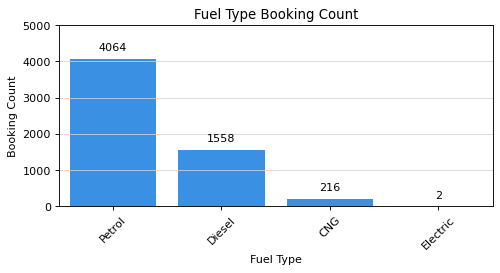

In [266]:
# plotting percentage in axis 


from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Count', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')

        

plt.xticks(rotation=45)
plt.ylim(ymax=5000, ymin=0)
plt.title("Fuel Type Booking Count")
#ax.legend(["Fuel Type Booking Count"],loc="upper left", bbox_to_anchor=(0.0, 1.0))

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#29fuel.jpg", bbox_inches='tight')
plt.show()

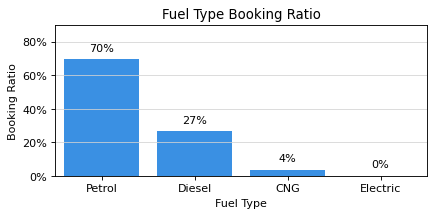

In [267]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(6, 2.5), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.9, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
#ax.legend(["Fuel Type Booking Ratio"],loc="upper left", bbox_to_anchor=(0.0, 1.0))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.title("Fuel Type Booking Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

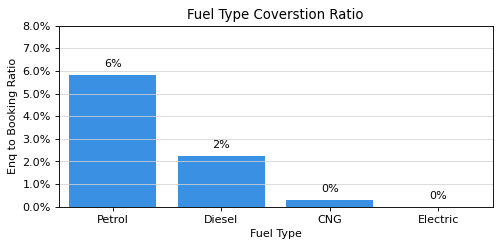

In [268]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(7, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=df7, x = 'Fuel Type', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
        
plt.ylim(ymax=0.08, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.title("Fuel Type Coverstion Ratio")
plt.savefig("#31fuel.jpg", bbox_inches='tight')

## Zone

In [269]:
GDMS_booking_north = Zone(GDMS_booking_region,"North")
GDMS_booking_east = Zone(GDMS_booking_region,"East")
GDMS_booking_west = Zone(GDMS_booking_region,"West")
GDMS_booking_south = Zone(GDMS_booking_region,"South")
GDMS_booking_central = Zone(GDMS_booking_region,"Central")

North :-  511 349 860 0.5941860465116279 0.40581395348837207
East :-  403 250 653 0.6171516079632465 0.38284839203675347
West :-  994 484 1478 0.6725304465493911 0.3274695534506089
South :-  840 664 1504 0.5585106382978723 0.44148936170212766
Central :-  746 623 1369 0.5449233016800584 0.4550766983199416


In [270]:
frames = [GDMS_booking_north, GDMS_booking_east,GDMS_booking_west,GDMS_booking_south, GDMS_booking_central]

In [271]:
ctb_zones = pd.concat(frames)

In [272]:
ctb_zones

,BKNG_DATE_NEWMonthKey,Offline Booking,Online Booking,Total Booking
0,2020_10,46,71,117
1,2020_11,47,45,92
2,2020_12,40,22,62
3,2020_3,2,2,4
4,2020_4,3,7,10
...,...,...,...,...
11,2020_9,76,27,103
12,2021_1,43,67,110
13,2021_2,73,102,175
14,2021_3,72,82,154


In [273]:
df8 = pd.read_excel("CTB_auto_monthly_report_apr_Zone.xlsx", sheet_name = "GDMS_booking_north")

In [274]:
df8.head(14)

,Unnamed: 0,BKNG_DATE_NEWMonthKey,Offline Booking,Online Booking,Total Booking
0,0,2020_10,46,71,117
1,1,2020_11,47,45,92
2,2,2020_12,40,22,62
3,3,2020_3,2,2,4
4,4,2020_4,3,7,10
5,5,2020_5,9,4,13
6,6,2020_6,23,7,30
7,7,2020_7,28,10,38
8,8,2020_8,30,15,45
9,9,2020_9,45,17,62


In [275]:
df8 = df8.reindex(index=order_by_index(df8.index, index_natsorted(df8.BKNG_DATE_NEWMonthKey)))



In [276]:
df8.BKNG_DATE_NEWMonthKey

3      2020_3
4      2020_4
5      2020_5
6      2020_6
7      2020_7
8      2020_8
9      2020_9
0     2020_10
1     2020_11
2     2020_12
10     2021_1
11     2021_2
12     2021_3
13     2021_4
Name: BKNG_DATE_NEWMonthKey, dtype: object

In [277]:
#df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'] .replace(['2020_1'], '2020_Jan')
#df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df8['BKNG_DATE_NEWMonthKey'] = df8['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')

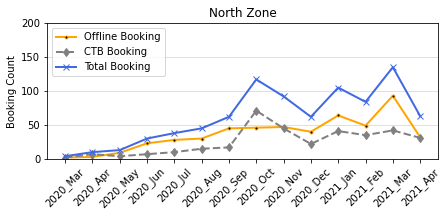

In [278]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df8, marker='o', markerfacecolor='black', markersize=3, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df8, marker='d', color='grey', linestyle='dashed', label="CTB Booking",linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df8, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=200, ymin=0)
plt.title("North Zone" )
plt.ylabel("Booking Count")

# show legend
#plt.legend(['Offline Booking'\n 'Online Booking'\n 'Total Booking'],loc="upper left", bbox_to_anchor=(0.0, 1.0)
plt.legend(loc='upper left')
# show graph
plt.grid(color='lightgrey', linewidth=0.7,axis='y') 
plt.savefig("#32North.jpg", bbox_inches='tight')
plt.show()

In [279]:
df8['Online Booking'].sum()

349

In [280]:
df8['Offline Booking'].sum()

511

In [281]:
df81 = pd.read_excel("CTB_auto_monthly_report_apr_Zone.xlsx", sheet_name = "GDMS_booking_east")
df81 = df81.reindex(index=order_by_index(df81.index, index_natsorted(df81.BKNG_DATE_NEWMonthKey)))

In [282]:
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df81['BKNG_DATE_NEWMonthKey'] = df81['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')

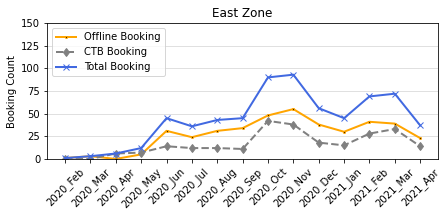

In [283]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df81, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df81, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df81, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=150, ymin=0)
plt.title("East Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc="upper left")
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#33East.jpg", bbox_inches='tight')
#plt.grid(color='lightgrey', linewidth=0.7)
# show graph
plt.show()

In [284]:
df81['Online Booking'].sum()

250

In [285]:
df81['Offline Booking'].sum()

403

In [286]:
df82 = pd.read_excel("CTB_auto_monthly_report_apr_Zone.xlsx", sheet_name = "GDMS_booking_west")

In [287]:
df82 = df82.reindex(index=order_by_index(df82.index, index_natsorted(df82.BKNG_DATE_NEWMonthKey)))

In [288]:
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df82['BKNG_DATE_NEWMonthKey'] = df82['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')

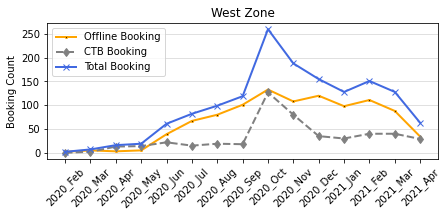

In [289]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df82, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df82, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df82, marker='x', color='royalblue', linewidth=2)
plt.title("West Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#33Westzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [290]:
df82['Online Booking'].sum()

484

In [291]:
df82['Offline Booking'].sum()

994

In [292]:
df83 = pd.read_excel("CTB_auto_monthly_report_apr_Zone.xlsx", sheet_name = "GDMS_booking_south")

In [293]:
df83 = df83.reindex(index=order_by_index(df83.index, index_natsorted(df83.BKNG_DATE_NEWMonthKey)))

In [294]:
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df83['BKNG_DATE_NEWMonthKey'] = df83['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')

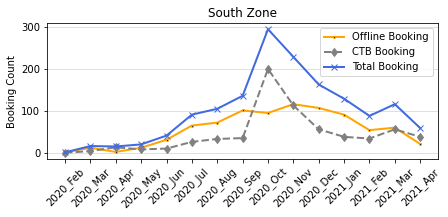

In [295]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df83, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df83, marker='d', color='grey', linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df83, marker='x', color='royalblue', linewidth=2)
plt.title("South Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend()
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#34southzone.jpg", bbox_inches='tight')

# show graph
plt.show()

In [296]:
df83['Online Booking'].sum()

664

In [297]:
df83['Offline Booking'].sum()

840

In [298]:
df84 = pd.read_excel("CTB_auto_monthly_report_apr_Zone.xlsx", sheet_name = "GDMS_booking_central")

In [299]:
df84 = df84.reindex(index=order_by_index(df84.index, index_natsorted(df84.BKNG_DATE_NEWMonthKey)))

In [300]:
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_1'], '2020_Jan')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_2'], '2020_Feb')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_3'], '2020_Mar')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_4'], '2020_Apr')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_5'], '2020_May')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_6'], '2020_Jun')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_7'], '2020_Jul')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_8'], '2020_Aug')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_9'], '2020_Sep')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_10'], '2020_Oct')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_11'], '2020_Nov')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2020_12'], '2020_Dec')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_1'], '2021_Jan')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_2'], '2021_Feb')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_3'], '2021_Mar')
df84['BKNG_DATE_NEWMonthKey'] = df84['BKNG_DATE_NEWMonthKey'].replace(['2021_4'], '2021_Apr')

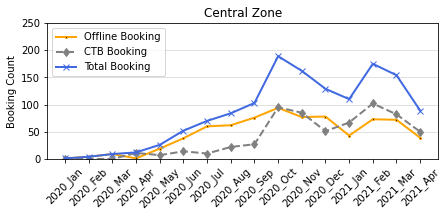

In [301]:
# libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
 
# Data
 
# multiple line plots

plt.figure(figsize=(7,2.5))

plt.xticks(rotation=45)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Offline Booking', data=df84, marker='o', markerfacecolor='black', markersize=2, color='orange', linewidth=2)
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Online Booking', data=df84, marker='d', color='grey',linewidth=2, linestyle='dashed', label="CTB Booking")
plt.plot( 'BKNG_DATE_NEWMonthKey', 'Total Booking', data=df84, marker='x', color='royalblue', linewidth=2)
plt.ylim(ymax=250, ymin=0)
plt.title("Central Zone" )
plt.ylabel("Booking Count")

# show legend
plt.legend(loc='upper left')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#35Centralzone.jpg", bbox_inches='tight')
# show graph
plt.show()

In [302]:
df84['Online Booking'].sum()

623

In [303]:
df84['Offline Booking'].sum()

746

## EBR

In [304]:
df

,Unnamed: 0,ORDER_DATEMonthKey,Year,Month,Enquiry Count,CTB_BOOKING_Y,CTB_BOOKING_N,Retail Count,CRM Booking,CRM Retail,Financial_enquiry,Visitors,CTB Registration,Online Booking,Total CTB Booking,Total Booking,Total Retail,Total Enquiry,Retail Conversion Ratio
0,0,2020_Jan,2020,1,191,0,1,1,0,0,0,0.0,120,0,1,1,1,191,0.005236
1,4,2020_Feb,2020,2,350,0,8,3,0,0,0,0.0,276,0,8,8,3,350,0.008571
2,5,2020_Mar,2020,3,688,8,31,2,0,0,0,0.0,664,8,39,39,2,688,0.002907
3,6,2020_Apr,2020,4,4051,50,9,0,114,1,0,63489.2,4487,164,59,173,0,4051,0.000000
4,7,2020_May,2020,5,2224,40,50,30,156,66,0,4396.2,1657,196,90,246,96,2224,0.043165
5,8,2020_Jun,2020,6,5888,67,162,106,122,112,0,73959.2,5127,189,229,351,218,5888,0.037024
6,9,2020_Jul,2020,7,4902,73,244,161,0,0,0,174323.6,5004,73,317,317,161,4902,0.032844
7,10,2020_Aug,2020,8,4859,101,275,219,0,0,0,28113.6,4012,101,376,376,219,4859,0.045071
8,11,2020_Sep,2020,9,6012,108,357,212,0,0,0,52529.5,5694,108,465,465,212,6012,0.035263
9,1,2020_Oct,2020,10,8590,535,416,273,0,0,0,96675.5,8000,535,951,951,273,8590,0.031781


EBR COUNT FOR MARCH 

E - 355252
B - 80431
R - 53499

NOTE : Pure offline = E - (CTB+FINANCE)
FOR EG: feb
355239 - 6008 = 349231 

In [305]:
xEQ_Pure_Offline = 285558 - 5921
xEQ_Pure_Offline

279637

In [306]:
xBook_Pure_Offline = 56040- 580
xBook_Pure_Offline

55460

In [307]:
xRetail_Pure_Offline = 41790- 209
xRetail_Pure_Offline

41581

In [308]:
import pandas as pd
  
# intialise data of lists.
df_EBR = {'Month':['Jan20', 'Feb20', 'Mar20', 'Apr20','May20','Jun20','Jul20','Aug20','Sep20','Oct20','Nov20','Dec20','Jan21','Feb21','Mar21','Apr21'],
        'EQ_Pure_Offline':[331139,342730,283911,20818,95886,275224,287142,289506,336103,337111,347013,411500,353202,349231,349337,279637],
        'EQ_CTB_generated':[191,350,688,4051,2224,5888,4902,4869,6012,8590,6887,9314,6006,6008,6047,5921],
        'Book_Pure_Offline':[52318,51783,48670,1056,14906,46980,57238,66792,56737,73108,84866,82734,78059,78579,79826,55460],
        'Book_CTB_generated':[1,8,39,59,90,229,317,376,465,951,764,565,517,567,605,580],
        'Retail_Pure_Offline':[41000,38498,20352,36,10792,30823,37374,43400,37958,53650,55312,56849,47283,50588,53257,41581],
        'Retail_CTB_generated':[1,3,2,0,30,106,159,219,212,274,296,297,243,229,242,209],
         'Month_y':['2020-Jan', '2020-Feb', '2020-Mar', '2020-Apr','2020-May','2020-Jun','2020-Jul','2020-Aug','2020-Sep','2020-Oct','2020-Nov','2020-Dec','2021-Jan','2021-Feb','2021-Mar','2021-Apr']}
  
# Create DataFrame
EBR = pd.DataFrame(df_EBR)
EBR




,Month,EQ_Pure_Offline,EQ_CTB_generated,Book_Pure_Offline,Book_CTB_generated,Retail_Pure_Offline,Retail_CTB_generated,Month_y
0,Jan20,331139,191,52318,1,41000,1,2020-Jan
1,Feb20,342730,350,51783,8,38498,3,2020-Feb
2,Mar20,283911,688,48670,39,20352,2,2020-Mar
3,Apr20,20818,4051,1056,59,36,0,2020-Apr
4,May20,95886,2224,14906,90,10792,30,2020-May
5,Jun20,275224,5888,46980,229,30823,106,2020-Jun
6,Jul20,287142,4902,57238,317,37374,159,2020-Jul
7,Aug20,289506,4869,66792,376,43400,219,2020-Aug
8,Sep20,336103,6012,56737,465,37958,212,2020-Sep
9,Oct20,337111,8590,73108,951,53650,274,2020-Oct


In [309]:
EBR['Offline EB'] = (EBR['Book_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online EB'] = (EBR['Book_CTB_generated']/EBR['EQ_CTB_generated']).round(2)
EBR['Offline ER'] = (EBR['Retail_Pure_Offline']/EBR['EQ_Pure_Offline']).round(2)
EBR['Online ER'] = (EBR['Retail_CTB_generated']/EBR['EQ_CTB_generated']).round(2)

In [310]:
EBR

,Month,EQ_Pure_Offline,EQ_CTB_generated,Book_Pure_Offline,Book_CTB_generated,Retail_Pure_Offline,Retail_CTB_generated,Month_y,Offline EB,Online EB,Offline ER,Online ER
0,Jan20,331139,191,52318,1,41000,1,2020-Jan,0.16,0.01,0.12,0.01
1,Feb20,342730,350,51783,8,38498,3,2020-Feb,0.15,0.02,0.11,0.01
2,Mar20,283911,688,48670,39,20352,2,2020-Mar,0.17,0.06,0.07,0.00
3,Apr20,20818,4051,1056,59,36,0,2020-Apr,0.05,0.01,0.00,0.00
4,May20,95886,2224,14906,90,10792,30,2020-May,0.16,0.04,0.11,0.01
5,Jun20,275224,5888,46980,229,30823,106,2020-Jun,0.17,0.04,0.11,0.02
6,Jul20,287142,4902,57238,317,37374,159,2020-Jul,0.20,0.06,0.13,0.03
7,Aug20,289506,4869,66792,376,43400,219,2020-Aug,0.23,0.08,0.15,0.04
8,Sep20,336103,6012,56737,465,37958,212,2020-Sep,0.17,0.08,0.11,0.04
9,Oct20,337111,8590,73108,951,53650,274,2020-Oct,0.22,0.11,0.16,0.03


Offline EB = Dealer Enquiry to Booking Ratio
Online EB = CTB Enquiry to Booking Ratio
Offline ER  = Dealer Enquiry to Retail Ratio
Online ER =  CTB Enquiry to Retail Ratio

In [311]:
EBR.to_excel("EBR.xlsx")

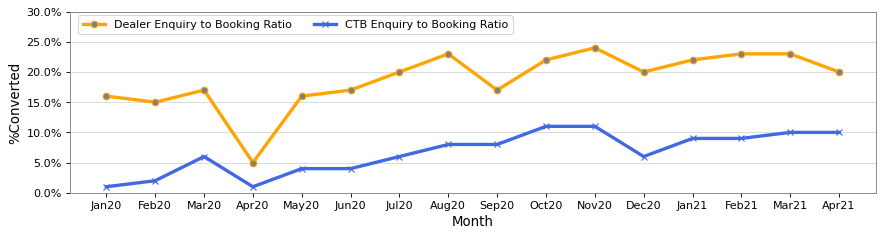

In [312]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline EB', linewidth=3, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='grey', markersize=6)
EBR.plot(kind='line',x='Month',y='Online EB', linewidth=3,legend=False, color='royalblue', ax=ax, marker='x', markerfacecolor='grey', markersize=6)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(16), EBR['Month'][0:16], rotation=0)
ax.legend(['Dealer Enquiry to Booking Ratio', 'CTB Enquiry to Booking Ratio'],loc='upper center', bbox_to_anchor=(0.28, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
#plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#ebr_eb.png", bbox_inches='tight')
plt.show()

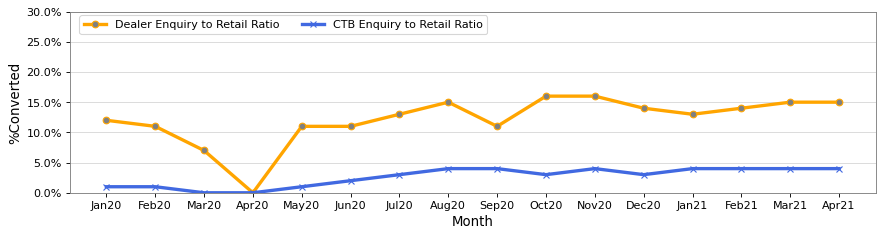

In [313]:
from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
figure(num=None, figsize=(13, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()




EBR.plot(kind='line',x='Month',y='Offline ER', linewidth=3, color="orange",legend=False,ax=ax, marker='o', markerfacecolor='gray', markersize=6)
EBR.plot(kind='line',x='Month',y='Online ER', linewidth=3,legend=False, color='royalblue', marker='x', markerfacecolor='gray', markersize=6, ax=ax)
plt.ylabel("%Converted", fontsize=12)
plt.xlabel("Month", fontsize = 12)
#plt.ylim(ymax=10000, ymin=0)
plt.xticks(np.arange(16), EBR['Month'][0:16], rotation=0)
ax.legend(['Dealer Enquiry to Retail Ratio', 'CTB Enquiry to Retail Ratio'],loc='upper center', bbox_to_anchor=(0.265, 1.01), ncol=2)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(ymax = 0.3, ymin = 0)
#plt.grid(color='lightgrey', linewidth=0.4)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax.spines[pos].set_edgecolor('grey')
        
#plt.savefig("chart3.png", bbox_inches='tight')
#plt.savefig("#17.png", bbox_inches='tight')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#ebr_er.png", bbox_inches='tight')
plt.show()

In [314]:
EBR['EB_Diff'] = EBR['Offline EB'] - EBR['Online EB']
EBR['ER_Diff'] = EBR['Offline ER'] - EBR['Online ER']

In [315]:
EBR['EB_Diff'] = (EBR['EB_Diff'])*100
EBR['EB_Diff'] = EBR['EB_Diff'].round(2).astype(str)+ '%'

In [316]:
EBR['ER_Diff'] = (EBR['ER_Diff'])*100
EBR['ER_Diff'] = EBR['ER_Diff'].round(2).astype(str)+ '%'

In [317]:
EBR=EBR[['Month','EB_Diff','ER_Diff']]

In [318]:
EBR.to_excel("EBR_Diff.xlsx")

## CUSTOMER INSIGHT

## GCRM DATASET

In [319]:
## for april only

In [320]:
GCRMall_1 = pd.read_excel("GCRM_till_Mar21.xlsx", encoding = "ISO-8859-1")
print(GCRMall_1.shape)
GCRMall_1.head(2)

(224532, 6)


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION
0,0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN
1,1,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN


In [321]:
#april
GCRMall_2 = pd.read_excel('CTB_Customer_data_20210510.xlsx')

In [322]:
now = pd.Timestamp('now')
GCRMall_2['BIRTH_DT'] = pd.to_datetime(GCRMall_2['BIRTH_DT'], errors ="coerce") 
GCRMall_2['BIRTH_DT'] = GCRMall_2['BIRTH_DT'].where(GCRMall_2['BIRTH_DT'] < now, GCRMall_2['BIRTH_DT'] -  np.timedelta64(100, 'Y'))   # 2
GCRMall_2['AGE'] = (now - GCRMall_2['BIRTH_DT']).astype('<m8[Y]')    # 3
GCRMall_2.head()

,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,SEX_MF,BIRTH_DT,OCCUPATION,AGE
0,HIREN K. SHAH,9.000000e+00,example@example.com,M,NaT,NaN,NaN
1,SHUBHI GUPTA,5.910559e+08,no@email.com,W,NaT,NaN,NaN
2,SUMANTHSOLD THE CAR,1.212121e+09,no@email.com,M,NaT,NaN,NaN
3,KHALIQUZZAMAN AZMI SOLD ..,1.234568e+09,wasiazmi@gmail.com,M,NaT,NaN,NaN
4,SAHIL YASIN MANSURI,1.234568e+09,abc@mail.com,M,NaT,NaN,NaN


In [323]:
frames = [GCRMall_1,GCRMall_2]
#frames = [GCRM33]
GCRMall = pd.concat(frames)
print(GCRMall.shape)
print("AGE :", GCRMall.AGE.notna().sum())
print("OCC :", GCRMall.OCCUPATION.notna().sum())
print(GCRMall.columns)
GCRMall.head(2)

(230679, 8)
AGE : 11924
OCC : 17527
Index(['Unnamed: 0', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE',
       'OCCUPATION', 'SEX_MF', 'BIRTH_DT'],
      dtype='object')


,Unnamed: 0,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
0,0.0,Balvinder,9.992104e+09,mdeshwal95@gmail.com,NaN,NaN,NaN,NaT
1,1.0,Ctb Testing,9.970978e+09,ctbtesting1@gmail.com,NaN,NaN,NaN,NaT


In [324]:
GCRMall.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [325]:
GCRMall_april = GCRMall.copy()

In [326]:
GCRMall_april.to_excel("GCRM_till_Apr21.xlsx")

In [327]:
GCRMall_unq = GCRMall.drop_duplicates(subset=['CELL_PH_NUM', 'EMAIL_ADDR'], keep='last')
print(GCRMall_unq.shape)
print("AGE :", GCRMall_unq.AGE.notna().sum())
print("OCC :", GCRMall_unq.OCCUPATION.notna().sum())

print(" ")
GCRMall_unq1 = GCRMall.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(GCRMall_unq1.shape)
print("AGE :", GCRMall_unq1.AGE.notna().sum())
print("OCC :", GCRMall_unq1.OCCUPATION.notna().sum())

(163893, 7)
AGE : 9423
OCC : 14106
 
(66842, 7)
AGE : 3996
OCC : 4628


In [328]:
AGE = GCRMall[GCRMall["AGE"].notna()]
#AGE = GCRMall[GCRMall["AGE"]>0]
print(AGE.shape)
AGE.head(2)

(11924, 7)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
12,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen,NaN,NaT
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT


In [329]:
AGE["AGE_INT"] = AGE["AGE"].astype(int)

In [330]:
AGE.to_excel("AGE.xlsx")

In [331]:
AGE1 = AGE[AGE.AGE_INT.astype(str).str.isdigit()]
AGE1.shape

(11924, 8)

In [332]:
age_unq = AGE1.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(age_unq.shape)
age_unq.head(2)

(5853, 8)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,AGE_INT
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT,35
64,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government,NaN,NaT,34


In [333]:
age_unq18 = age_unq[(age_unq["AGE"].astype(int)>18) & (age_unq["AGE"].astype(int)<100)]
age_unq18.shape

(5779, 8)

In [334]:
apr_custonly.drop(['_merge'], axis=1,inplace = True)

In [335]:
CTB_age0 = pd.merge(CTB_data, age_unq18, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(CTB_age0.shape)
CTB_age0['_merge'].value_counts()

(73288, 54)


left_only     66644
right_only     3541
both           3103
Name: _merge, dtype: int64

In [336]:
age_unq18.columns

Index(['LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE', 'OCCUPATION', 'SEX_MF',
       'BIRTH_DT', 'AGE_INT'],
      dtype='object')

In [337]:
CTB_age0.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'LAST_NAME', 'CELL_PH_NUM', 'EMAIL_ADDR', 'AGE',
       'OCCUPATION', 'SEX_MF', 'BIRTH_DT', 'AGE_INT', '_merge'],
      dtype='object')

In [338]:
CTB_ageBoth_enq = CTB_age0.copy()
CTB_age_enqGBY = CTB_ageBoth_enq[['ORDER_ID','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",CTB_age_enqGBY.ORDER_ID.sum())
print(CTB_age_enqGBY.shape)
CTB_age_enqGBY

total enquiry :  3103
(62, 2)


,AGE_INT,ORDER_ID
0,19.0,1
1,20.0,13
2,21.0,14
3,22.0,26
4,23.0,40
...,...,...
57,77.0,0
58,78.0,3
59,81.0,0
60,82.0,0


In [339]:
CTB_GDMS.drop(['_merge'], axis=1,inplace = True)
book_age = pd.merge(CTB_GDMS, age_unq18, left_on=['CUSTOMER_EMAIL'] ,right_on = ['EMAIL_ADDR'], how = 'outer', indicator= True)
print(book_age.shape)
book_age['_merge'].value_counts()

(73311, 81)


left_only     66644
right_only     3540
both           3127
Name: _merge, dtype: int64

In [340]:
book_ageBoth = book_age[book_age["_merge"]=="both"]
print(book_ageBoth.shape)
book_ageBoth.head(2)

(3127, 81)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BKNG_DATE_NEWWeekKey,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,AGE_INT,_merge
17,C1101,Central RO1,N1230,LAMBA HYUNDAI,DEEPAK SHARMA,Delhi,Delhi,ORD2021011415595975,2021-01-14 23:01:08,Open,...,NaN,Sushil Kumar Singh,8.860558e+09,sushil.alld@gmail.com,38.0,NaN,NaN,NaT,38.0,both
63,W1101,West RO1,E5222,GOYAL HYUNDAI,Pooja Singh,Chhattisgarh,Raigarh,ORD2021011517678404,2021-01-15 15:38:31,Open,...,NaN,R. KUMAR,8.800271e+09,vu2rje@yahoo.com,33.0,NaN,NaN,NaT,33.0,both


In [341]:
book_ageBoth1 = book_ageBoth.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
book_ageBoth1.shape

(2239, 81)

In [342]:
book_ageBoth1.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO',
       'EQRY_DATE', 'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE',
       'EQCR_MODEL_NAME', 'EQRY_NEWCAR_Y

In [343]:
book_ageBothGBY = book_ageBoth1[['EQRY_ENQRY_NO','AGE_INT']].groupby('AGE_INT',as_index=False).count()
print("total enquiry : ",book_ageBothGBY["EQRY_ENQRY_NO"].sum())
print(book_ageBothGBY.shape)
book_ageBothGBY

total enquiry :  510
(58, 2)


,AGE_INT,EQRY_ENQRY_NO
0,19.0,1
1,20.0,3
2,21.0,0
3,22.0,2
4,23.0,5
5,24.0,5
6,25.0,16
7,26.0,13
8,27.0,25
9,28.0,31


In [344]:
Age_Trend = pd.merge(CTB_age_enqGBY, book_ageBothGBY, left_on=['AGE_INT'],right_on = ['AGE_INT'], how = 'outer',indicator=True,)
Age_Trend["EQRY_ENQRY_NO"].fillna(0,inplace=True)
print(Age_Trend['_merge'].value_counts())
Age_Trend

both          58
left_only      4
right_only     0
Name: _merge, dtype: int64


,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,19.0,1,1.0,both
1,20.0,13,3.0,both
2,21.0,14,0.0,both
3,22.0,26,2.0,both
4,23.0,40,5.0,both
...,...,...,...,...
57,77.0,0,0.0,left_only
58,78.0,3,0.0,both
59,81.0,0,0.0,left_only
60,82.0,0,0.0,left_only


In [345]:
Age_Trend.to_excel("Age_Trend_till_April.xlsx")

In [346]:
OCC = GCRMall[GCRMall["OCCUPATION"].notna()]
print(OCC.shape)
OCC.head(2)

(17527, 7)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
12,SANTANU BHATTACHARYYA,8.335038e+09,sbhattacharyya37@gmail.com,32.0,Businessmen,NaN,NaT
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT


In [347]:
occ_unq = OCC.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
print(occ_unq.shape)
occ_unq.head(2)

(6546, 7)


,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT
39,PRIYANKA KUMARI,9.909925e+09,cse.priyanka@gmail.com,35.0,Service- Private Company,NaN,NaT
64,ADEEL MAHMOOD,9.717071e+09,adeelmahmood01@gmail.com,34.0,Service- Government,NaN,NaT


In [348]:
CTB_occ = pd.merge(CTB_data, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
CTB_occ.shape

(73897, 53)

In [349]:
CTB_occ['_merge'].value_counts()

left_only     66384
right_only     4150
both           3363
Name: _merge, dtype: int64

In [350]:
CTB_occBoth_enq = CTB_occ[CTB_occ["_merge"]=="both"]
print(CTB_occBoth_enq.shape)
CTB_occBoth_enq.head(2)

(3363, 53)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,ORDER_DATEWeekKey,_ORDER _ID,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,_merge
30,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Vishal Vijay Patole,Maharashtra,Ahmednagar,ORD2021011313377226,2021-01-13 22:59:46,Open,...,2021_2,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both
31,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Jagdish Jedhe,Maharashtra,Ahmednagar,ORD2021011312244073,2021-01-13 22:56:12,Cancellation,...,2021_2,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both


In [351]:
CTB_occBoth_enq1 =  CTB_occBoth_enq.drop_duplicates(subset=['EMAIL_ADDR'], keep='last')
CTB_occBoth_enq1.shape

(2396, 53)

In [352]:
CTB_occ_enqGBY = CTB_occBoth_enq1[['ORDER_ID','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total enquiry : ",CTB_occ_enqGBY.ORDER_ID.sum())
print(CTB_occ_enqGBY.shape)
CTB_occ_enqGBY

total enquiry :  2396
(50, 2)


,OCCUPATION,ORDER_ID
0,Business men- indust w/ 10 or more Emp,9
1,Business with 1-9 employees,3
2,Businessmen,516
3,Busmen Indust W/ 1~9 Emp,2
4,Busmen- indust w/ 1~9 Emp,6
5,Busmen- indust w/ No emp,16
6,Chartered Accountant,1
7,Clerical/Salesmen,2
8,College Teacher,3
9,Corporate- Junior /Middle Management,3


In [353]:
book_occ = pd.merge(CTB_GDMS, occ_unq, left_on=['CUSTOMER_EMAIL'],right_on = ['EMAIL_ADDR'], how = 'outer',indicator=True)
print(book_occ.shape)
book_occ['_merge'].value_counts()

(73920, 80)


left_only     66384
right_only     4149
both           3387
Name: _merge, dtype: int64

In [354]:
book_occBoth = book_occ[book_occ["_merge"]=="both"]
print(book_occBoth.shape)
book_occBoth.head(2)

(3387, 80)


,REGION_CODE,DELR_RGON_NAME,DEALER_ID,DEALER_NAME,ASSIGNED_SALES_CONSULTANT,STATE,CITY,ORDER_ID,ORDER_DATE,ORDER_STATUS,...,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey,LAST_NAME,CELL_PH_NUM,EMAIL_ADDR,AGE,OCCUPATION,SEX_MF,BIRTH_DT,_merge
30,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Vishal Vijay Patole,Maharashtra,Ahmednagar,ORD2021011313377226,2021-01-13 22:59:46,Open,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both
31,W1103,West RO3,W2242,ILAKSHI HYUNDAI,Jagdish Jedhe,Maharashtra,Ahmednagar,ORD2021011312244073,2021-01-13 22:56:12,Cancellation,...,NaN,NaN,Ratnasagar Dongare,7.387886e+09,ratna.don007@gmail.com,NaN,Skilled Worker,NaN,NaT,both


In [355]:
book_occBoth.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID', 'CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO',
       'EQRY_DATE', 'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE',
       'EQCR_MODEL_NAME', 'EQRY_NEWCAR_Y

In [356]:
book_occBoth1 = book_occBoth.drop_duplicates(subset=['EQRY_REF_NO'], keep='last')
book_occBoth1.shape

(622, 80)

In [357]:
book_occBoth2 = book_occBoth.drop_duplicates(subset=['CUSTOMER_EMAIL'], keep='last')
book_occBoth2.shape

(2397, 80)

In [358]:
book_occBothGBY = book_occBoth1[['EQRY_REF_NO','OCCUPATION']].groupby('OCCUPATION',as_index=False).count()
print("total Booking : ",book_occBothGBY["EQRY_REF_NO"].sum())
print(book_occBothGBY.shape)
book_occBothGBY

total Booking :  621
(30, 2)


,OCCUPATION,EQRY_REF_NO
0,Business men- indust w/ 10 or more Emp,2
1,Businessmen,124
2,Busmen Indust W/ 1~9 Emp,1
3,Busmen- indust w/ No emp,3
4,College Teacher,2
5,Farmer,14
6,Home Maker,11
7,Information Technology - Engineer,2
8,NRI,1
9,Officer/ExecutivesMiddle/Senior,2


In [359]:
occ_Trend = pd.merge(CTB_occ_enqGBY, book_occBothGBY, left_on=['OCCUPATION'],right_on = ['OCCUPATION'], how = 'outer',indicator=True,)
occ_Trend["EQRY_REF_NO"].fillna(0,inplace=True)
print(book_occ['_merge'].value_counts())
occ_Trend

left_only     66384
right_only     4149
both           3387
Name: _merge, dtype: int64


,OCCUPATION,ORDER_ID,EQRY_REF_NO,_merge
0,Business men- indust w/ 10 or more Emp,9,2.0,both
1,Business with 1-9 employees,3,0.0,left_only
2,Businessmen,516,124.0,both
3,Busmen Indust W/ 1~9 Emp,2,1.0,both
4,Busmen- indust w/ 1~9 Emp,6,0.0,left_only
5,Busmen- indust w/ No emp,16,3.0,both
6,Chartered Accountant,1,0.0,left_only
7,Clerical/Salesmen,2,0.0,left_only
8,College Teacher,3,2.0,both
9,Corporate- Junior /Middle Management,3,0.0,left_only


In [360]:
occ_Trend.to_excel("occ_Trend_Apr.xlsx")

In [361]:
df_age = pd.read_excel("Age_Trend_till_April.xlsx", sheet_name="Sheet1")

In [362]:
df_age.head(2)

,Unnamed: 0,AGE_INT,ORDER_ID,EQRY_ENQRY_NO,_merge
0,0,19,1,1,both
1,1,20,13,3,both


In [363]:
df_age = df_age.rename(columns={'ORDER_ID': 'CTB Enquiry', 'EQRY_ENQRY_NO': 'CTB Booking'})
df_age

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge
0,0,19,1,1,both
1,1,20,13,3,both
2,2,21,14,0,both
3,3,22,26,2,both
4,4,23,40,5,both
...,...,...,...,...,...
57,57,77,0,0,left_only
58,58,78,3,0,both
59,59,81,0,0,left_only
60,60,82,0,0,left_only


In [364]:
df_age['CTB Enquiry'].sum()

3103

In [365]:
df_age['CTB Booking'].sum()

510

In [366]:
df_age['Enquiry Ratio'] = (df_age['CTB Enquiry']/2981)*100
df_age['Enquiry Ratio'] = df_age['Enquiry Ratio'].round(2).astype(str)+ '%'


In [367]:
df_age['Booking Ratio'] = (df_age['CTB Booking']/555)*100
df_age['Booking Ratio'] = df_age['Booking Ratio'].round(2).astype(str)+ '%'

In [368]:
df_age['Enquiry To Booking Ratio'] = (df_age['CTB Booking'] / df_age['CTB Enquiry'])*100
df_age['Enquiry To Booking Ratio'] = df_age['Enquiry To Booking Ratio'].round(2).astype(str)+ '%'
df_age.head(5)

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
0,0,19,1,1,both,0.03%,0.18%,100.0%
1,1,20,13,3,both,0.44%,0.54%,23.08%
2,2,21,14,0,both,0.47%,0.0%,0.0%
3,3,22,26,2,both,0.87%,0.36%,7.69%
4,4,23,40,5,both,1.34%,0.9%,12.5%


In [369]:
df_age_sort = df_age[(24-18):(35-18)]

In [370]:
df_age_sort

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
6,6,25,66,16,both,2.21%,2.88%,24.24%
7,7,26,90,13,both,3.02%,2.34%,14.44%
8,8,27,91,25,both,3.05%,4.5%,27.47%
9,9,28,156,31,both,5.23%,5.59%,19.87%
10,10,29,142,20,both,4.76%,3.6%,14.08%
11,11,30,162,20,both,5.43%,3.6%,12.35%
12,12,31,175,29,both,5.87%,5.23%,16.57%
13,13,32,150,18,both,5.03%,3.24%,12.0%
14,14,33,215,32,both,7.21%,5.77%,14.88%
15,15,34,190,25,both,6.37%,4.5%,13.16%


In [371]:
a = df_age_sort['CTB Enquiry'].sum()
b = df_age_sort['CTB Booking'].sum()
c = (b/a)*100
print(c)

15.809284818067754


In [372]:
df_age_sort2 = df_age[(35-18):(45-18)]

In [373]:
df_age_sort2

,Unnamed: 0,AGE_INT,CTB Enquiry,CTB Booking,_merge,Enquiry Ratio,Booking Ratio,Enquiry To Booking Ratio
17,17,36,139,24,both,4.66%,4.32%,17.27%
18,18,37,85,20,both,2.85%,3.6%,23.53%
19,19,38,91,14,both,3.05%,2.52%,15.38%
20,20,39,78,15,both,2.62%,2.7%,19.23%
21,21,40,101,17,both,3.39%,3.06%,16.83%
22,22,41,71,9,both,2.38%,1.62%,12.68%
23,23,42,65,9,both,2.18%,1.62%,13.85%
24,24,43,42,4,both,1.41%,0.72%,9.52%
25,25,44,34,8,both,1.14%,1.44%,23.53%
26,26,45,54,8,both,1.81%,1.44%,14.81%


In [374]:
x = df_age_sort2['CTB Enquiry'].sum()
y = df_age_sort2['CTB Booking'].sum()
z = (y/x)*100
print(z)

16.842105263157894


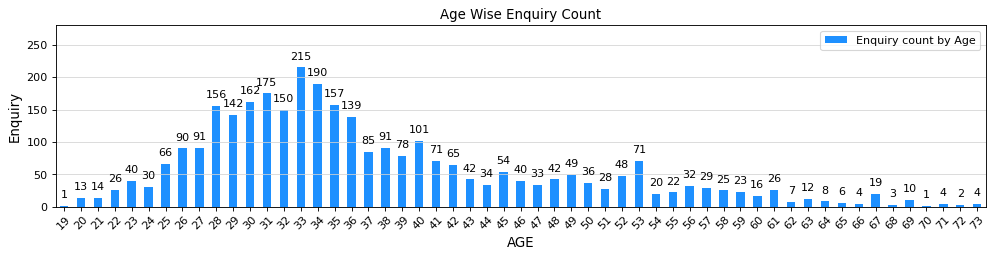

In [375]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Enquiry', color="dodgerblue",legend=False,ax=ax,)
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=280, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Age Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')      
plt.savefig("#14_18%.jpg", bbox_inches='tight')       
plt.show()


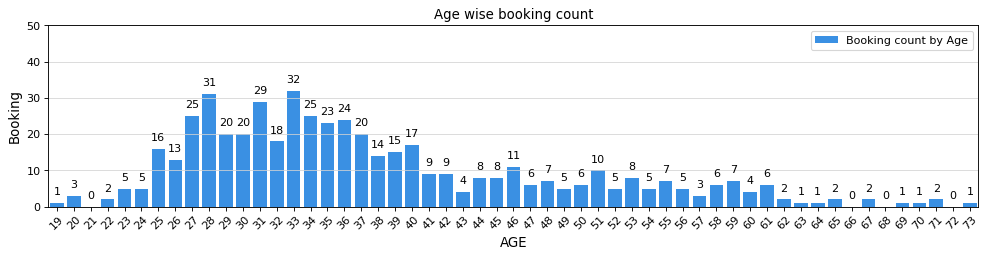

In [376]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(15, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()


splot = sns.barplot(data=df_age[0:55], x = 'AGE_INT', y = 'CTB Booking', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_age[0:55].plot(kind='bar',x='AGE_INT',y='CTB Booking', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking", fontsize=12)
plt.xlabel("AGE", fontsize = 12)
#plt.xticks(np.arange(0, len(df_age['AGE_INT'])+1, 5))
plt.xticks(rotation=45)
plt.ylim(ymax=50, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by Age"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Age wise booking count", fontsize=12)
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey') 
    
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#chart15.jpg", bbox_inches='tight')   

plt.show()

In [377]:
df_occ=pd.read_excel("april_occuption.xlsx", sheet_name= "Sheet1")

In [378]:
df_occ

,OCCUPATION,Enquiry,Booking
0,Businessman,647,161
1,Private Sector,535,155
2,Govt. Job,295,83
3,IT Sector,182,65
4,Others,172,27
5,Skilled Worker,131,26
6,Doctor,87,24
7,Teacher,61,14
8,Home Maker,57,11
9,Retired,36,11


df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- CA'], 'CA')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Self Employed- Agriculturist/Farm'], 'Farmer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Professional – Architect'], 'Architect')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['NRI'], 'Others')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Sports'], 'Sports')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Professional – Writer/Author'], 'Writer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Artist', 'Professional – Artist'], 'Artist')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Lawyer', 'Professional – Lawyer'], 'Lawyer')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Others', 'Other'], 'Others')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Teacher/Lecturer/Reader/Scientist', 'College Teacher', 'Profession- Teacher'], 'Teacher')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- Doctor', 'Professional – Doctor'], 'Doctor')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Profession- IT', 'Professional – Software Developers'], 'IT Sector')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Private Company', 'Supervisory Level','Clerical/Salesmen',
                                            'Corporate- Junior /Middle Management', 'Corporate– Senior Management'], 'Private Sector')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Government', 'Service-Defence', 'Government – Junior/ Middle Management',
                                            'Govt Executive – Senior Management', 'Armed Forces'], 'Govt. Job')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Service- Police', 'Armed Forces',
                                            'Service-Defence'], 'Police/Defence')
df_occ['OCCUPATION'] = df_occ['OCCUPATION'].replace(['Businessmen', 'Shop Owners','Busmen- indust w/ 1~9 Emp' ,'Busmen- indust w/ No emp', 'Petty Traders',
                                            'Business with 1-9 employees', 'Self Employed', 'Self Employed- Traders',
                                            'Business >50 employees', 'Business with 10-50 employees'], 'Businessman')


df_occ.sort_values("Enquiry", axis = 0, ascending = False, inplace = True, na_position ='last') 
#df_occ = df_occ.reindex(index=order_by_index(df_occ.index, index_natsorted(df_occ.Enquiry)))

df_occ.rename(columns = {'ORDER_ID':'Enquiry', 'EQRY_REF_NO':'Booking'}, inplace = True)

In [379]:
df_occ['Enquiry'].sum()

2396

In [380]:
df_occ['Booking'].sum()

621

In [381]:
df_occ.head()

,OCCUPATION,Enquiry,Booking
0,Businessman,647,161
1,Private Sector,535,155
2,Govt. Job,295,83
3,IT Sector,182,65
4,Others,172,27


df_occ.to_excel("april_occuption.xlsx")


In [382]:
#df_occ.drop(df_occ.loc[df_occ['Occupation']=='Other'].index, inplace=True)
df_occ.sort_values("OCCUPATION", axis = 0, ascending = True, inplace = False, na_position ='last')

,OCCUPATION,Enquiry,Booking
37,Architect,1,0
22,Artist,4,1
0,Businessman,647,161
14,CA,16,3
27,Chartered Accountant,1,0
28,Corporate Senior Management,1,0
6,Doctor,87,24
31,Employeed,1,0
30,Engineer,1,0
11,Farmer,30,7


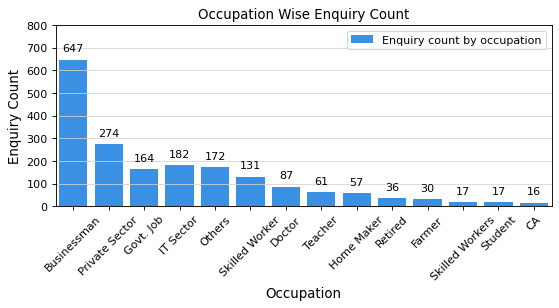

In [383]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:16], x = 'OCCUPATION', y = 'Enquiry', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=800, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Enquiry count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Enquiry Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')        
plt.savefig("#16.jpg", bbox_inches='tight')        
plt.show()

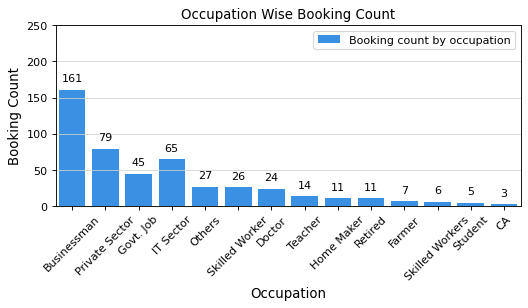

In [384]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(7.5, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

splot = sns.barplot(data=df_occ[0:16], x = 'OCCUPATION', y = 'Booking', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df_occ.plot(kind='bar',x='Occupation',y='CTB Enquiry', color="royalblue",legend=False,ax=ax,)
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)
plt.xlabel("Occupation", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=250, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(["Booking count by occupation"],loc="upper right", bbox_to_anchor=(1.0, 1.0))


plt.title("Occupation Wise Booking Count")
#plt.subplots_adjust(left=0.15)
#plt.grid(color='lightgrey', linewidth=0.7)

#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.grid(color='lightgrey', linewidth=0.7,axis='y')       
plt.savefig("#17.png", bbox_inches='tight')
plt.show()

In [385]:
df_occ['Enquiry:Booking (Same Occupation)'] = (df_occ['Booking'] / df_occ['Enquiry'])*100
df_occ['Enquiry:Booking (Same Occupation)'] = df_occ['Enquiry:Booking (Same Occupation)'].round(2).astype(str)+ '%'


In [386]:
df_occ['Enq.:Booking (All Enquiries)'] = (df_occ['Booking'] / 2396)*100
df_occ['Enq.:Booking (All Enquiries)'] = df_occ['Enq.:Booking (All Enquiries)'].round(2).astype(str)+ '%'


In [387]:
df_occ.to_excel("occ_tabl.xlsx")

In [388]:
### dealer - region sep > apr changes 


In [458]:

CTB_data.columns

Index(['REGION_CODE', 'DELR_RGON_NAME', 'DEALER_ID', 'DEALER_NAME',
       'ASSIGNED_SALES_CONSULTANT', 'STATE', 'CITY', 'ORDER_ID', 'ORDER_DATE',
       'ORDER_STATUS', 'ORDER_STAGE', 'CONSULTANT_ASSISGN_Y_N',
       'CUSTOMER_NAME', 'CUSTOMER_MOBILE', 'CUSTOMER_EMAIL', 'MODEL', 'ENGINE',
       'VARIANT', 'INTERIOR_COLOR', 'EXTERIOR_COLOR', 'FINANCE', 'LOAN_TYPE',
       'FINANCE_STATUS', 'BOOKING', 'FINAL_PURCHASE_AMOUNT', 'BOOKING_AMOUNT',
       'BALANCE_AMOUNT', 'TRADE', 'DEALER_CODE', 'DEAL_CODE_VALUE',
       'BOOKING_DATE', 'INVC_CNFR_YN', 'PAY_AT_DELR_YN', 'ORDER_DATEYear',
       'ORDER_DATEMonth', 'ORDER_DATEWeek', 'ORDER_DATEDay', 'ORDER_DATEhour',
       'ORDER_DATEDayofweek', 'ORDER_DATEDayofyear', 'ORDER_DATEweekofyear',
       'ORDER_DATEMonthName', 'ORDER_DATEMonthKey', 'ORDER_DATEWeekKey',
       '_ORDER _ID'],
      dtype='object')

In [459]:
#Dealer wise region count from sep'20 to Apr'21
#Ctb_data_region=CTB_data[(CTB_data['ORDER_DATE']>='2020-09-01')&(CTB_data['ORDER_DATE']<='2021-04-30')|(CTB_data['ORDER_DATEMonthKey']=='2021_4')] 

In [460]:
Ctb_data_region=CTB_data[(CTB_data['ORDER_DATE']>='2020-01-01')&(CTB_data['ORDER_DATE']<='2021-04-30')|(CTB_data['ORDER_DATEMonthKey']=='2021_4')] 

In [461]:
Ctb_data_region.ORDER_DATEMonthKey.value_counts()

2020_10    8590
2020_11    6887
2020_12    6603
2020_9     6012
2020_6     5888
2021_1     5279
2020_7     4902
2020_8     4859
2021_2     4662
2021_3     4606
2020_4     4051
2021_4     3955
2020_5     2224
2020_3      688
2020_2      350
2020_1      191
Name: ORDER_DATEMonthKey, dtype: int64

In [462]:
Region_enq1 = Trend_Analysis_gb(Ctb_data_region,['ORDER_ID','DELR_RGON_NAME'],'','DELR_RGON_NAME','Weekly')
print("total enquiry : ",Region_enq1.ORDER_ID.sum())
Region_enq1

total enquiry :  69747


,DELR_RGON_NAME,ORDER_ID
0,Central RO1,5292
1,Central RO2,6276
2,Central RO3,4849
3,East RO1,3294
4,East RO2,1242
5,East RO3,2643
6,North RO1,2928
7,North RO2,2939
8,North RO3,3452
9,South RO1,3869


In [475]:
Region_list1 = CTB_data[["DELR_RGON_NAME","DEALER_ID"]]
Region_list_uniq1 = Region_list1.drop_duplicates(subset=['DELR_RGON_NAME', 'DEALER_ID'], keep='last')
Region_list_uniq1.head(2)

,DELR_RGON_NAME,DEALER_ID
63126,West RO2,W3720
45811,South RO4,S8823


In [463]:
Region_enq1

,DELR_RGON_NAME,ORDER_ID
0,Central RO1,5292
1,Central RO2,6276
2,Central RO3,4849
3,East RO1,3294
4,East RO2,1242
5,East RO3,2643
6,North RO1,2928
7,North RO2,2939
8,North RO3,3452
9,South RO1,3869


In [464]:
GDMS_Booking.shape

(6133, 27)

In [465]:
GDMS_Booking['BKNG_DATE'].head(3)

0    20201104.0
1    20201028.0
2    20200515.0
Name: BKNG_DATE, dtype: float64

In [476]:
GDMS_booking_add_region1 = pd.merge(GDMS_booking, Region_list_uniq1, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region1.shape)
GDMS_booking_add_region1['_merge'].value_counts()

GDMS_add_region (6166, 30)


both          5864
right_only     302
left_only        0
Name: _merge, dtype: int64

In [466]:
#GDMS_Booking_new_1=GDMS_Booking[(GDMS_Booking['BKNG_DATE']>=20200901.0)&(GDMS_Booking['BKNG_DATE']<=20210430.0)|(GDMS_Booking['BKNG_DATE_NEWMonthKey']=='2021_4')]
#GDMS_Booking_new_1.shape

In [467]:
#GDMS_Booking_new_1=GDMS_Booking[(GDMS_Booking['BKNG_DATE']>=20200101.0)&(GDMS_Booking['BKNG_DATE']<=20210430.0)|(GDMS_Booking['BKNG_DATE_NEWMonthKey']=='2021_4')]
#GDMS_Booking_new_1.shape

In [468]:
GDMS_Booking_new_1['BKNG_DATE_NEWMonthKey'].value_counts()

2020_10    951
2020_11    764
2021_3     605
2021_4     580
2021_2     567
2020_12    565
2021_1     517
2020_9     465
2020_8     376
2020_7     317
2020_6     229
2020_5      90
2020_4      59
2020_3      39
2020_2       8
2020_1       1
Name: BKNG_DATE_NEWMonthKey, dtype: int64

In [469]:
GDMS_Booking_new_1.head(3)

,CSPM_DLR_NAME,EQRY_DLR_NO,EQRY_ENQRY_NO,EQRY_DATE,EQRY_STAT,EQRY_STATUS_NM,EQCR_MODEL_CODE,EQCR_MODEL_NAME,EQRY_NEWCAR_YN,EQRY_REF_NO,...,BKNG_DATE_NEWMonth,BKNG_DATE_NEWWeek,BKNG_DATE_NEWDay,BKNG_DATE_NEWhour,BKNG_DATE_NEWDayofweek,BKNG_DATE_NEWDayofyear,BKNG_DATE_NEWweekofyear,BKNG_DATE_NEWMonthName,BKNG_DATE_NEWMonthKey,BKNG_DATE_NEWWeekKey
0,ROSHAN HYUNDAI,N4A06,E202041462,20201104,80,Invoice Cancel,SV,All New i20,Y,ORD2020110413233196,...,11,45,4,0,2,309,45,Nov,2020_11,2020_45
1,SAI AUTO HYUNDAI,W1210,E202039463,20201028,80,Invoice Cancel,SV,All New i20,Y,ORD2020102811922815,...,10,44,28,0,2,302,44,Oct,2020_10,2020_44
2,RUDRA HYUNDAI,E1203,E202015900,20200506,60,Booking Cancel,HQ,Grand i10 NIOS,Y,ORD20205650670724,...,5,20,15,0,4,136,20,May,2020_5,2020_20


In [470]:
#Ctb_data_region.columns
GDMS_Booking_new_1.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey'],
      dtype='object')

In [471]:
GDMS_booking_add_region_1 = pd.merge(GDMS_Booking_new_1, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
GDMS_booking_add_region_1['_merge'].value_counts()


GDMS_add_region (6426, 30)


both          6133
right_only     293
left_only        0
Name: _merge, dtype: int64

In [472]:
#Region_booking = GDMS_booking_add_region_1[GDMS_booking_add_region_1["_merge"]!="both"]

In [473]:
Region_booking = GDMS_booking_add_region_1[GDMS_booking_add_region_1["_merge"]!="both"]

In [474]:
Region_booking = Trend_Analysis_gb(GDMS_booking_add_region_1,['EQRY_REF_NO','DELR_RGON_NAME'],'','DELR_RGON_NAME','Monthly')
Region_booking

,DELR_RGON_NAME,EQRY_REF_NO
0,Central RO1,476
1,Central RO2,514
2,Central RO3,433
3,East RO1,355
4,East RO2,85
5,East RO3,252
6,North RO1,299
7,North RO2,207
8,North RO3,407
9,South RO1,354


In [405]:
#Region_Final1 = pd.merge(Region_booking, Region_enq1, left_on=['DELR_RGON_NAME'],right_on = ['DELR_RGON_NAME'], how = 'outer',indicator=True)
#print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
#Region_Final1['_merge'].value_counts()

In [455]:
Region_Final1 = pd.merge(Region_booking, Region_enq1, left_on=['DELR_RGON_NAME'],right_on = ['DELR_RGON_NAME'], how = 'outer',indicator=True)
#print("GDMS_add_region" , GDMS_booking_add_region_1.shape)
Region_Final1['_merge'].value_counts()

both          17
right_only     0
left_only      0
Name: _merge, dtype: int64

In [456]:
Region_Final1 = Region_Final1[Region_Final1["_merge"]=="both"]

In [457]:
Region_Final1

,DELR_RGON_NAME,EQRY_REF_NO,ORDER_ID,_merge
0,Central RO1,476,5292,both
1,Central RO2,514,6276,both
2,Central RO3,433,4849,both
3,East RO1,355,3294,both
4,East RO2,85,1242,both
5,East RO3,252,2643,both
6,North RO1,299,2928,both
7,North RO2,207,2939,both
8,North RO3,407,3452,both
9,South RO1,354,3869,both


In [409]:
Region_Final1 = Region_Final1[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
Region_Final1.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
Region_enq1 = Region_Final1["Enquiry Count"].sum()
Region_book1 = Region_Final1["Booking Count"].sum()
Region_Final1["Enquiry Ratio"] = (Region_Final1["Enquiry Count"]/Region_enq1)
Region_Final1["Booking Ratio"] = (Region_Final1["Booking Count"]/Region_book1)
Region_Final1["Enq to Booking Ratio"] = (Region_Final1["Booking Count"]/Region_Final1["Enquiry Count"])
Region_Final1["Avg_Enquiry"]=Region_enq1/Region_Final1["Dealer Region Name"].count()
Region_Final1["Avg_booking"]=Region_book1/Region_Final1["Dealer Region Name"].count()
Region_Final1

,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
0,Central RO1,5292,476,0.075874,0.077613,0.089947,4102.764706,360.764706
1,Central RO2,6276,514,0.089982,0.083809,0.081899,4102.764706,360.764706
2,Central RO3,4849,433,0.069523,0.070602,0.089297,4102.764706,360.764706
3,East RO1,3294,355,0.047228,0.057884,0.107772,4102.764706,360.764706
4,East RO2,1242,85,0.017807,0.013859,0.068438,4102.764706,360.764706
5,East RO3,2643,252,0.037894,0.041089,0.095346,4102.764706,360.764706
6,North RO1,2928,299,0.041980,0.048753,0.102117,4102.764706,360.764706
7,North RO2,2939,207,0.042138,0.033752,0.070432,4102.764706,360.764706
8,North RO3,3452,407,0.049493,0.066362,0.117903,4102.764706,360.764706
9,South RO1,3869,354,0.055472,0.057721,0.091497,4102.764706,360.764706


In [410]:
Region_Final1.sort_values("Booking Count", axis = 0, ascending = False, na_position ='last') 

,Dealer Region Name,Enquiry Count,Booking Count,Enquiry Ratio,Booking Ratio,Enq to Booking Ratio,Avg_Enquiry,Avg_booking
10,South RO2,7892,577,0.113152,0.094081,0.073112,4102.764706,360.764706
1,Central RO2,6276,514,0.089982,0.083809,0.081899,4102.764706,360.764706
12,South RO4,5558,497,0.079688,0.081037,0.089421,4102.764706,360.764706
13,West RO1,5556,496,0.079659,0.080874,0.089273,4102.764706,360.764706
0,Central RO1,5292,476,0.075874,0.077613,0.089947,4102.764706,360.764706
14,West RO2,3727,445,0.053436,0.072558,0.119399,4102.764706,360.764706
2,Central RO3,4849,433,0.069523,0.070602,0.089297,4102.764706,360.764706
8,North RO3,3452,407,0.049493,0.066362,0.117903,4102.764706,360.764706
15,West RO3,4899,365,0.070240,0.059514,0.074505,4102.764706,360.764706
3,East RO1,3294,355,0.047228,0.057884,0.107772,4102.764706,360.764706


In [411]:
Region_Final1.to_excel("SEP-APRIL REGION.xlsx")

In [412]:
regn_book = pd.merge(GDMS_Booking_new_1, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
print("GDMS_add_region" , regn_book.shape)
regn_book['_merge'].value_counts()

GDMS_add_region (6426, 30)


both          6133
right_only     293
left_only        0
Name: _merge, dtype: int64

In [413]:
regn_book = regn_book[regn_book["_merge"]=="both"]

In [414]:
regn_book.columns

Index(['CSPM_DLR_NAME', 'EQRY_DLR_NO', 'EQRY_ENQRY_NO', 'EQRY_DATE',
       'EQRY_STAT', 'EQRY_STATUS_NM', 'EQCR_MODEL_CODE', 'EQCR_MODEL_NAME',
       'EQRY_NEWCAR_YN', 'EQRY_REF_NO', 'CTB_BOOKING_Y', 'RETAIL_DATE',
       'INVC_CNFM_YN', 'BKNG_NO', 'BKNG_DATE', 'BKNG_DATE_NEW',
       'BKNG_DATE_NEWYear', 'BKNG_DATE_NEWMonth', 'BKNG_DATE_NEWWeek',
       'BKNG_DATE_NEWDay', 'BKNG_DATE_NEWhour', 'BKNG_DATE_NEWDayofweek',
       'BKNG_DATE_NEWDayofyear', 'BKNG_DATE_NEWweekofyear',
       'BKNG_DATE_NEWMonthName', 'BKNG_DATE_NEWMonthKey',
       'BKNG_DATE_NEWWeekKey', 'DELR_RGON_NAME', 'DEALER_ID', '_merge'],
      dtype='object')

In [415]:
Ctb_data_region.drop('_ORDER _ID',axis=1,inplace=True)

In [416]:
def regn(dataset_enq,dataset_book,element):
    var_enq = dataset_enq[dataset_enq["DELR_RGON_NAME"] == element]
    var_book = dataset_book[dataset_book["DELR_RGON_NAME"] == element]
    Region_enq = Trend_Analysis_gb(var_enq,['ORDER_ID','DEALER_NAME'],'','DEALER_NAME','Weekly')
    #print("total enquiry : ",Region_enq.ORDER_ID.sum())
    #Region_enq
    Region_Booking = Trend_Analysis_gb(var_book,['EQRY_REF_NO','CSPM_DLR_NAME'],'','CSPM_DLR_NAME','weekly')
   # Region_Booking
    #GDMS_booking_add_region = pd.merge(, Region_list_uniq, left_on=['EQRY_DLR_NO'],right_on = ['DEALER_ID'], how = 'outer',indicator=True)
    #print("GDMS_add_region" , GDMS_booking_add_region.shape)
    #GDMS_booking_add_region['_merge'].value_counts()
    #GDMS_booking_add_region_bl = GDMS_booking_add_region[GDMS_booking_add_region["_merge"]!="right_only"]
    #GDMS_booking_add_region_bl.shape

    Region_final_merg_1 = Merge(Region_enq,'DEALER_NAME',Region_Booking,'CSPM_DLR_NAME','','','outer',True,'single')
    Region_final_merg_1 = Region_final_merg_1[["DEALER_NAME","ORDER_ID","EQRY_REF_NO"]]
   
    Region_final_merg_1 = Region_final_merg_1.rename(columns={'ORDER_ID': 'Enquiry Count', 'EQRY_REF_NO': 'Booking Count'})
    Region_final_merg_1.fillna(0,inplace=True)
    Region_final_merg_1.sort_values("Enquiry Count", axis = 0, ascending = False, inplace = True, na_position ='last') 
    #Region_final = Region_final_merg[["DELR_RGON_NAME","ORDER_ID","EQRY_REF_NO"]]
    #Region_final.columns = ['Dealer Region Name','Enquiry Count','Booking Count']
    
    return Region_final_merg_1

In [417]:
Delr_region_SRO2 = regn(Ctb_data_region,regn_book,"South RO2")
Delr_region_SRO4 = regn(Ctb_data_region,regn_book,"South RO4")
Delr_region_CRO1 = regn(Ctb_data_region,regn_book,"Central RO1")
Delr_region_CRO2 = regn(Ctb_data_region,regn_book,"Central RO2")
Delr_region_WRO1 = regn(Ctb_data_region,regn_book,"West RO1")



Delr_region_ERO1 = regn(Ctb_data_region,regn_book,"East RO1")
Delr_region_ERO2 = regn(Ctb_data_region,regn_book,"East RO2")
Delr_region_ERO3 = regn(Ctb_data_region,regn_book,"East RO1")
Delr_region_WRO2 = regn(Ctb_data_region,regn_book,"West RO2")
Delr_region_WRO3 = regn(Ctb_data_region,regn_book,"West RO3")



Delr_region_SRO1 = regn(Ctb_data_region,regn_book,"South RO1")
Delr_region_SRO3 = regn(Ctb_data_region,regn_book,"South RO3")
Delr_region_CRO3 = regn(Ctb_data_region,regn_book,"Central RO3")
Delr_region_NRO1 = regn(Ctb_data_region,regn_book,"North RO1")
Delr_region_NRO2 = regn(Ctb_data_region,regn_book,"North RO2")

Delr_region_NRO3 = regn(Ctb_data_region,regn_book,"North RO3")
Delr_region_WRO4 = regn(Ctb_data_region,regn_book,"West RO4")

In [418]:

Delr_region_SRO4.to_excel("sro4.xlsx")

In [419]:
Delr_region_CRO1.to_excel("cro1.xlsx")

In [420]:
Delr_region_WRO1.to_excel("wro1.xlsx")

In [421]:
Delr_region_CRO2.to_excel("cr02.xlsx")

In [422]:
Delr_region_ERO1.to_excel("ero1.xlsx")

In [423]:
Delr_region_ERO2.to_excel("ero2.xlsx")

In [424]:
Delr_region_ERO3.to_excel("ero3.xlsx")

In [425]:
Delr_region_WRO2.to_excel("wro2.xlsx")

In [426]:
Delr_region_WRO4.to_excel("wro4.xlsx")

In [427]:
Delr_region_WRO4.to_excel("wro3.xlsx")

In [428]:
Delr_region_SRO1.to_excel("sro1.xlsx")

In [429]:
Delr_region_SRO3.to_excel("sro3.xlsx")

In [430]:
Delr_region_SRO4.to_excel("sro4.xlsx")

In [431]:
Delr_region_NRO1.to_excel("nro1.xlsx")

In [432]:
Delr_region_NRO2.to_excel("nro2.xlsx")

In [433]:
Delr_region_NRO3.to_excel("nro3.xlsx")

In [434]:
#Delr_region_SRO2.to_excel("sro2.xlsx")

In [435]:
Region_booking.sort_values("EQRY_REF_NO", axis = 0, ascending = False, inplace = True, na_position ='last') 

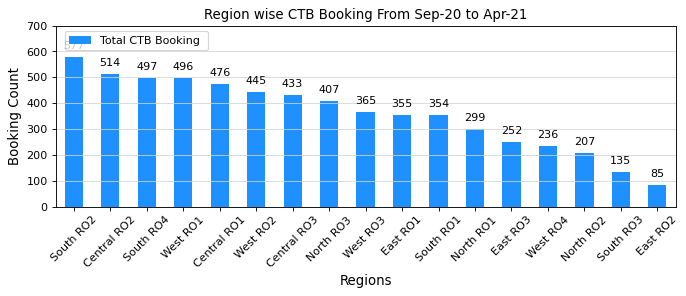

In [436]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Region_booking.plot(kind='bar',x='DELR_RGON_NAME',y='EQRY_REF_NO', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=700, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Booking From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["Total CTB Booking "],loc="upper center", bbox_to_anchor=(0.13, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')
plt.savefig("#18.jpg", bbox_inches='tight') 
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#REGION COMPARISON - BOOKING.jpg", bbox_inches='tight') 
plt.show()

In [437]:
Region_enq1

69747

In [438]:
#Region_enq1 = Region_enq1.reindex(index=order_by_index(Region_enq1.index, index_natsorted(Region_enq1.ORDER_ID
                                                                                          
                                                                                          
Region_enq1.sort_values("ORDER_ID", axis = 0, ascending = False, inplace = True, na_position ='last') 


AttributeError: 'numpy.int64' object has no attribute 'sort_values'

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(10, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Region_enq1.plot(kind='bar',x='DELR_RGON_NAME',y='ORDER_ID', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Booking Count", fontsize=12)#
plt.xlabel("Regions", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=8000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Region wise CTB Enquiry From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["Total CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.13, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("REGION COMPARISON ENQUIRY", bbox_inches='tight')  
plt.show()

In [ ]:
CTB_GDMS.CUSTOMER_NAME

In [ ]:
# sample gender code

In [ ]:


CTB_GDMS['CSTM_NAME_first'] =CTB_GDMS['CSTM_NAME'].str.split().str[0]

CTB_GDMS['CSTM_NAME_sec'] =CTB_GDMS['CSTM_NAME'].str.split().str[1]

 

CTB_GDMS['len_first'] =CTB_GDMS['CSTM_NAME_first'].str.len()

CTB_GDMS['len_sec'] =CTB_GDMS['CSTM_NAME_sec'].str.len()

 

CTB_Reg['len_first'].value_counts()

CTB_Reg['len_sec'].value_counts()

CTB_Reg[CTB_Reg['len_first']==1]['len_sec'].value_counts()

 

CTB_Reg['actual_name'] = np.where(CTB_Reg['len_first']==1,CTB_Reg['CSTM_NAME_sec'],CTB_Reg['CSTM_NAME_first'])

CTB_Reg['actual_name_len'] = CTB_Reg['actual_name'].str.len()

CTB_Reg['actual_name_len'].value_counts()

In [ ]:
CTB_Reg['actual_name_srm'] = CTB_Reg['actual_name'].str.replace('\W', '')
CTB_Reg['actual_name_srm_len'] = CTB_Reg['actual_name_srm'].str.len()

CTB_Reg['actual_name_srm_len'].value_counts()


CTB_Reg['name_lword'] = CTB_Reg['actual_name_srm'].str[-1:]
CTB_Reg['name_lword'] = CTB_Reg['name_lword'].str.lower()
CTB_Reg[['name_lword','actual_name_srm']].head()

CTB_Reg['Gender'] = np.where((CTB_Reg.name_lword=='a')|(CTB_Reg.name_lword=='e')|(CTB_Reg.name_lword=='i')|(CTB_Reg.name_lword=='o')|(CTB_Reg.name_lword=='u'),"Female","Male")
CTB_Reg['Gender'].value_counts()


CTB_Reg[CTB_Reg['Gender']=="Female"['name_lword'].value_counts()



In [ ]:
## Gender

In [ ]:
def Trend_Analysis_pi1(dataset, Variables,CountVariable,DateVariable, GroupbyVariable, TrendType):
    
    Trend = dataset[Variables].pivot_table(index=GroupbyVariable, columns=CountVariable, aggfunc=len, fill_value=0)
    Trend.reset_index(inplace=True)
        
    if TrendType =="Monthly":
        #Trend['Month_name']= Trend[DateVariable].astype(int).apply(lambda x: calendar.month_abbr[x])
        pass
        
    if TrendType =="Weekly":    
        pass
    
    if TrendType =="Hourly":
        Hourly_Labels = ['22-24','0-2','0-2','2-4','2-4','4-6','4-6','6-8','6-8','8-10','8-10','10-12','10-12','12-14','12-14','14-16','14-16','16-18','16-18','18-20','18-20','20-22','20-22','22-24']
        interval_range = pd.interval_range(start=0, freq=2, end=24)
        Trend['Range'] = pd.cut(Trend[DateVariable], bins=interval_range)
        Trend['Range_name']= pd.DataFrame(Hourly_Labels)
        Trend_Hr_range = Trend[['ORDER_ID','Range_name']].groupby('Range_name',as_index=False).sum()
        Trend = Trend_Hr_range.copy()
        
        
    return Trend
    

In [ ]:
CTB_GDMS['CSTM_NAME_first'] =CTB_GDMS['CUSTOMER_NAME'].str.split().str[0]
CTB_GDMS['CSTM_NAME_sec'] =CTB_GDMS['CUSTOMER_NAME'].str.split().str[1]
CTB_GDMS['len_first'] =CTB_GDMS['CSTM_NAME_first'].str.len()
CTB_GDMS['len_sec'] =CTB_GDMS['CSTM_NAME_sec'].str.len()


In [ ]:
CTB_GDMS['len_first'].value_counts()



In [ ]:
CTB_GDMS['len_sec'].value_counts()

In [ ]:
CTB_GDMS[CTB_GDMS['len_first']==1]['len_sec'].value_counts()

In [ ]:
CTB_GDMS['actual_name'] = np.where(CTB_GDMS['len_first']==1,CTB_GDMS['CSTM_NAME_sec'],CTB_GDMS['CSTM_NAME_first'])

CTB_GDMS['actual_name_len'] = CTB_GDMS['actual_name'].str.len()

CTB_GDMS['actual_name_len'].value_counts()


In [ ]:
CTB_GDMS['actual_name_srm'] = CTB_GDMS['actual_name'].str.replace('\W', '')
CTB_GDMS['actual_name_srm_len'] = CTB_GDMS['actual_name_srm'].str.len()

CTB_GDMS['actual_name_srm_len'].value_counts()

In [ ]:
CTB_GDMS['name_lword'] = CTB_GDMS['actual_name_srm'].str[-1:]
CTB_GDMS['name_lword'] = CTB_GDMS['name_lword'].str.lower()
CTB_GDMS[['name_lword','actual_name_srm']].head()



In [ ]:
CTB_GDMS['Gender'] = np.where((CTB_GDMS.name_lword=='a')|(CTB_GDMS.name_lword=='e')|(CTB_GDMS.name_lword=='i')|(CTB_GDMS.name_lword=='o')|(CTB_GDMS.name_lword=='u'),"Female","Male")
CTB_GDMS['Gender'].value_counts()




In [ ]:
CTB_GDMS[CTB_GDMS['Gender']=="Female"]['name_lword'].value_counts()

In [ ]:
CTB_GDMS.Gender.value_counts()

In [ ]:
CTB_GDMS.columns

In [ ]:
Gender_enq = Trend_Analysis_gb(CTB_GDMS,['ORDER_ID','Gender'],'','Gender','Weekly')
print("total enquiry : ",Gender_enq.ORDER_ID.sum())
Gender_enq



In [ ]:
# month wise enquiry

In [ ]:
Gender_enq1 = Trend_Analysis_pi(CTB_GDMS,['ORDER_ID','Gender','ORDER_DATEMonthKey'],'Gender','Gender','ORDER_DATEMonthKey','Monthly')
print("total enquiry : ",Gender_enq1.ORDER_ID.sum())
Gender_enq1


#Monthly_trend_Booking = Trend_Analysis_pi(GDMS_Booking,['CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey'],'CTB_BOOKING_Y','BKNG_DATE_NEWMonthKey','BKNG_DATE_NEWMonthKey','Monthly')
#Monthly_trend_Booking.columns = ['BKNG_DATE_NEWMonthKey', 'CTB_BOOKING_N', 'CTB_BOOKING_Y']

In [ ]:
# enquiry overall 
Gender_enq = Trend_Analysis_gb(CTB_GDMS,['ORDER_ID','Gender'],'','Gender','Weekly')
print("total enquiry : ",Gender_enq.ORDER_ID.sum())
Gender_enq



In [ ]:
## overall book

In [ ]:
Gender_book = Trend_Analysis_gb(CTB_GDMS,['EQRY_REF_NO','Gender'],'','Gender','Weekly')
Gender_book

In [ ]:
## month wise booking

In [ ]:
Gender_book1 = Trend_Analysis_pi(CTB_GDMS,['EQRY_REF_NO','Gender','BKNG_DATE_NEWMonthKey'],'Gender','Gender','BKNG_DATE_NEWMonthKey','Monthly')
print("total enquiry : ",Gender_book1.EQRY_REF_NO.sum())
Gender_book1

In [ ]:
Gender_book1 = Gender_book1.reindex(index=order_by_index(Gender_book1.index, index_natsorted(Gender_book1.BKNG_DATE_NEWMonthKey)))

In [ ]:
Gender_book1

In [ ]:
Gender_merg_final = Merge(Gender_enq,'Gender',Gender_book,'Gender','','','outer',True,'single')
#Region_final = Hourly_Trend_final[["Range_name","Enquiry Count","Booking Count"]]
Gender_merg_final

In [ ]:
Gender_final = Gender_merg_final[["Gender","ORDER_ID","EQRY_REF_NO"]]
Gender_final.columns = ['Gender','Enquiry Count','Booking Count']
#Region_enq = Gender_final["Enquiry Count"].sum()
#Region_book = Gender_final["Booking Count"].sum()
Gender_final["Enquiry Ratio"] = (Gender_final["Enquiry Count"]/Gender_final["Enquiry Count"].sum())
Gender_final["Booking Ratio"] = (Gender_final["Booking Count"]/Gender_final["Booking Count"].sum())
Gender_final["Enq to Booking Ratio"] = (Gender_final["Booking Count"]/Gender_final["Enquiry Count"])
#Region_final["Avg_Enquiry"]=Region_enq/Region_final["Dealer Region Name"].count()
#Region_final["Avg_booking"]=Region_book/Region_final["Dealer Region Name"].count()
Gender_final

In [ ]:
Gender_final['Booking Count'].sum()

In [ ]:
#CHART

In [ ]:

from matplotlib.pyplot import figure
from matplotlib.ticker import PercentFormatter
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
plt.xticks(rotation=45)

#plt.figure(figsize=(6, 3))
splot = sns.barplot(data=Gender_final, x = 'Gender', y = 'Enq to Booking Ratio', ci = None, color="dodgerblue")
for p in splot.patches:
        splot.annotate('{:.0f}%'.format(100*p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
plt.ylabel("Enquiry to booking %", fontsize=12)#
plt.xlabel("Gender", fontsize = 12)        
plt.ylim(ymax=0.15, ymin=0)
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.title("Gender wise Enquiry to booking Ratio")
plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("#GENDER E2B.jpg", bbox_inches='tight')

In [ ]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 3), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()

#Region_enq1.plot(kind='line',x='Dealer Region Name', y='Avg_Enquiry', color='red',linewidth=2,ax=ax)
splot = Gender_final.plot(kind='bar',x='Gender',y='Enquiry Count', color="dodgerblue",legend=False,ax=ax)
for p in splot.patches:
        splot.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 
               'center', xytext = (0, 10), textcoords = 'offset points')
#df.plot(kind='line',x='Month',y='CTB BOOKING', legend=False, color='red', ax=ax)
plt.ylabel("Enquiry Count", fontsize=12)#
plt.xlabel("Gender", fontsize = 12)
plt.xticks(rotation=45)
plt.ylim(ymax=70000, ymin=0)
#plt.xticks(np.arange(59), df3['Week Number'][0:59], rotation=45)
ax.legend(loc='upper center', bbox_to_anchor=(0.1, 1.01), ncol=2)

plt.title("Gender wise CTB Enquiry From Sep-20 to Apr-21", fontsize=12)
#plt.subplots_adjust(left=0.15)
#ax2 = ax.twinx()

#plt.grid(color='lightgrey', linewidth=0.7)
ax.legend(["CTB Enquiry "],loc="upper center", bbox_to_anchor=(0.123, 1.0))
#ax2.spines['top'].set_edgecolor('grey')
for pos in (['top', 'bottom', 'right', 'left']):
    ax2.spines[pos].set_edgecolor('grey')

plt.grid(color='lightgrey', linewidth=0.7,axis='y')
plt.savefig("Gender Enquiry.jpg", bbox_inches='tight')
plt.show()

In [ ]:
GDMS_Booking.EQRY_REF_NO.count()

In [ ]:
df

In [ ]:
dealer = pd.read_excel("Sales_dealer.xltm")

In [ ]:
dealer

In [ ]:
GDMS_Booking

In [ ]:
ctb_book = pd.merge(GDMS_Booking,dealer,left_on='EQRY_DLR_NO',right_on='DEALER_CODE', how='outer', indicator=True)

In [ ]:
ctb_book.EQRY_REF_NO.count()

In [ ]:
ctb_book.to_excel("ctb_booking.xlsx")

In [ ]:
df['CRM Retail'].sum()

In [ ]:
6133 + 392

In [ ]:
2536+179

In [ ]:
2525+179

In [ ]:
CTB_data.CUSTOMER_MOBILE.nunique()